# 1. Loading the Data

In [6]:
#importing Important Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from scipy import stats

In [7]:
#Loading data
df=pd.read_csv("C:\\Users\\chora\\OneDrive\\Desktop\\Nexthike\\housing_data.csv")

In [8]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Dropping Unwanted Column

In [9]:
#Dropping Unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.shape

(1460, 80)

# Cleaning the Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Finding null value and treating it


In [12]:
df.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 1369,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 872,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
def fill_missing_values(df):
   
    # Fill missing values in numerical columns with the mean
    numerical_cols = df.select_dtypes(include='number').columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

    # Fill missing values in object (categorical) columns with the mode
    object_cols = df.select_dtypes(include='object').columns
    df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])

    return df

In [14]:
df1=fill_missing_values(df)

In [15]:
df1.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
df1.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

The table provides descriptive statistics for various features of the dataset:


LotFrontage: Average linear feet of street connected to property.

LotArea: Lot size in square feet.

OverallQual: Overall material and finish quality.

OverallCond: Overall condition rating.

YearBuilt: Original construction year.

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).

MasVnrArea: Masonry veneer area in square feet.

BsmtFinSF1: Type 1 finished square feet.

BsmtFinSF2: Type 2 finished square feet.

BsmtUnfSF: Unfinished square feet of basement area.

ScreenPorch: Screen porch area in square feet.

PoolArea: Pool area in square feet.

MiscVal: $Value of miscellaneous feature.

YrSold: Year Sold (YYYY).

SalePrice: Sale price of the property.

TotalSF: Total square footage of the property.

Latitude: Latitude coordinate of the property location.

Longitude: Longitude coordinate of the property location.

PricePerSqFt: Sale price per square foot.

PropertyAge: Age of the property at the time of sale.

Each feature's statistics include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. These statistics provide insights into the central tendency, dispersion, and shape of the distribution of each feature.

# Checking Duplicate values

In [17]:
df1.duplicated().sum()

0

# Univariate Analysis & Multivariate Analysis:

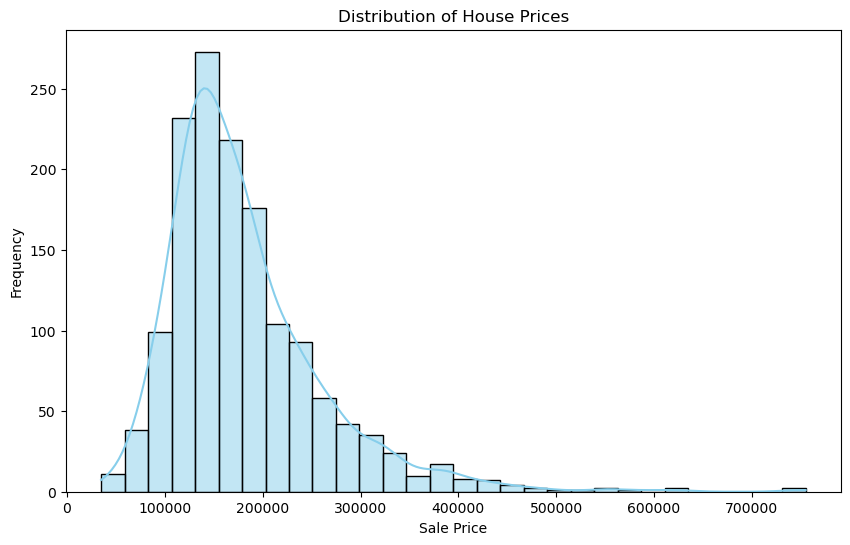

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [18]:
# Distribution of house prices (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df1['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of SalePrice
print(df1['SalePrice'].describe())


From the histogram plot, we can observe that the distribution of house prices is slightly right-skewed, with most house prices concentrated around the lower to mid-range of the price spectrum. There are relatively fewer houses with very high sale prices, as indicated by the long right tail of the distribution.

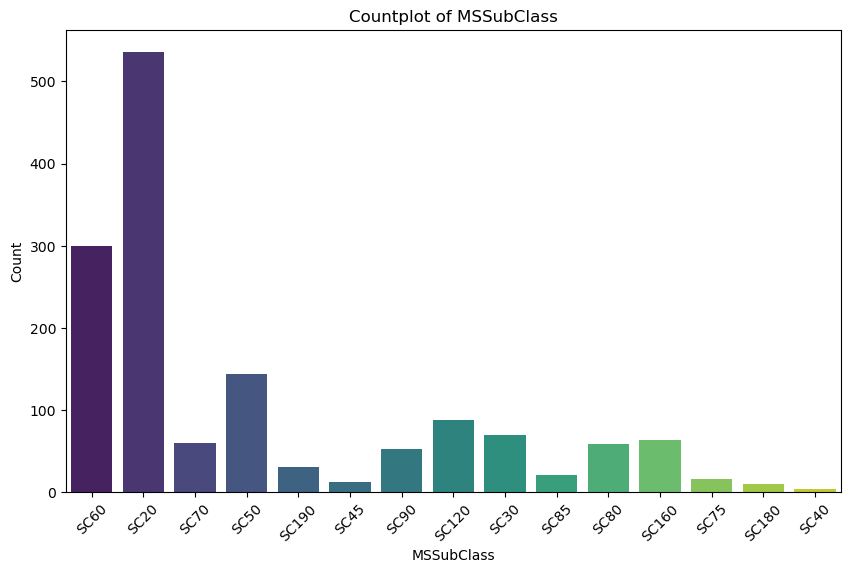

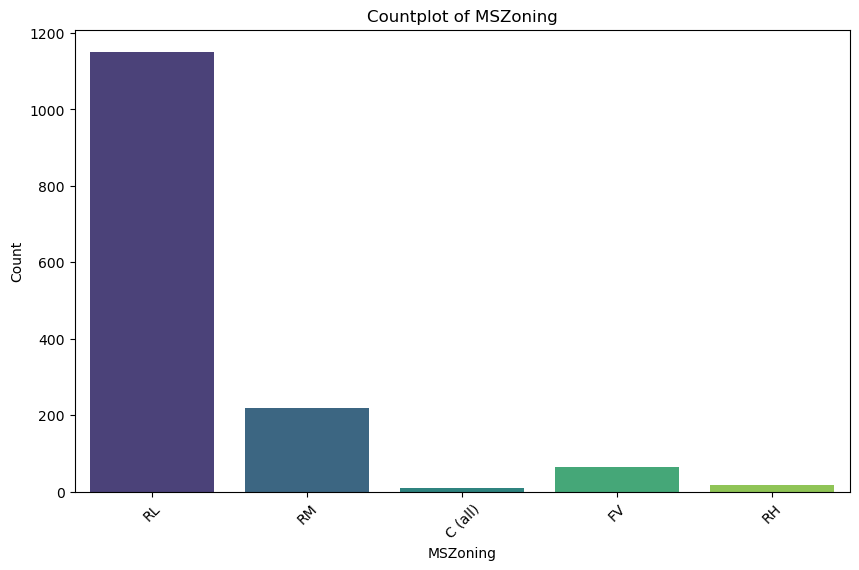

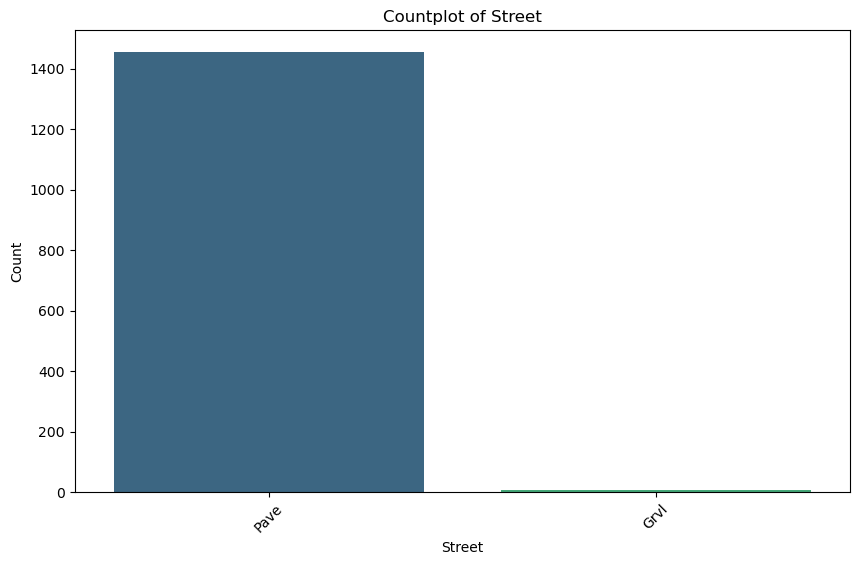

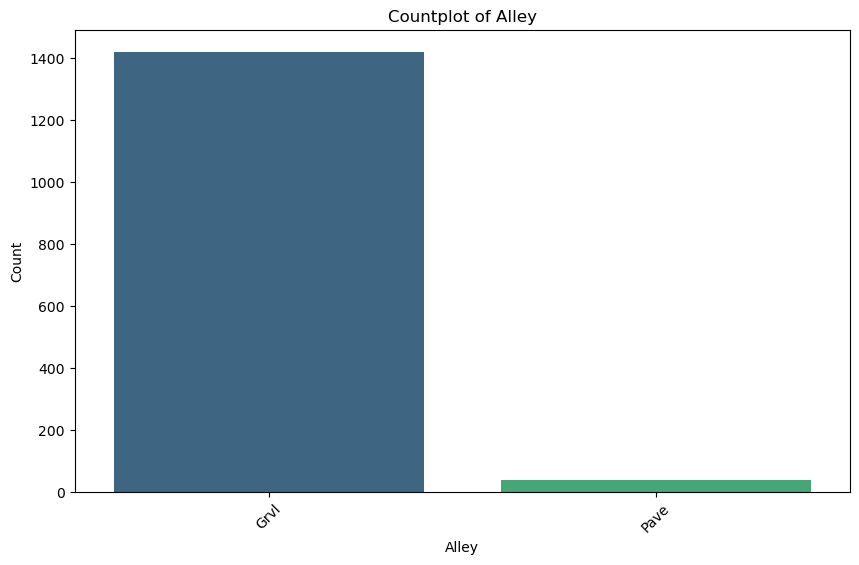

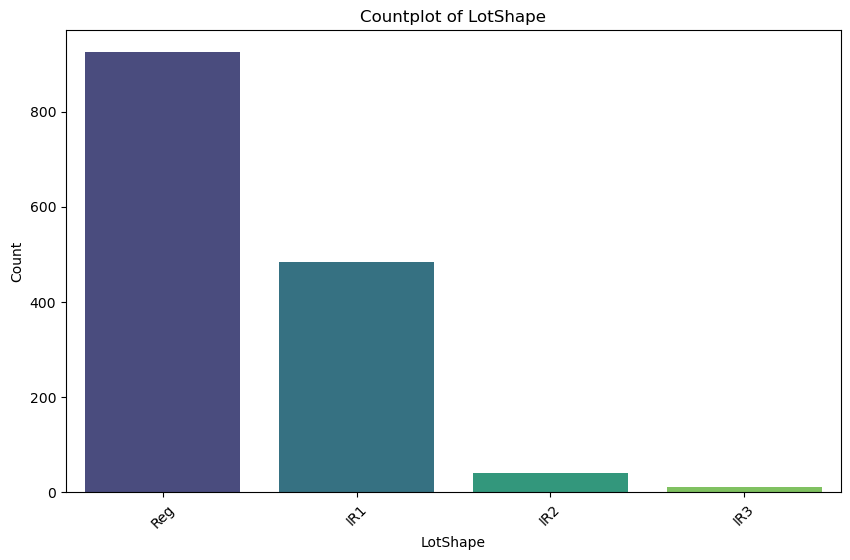

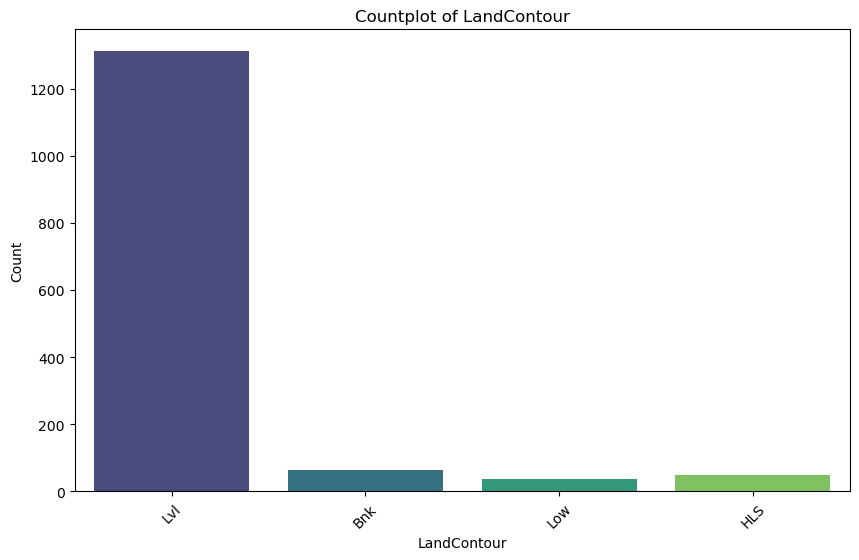

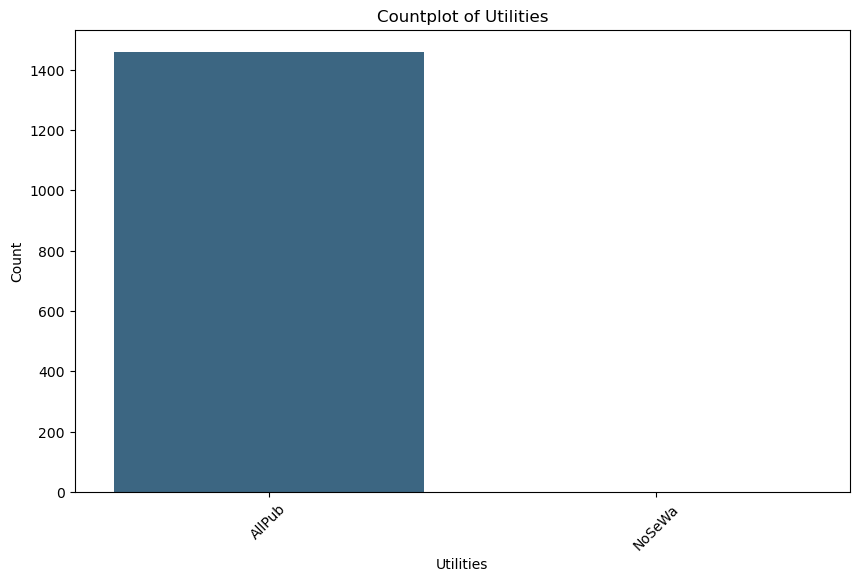

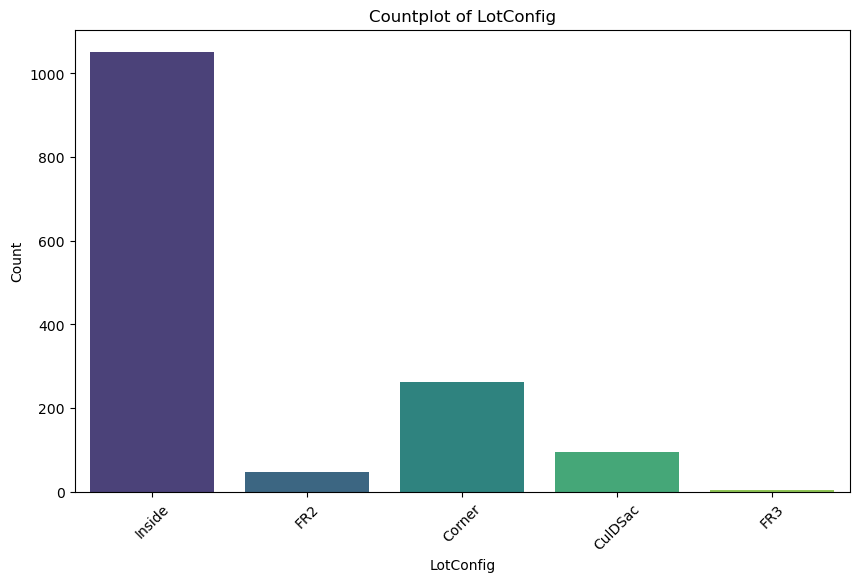

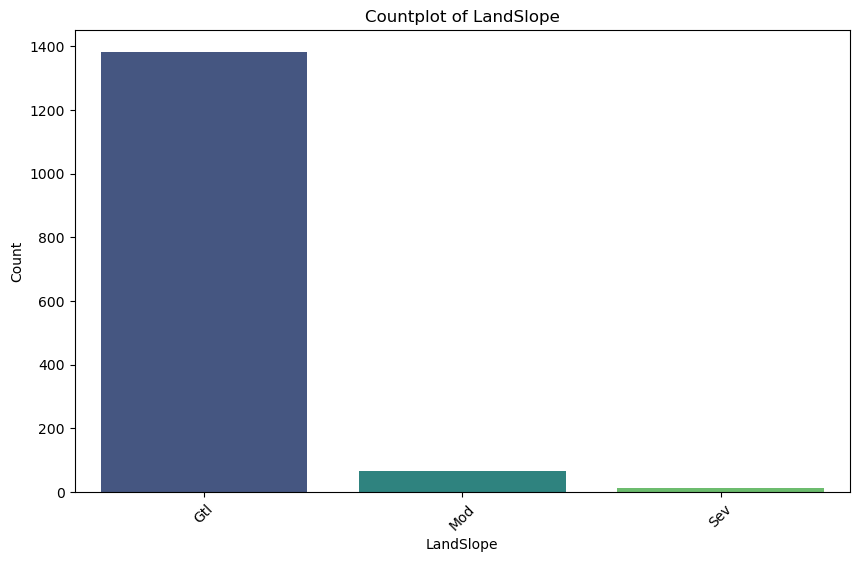

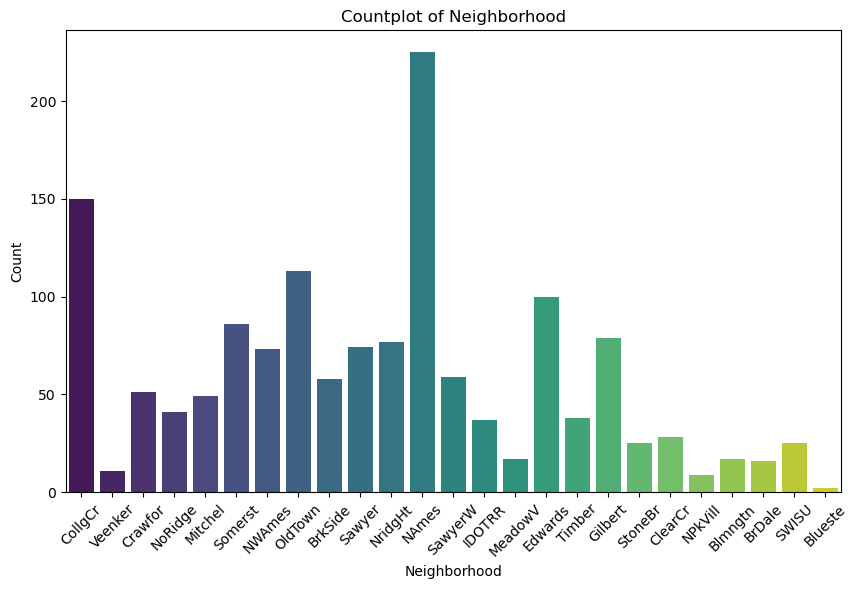

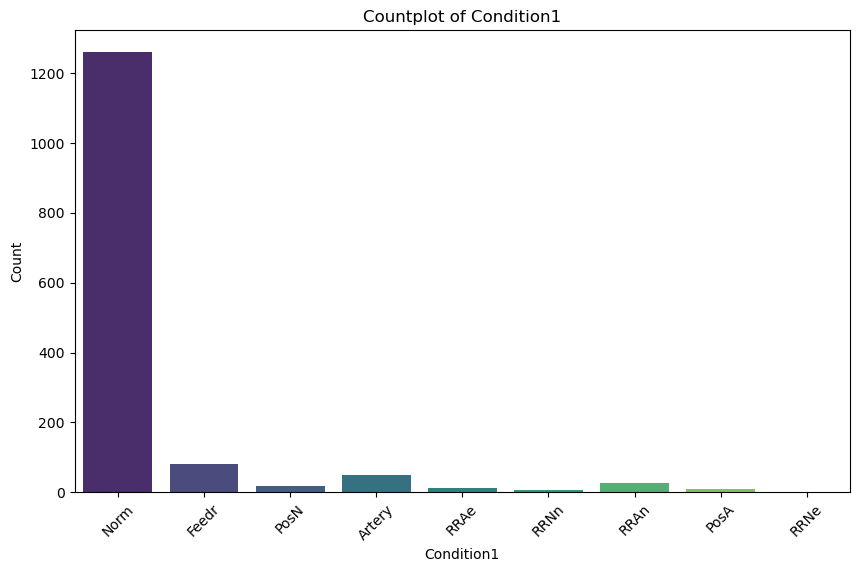

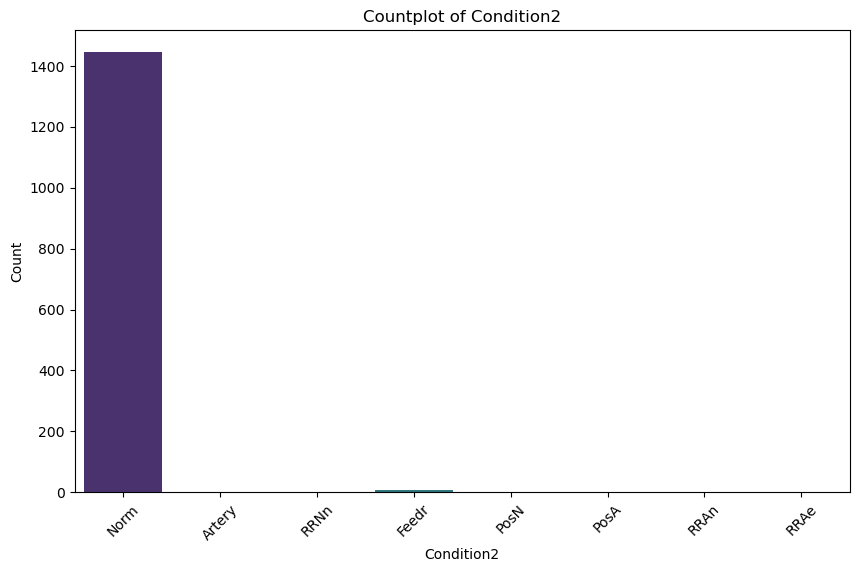

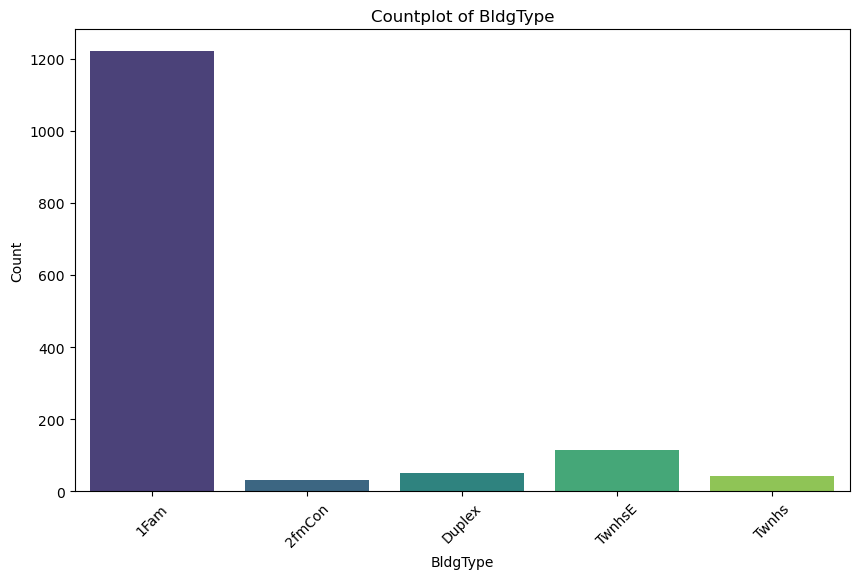

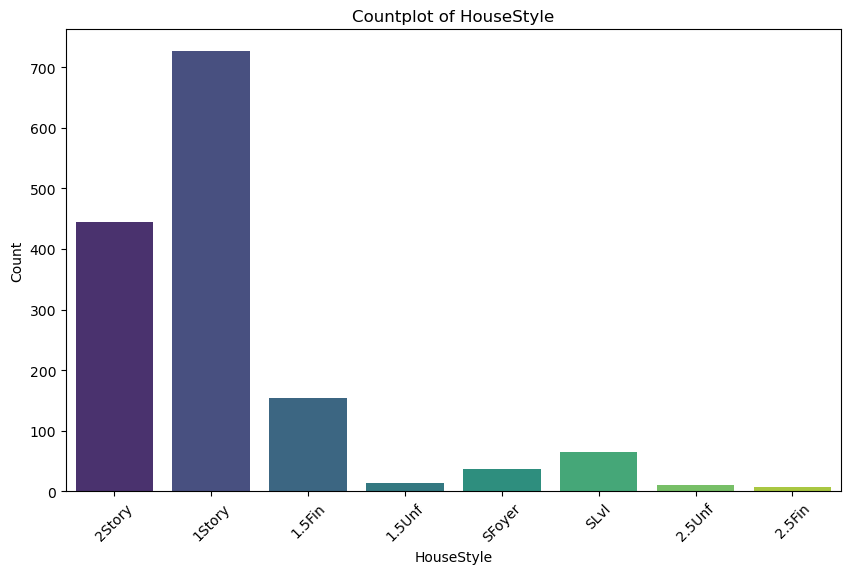

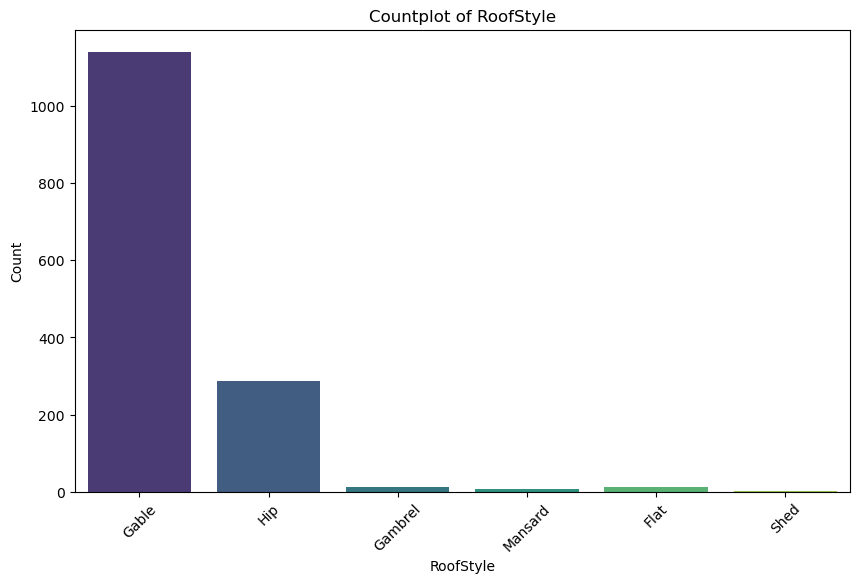

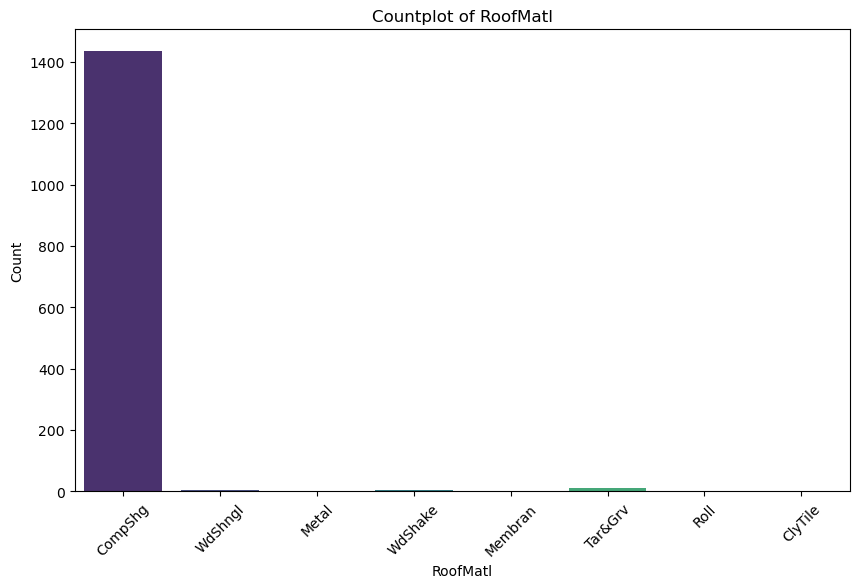

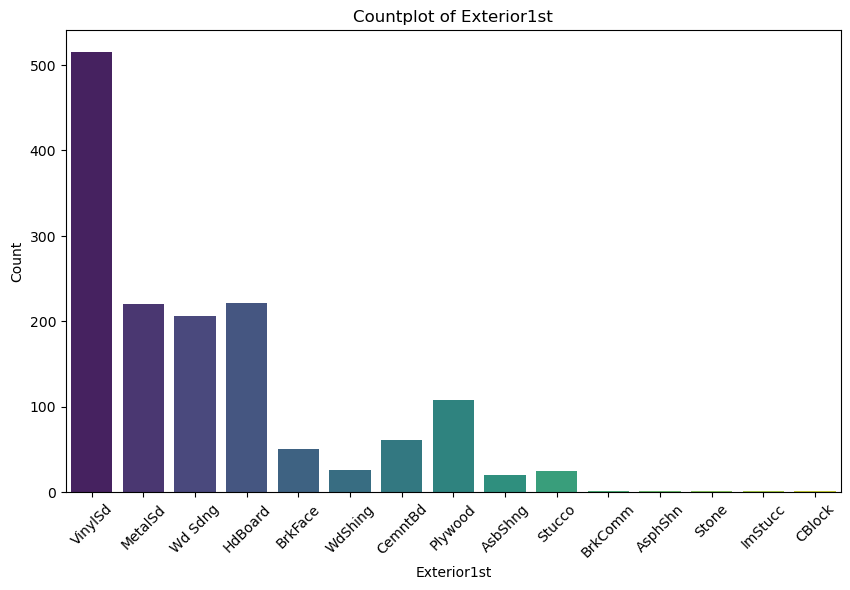

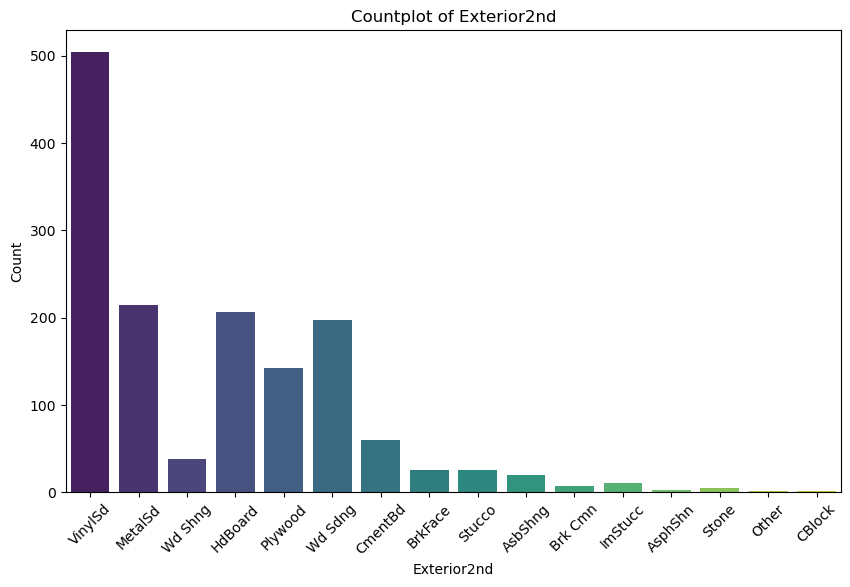

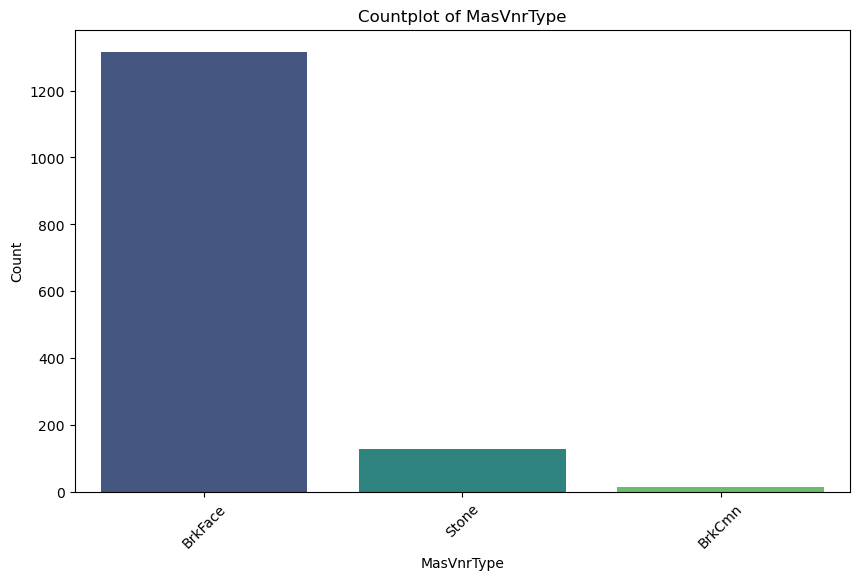

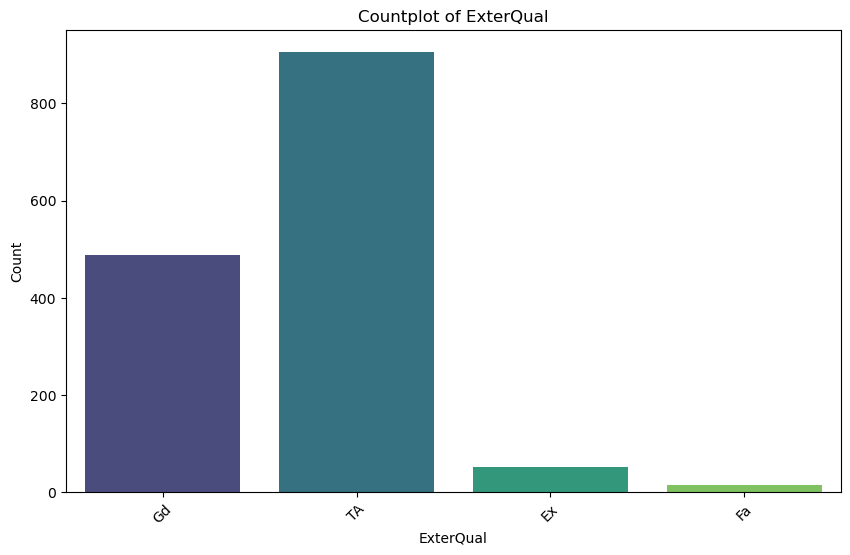

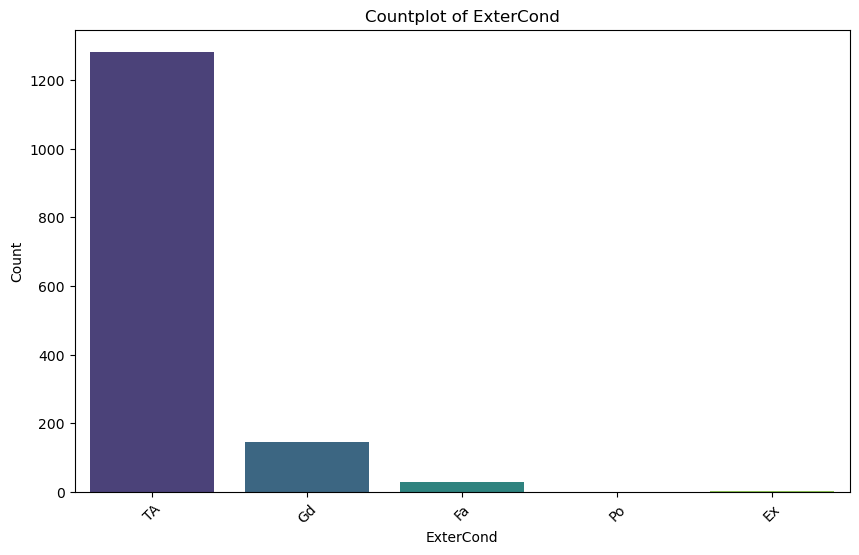

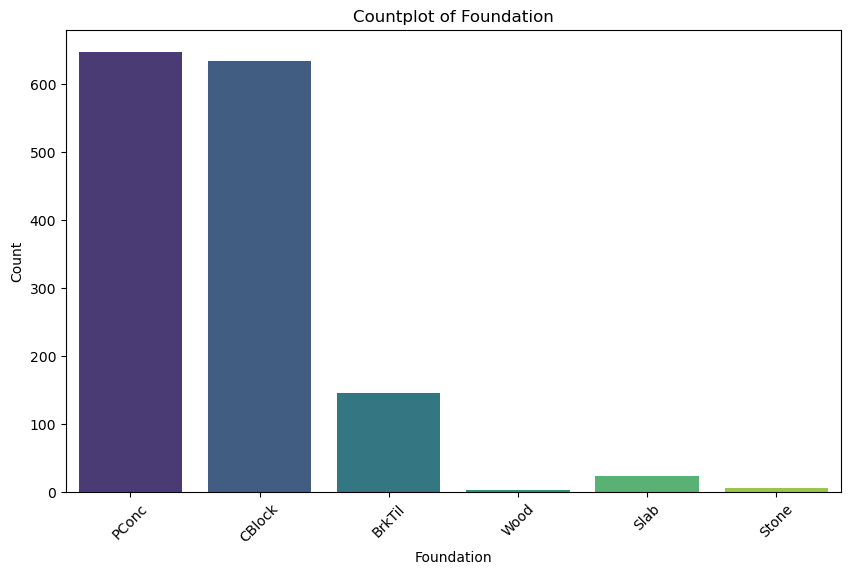

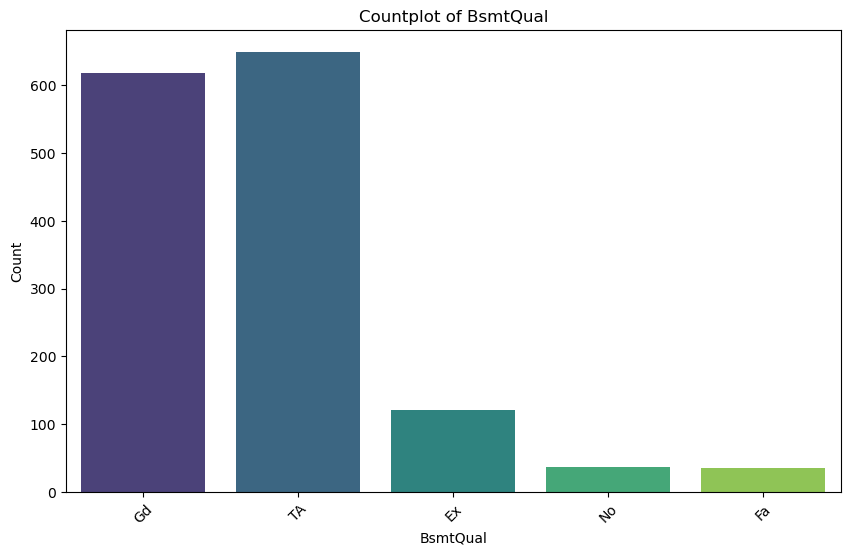

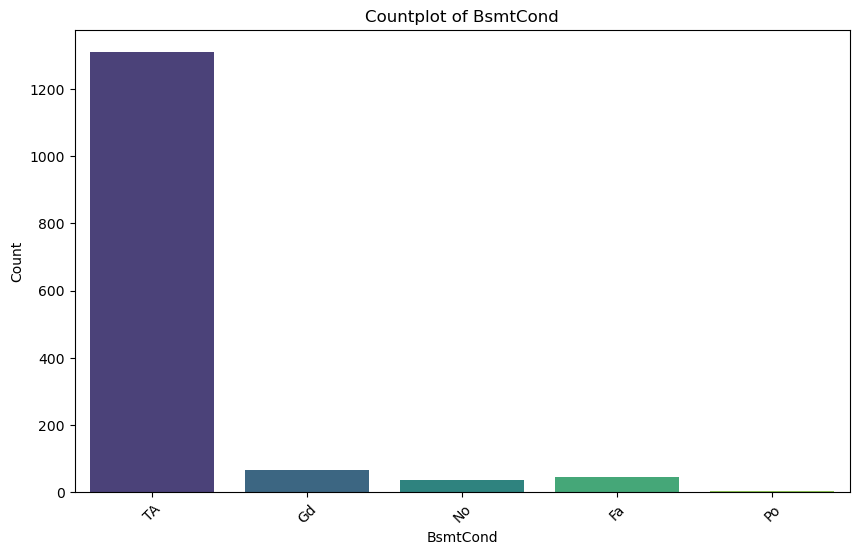

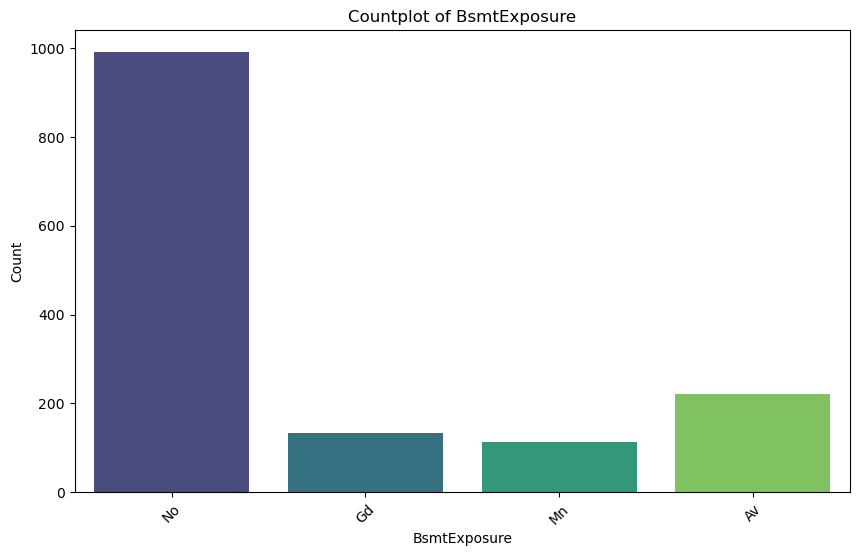

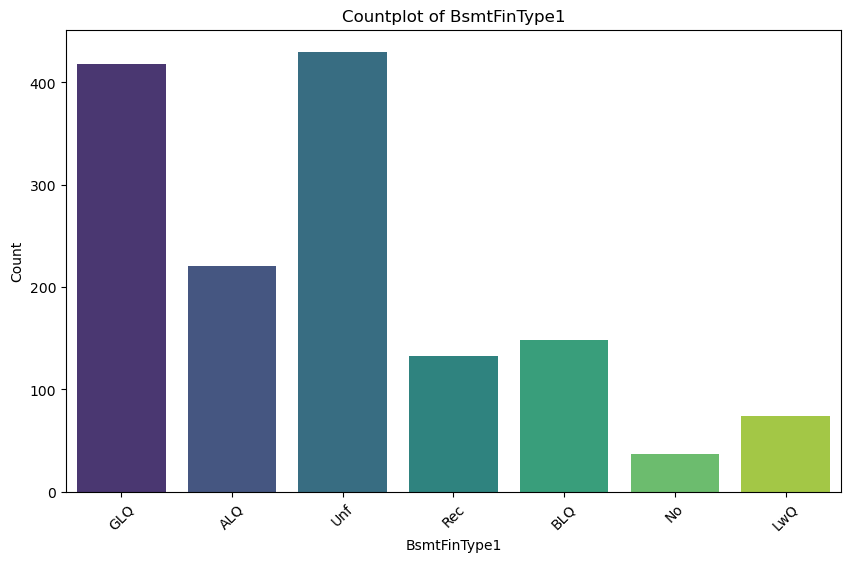

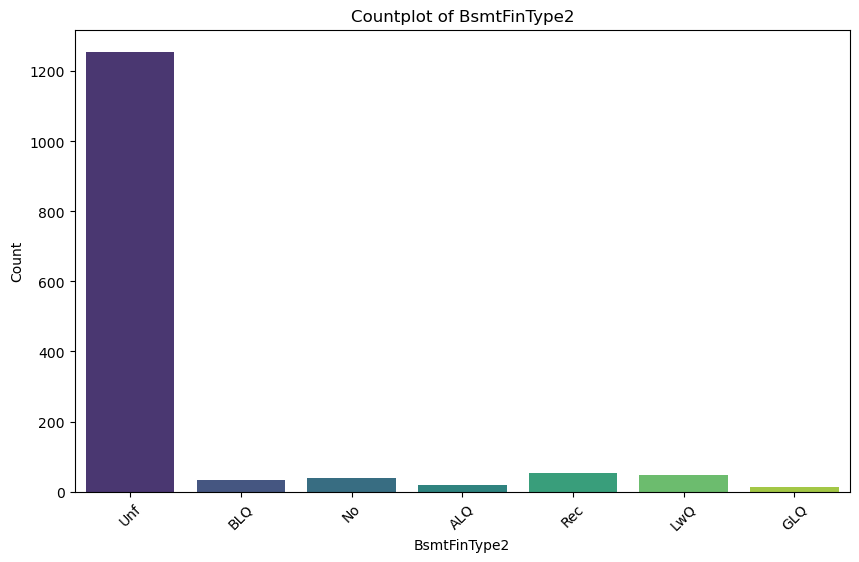

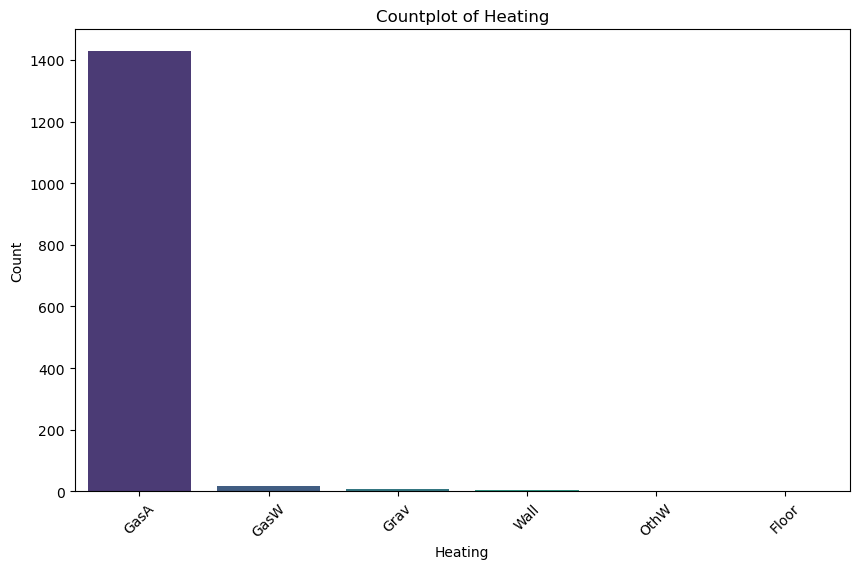

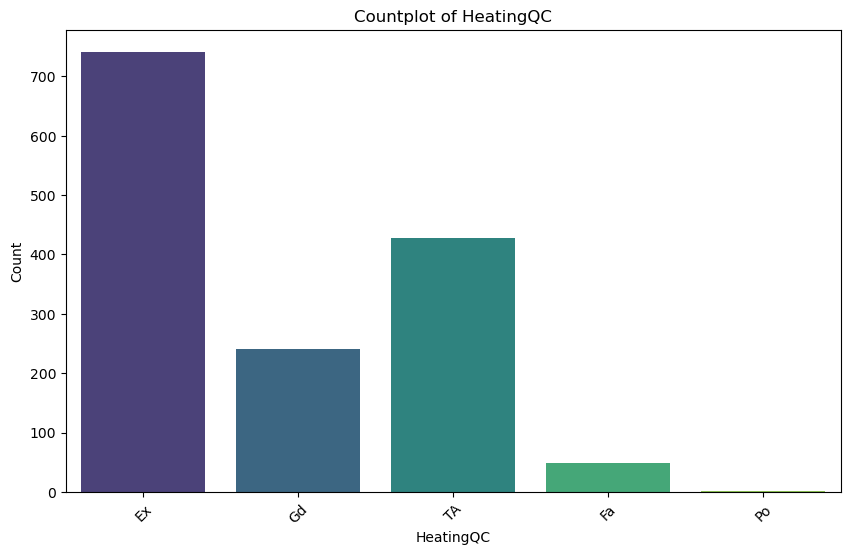

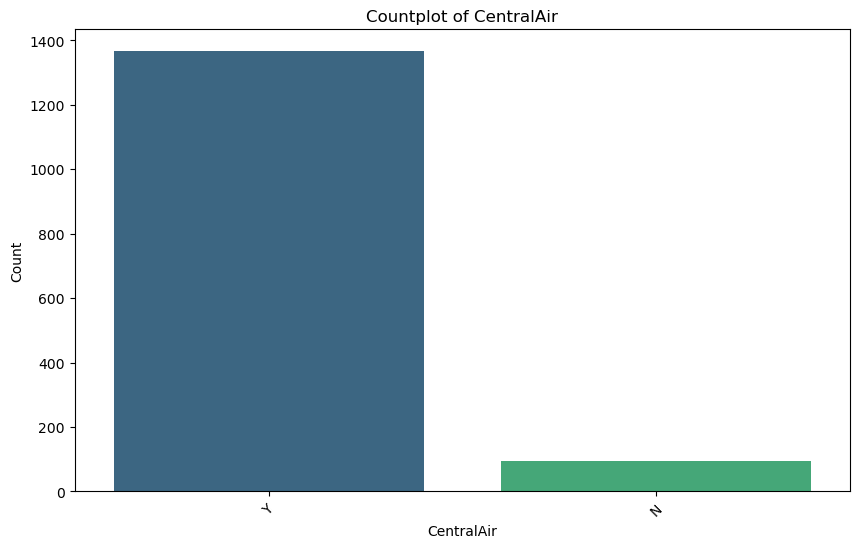

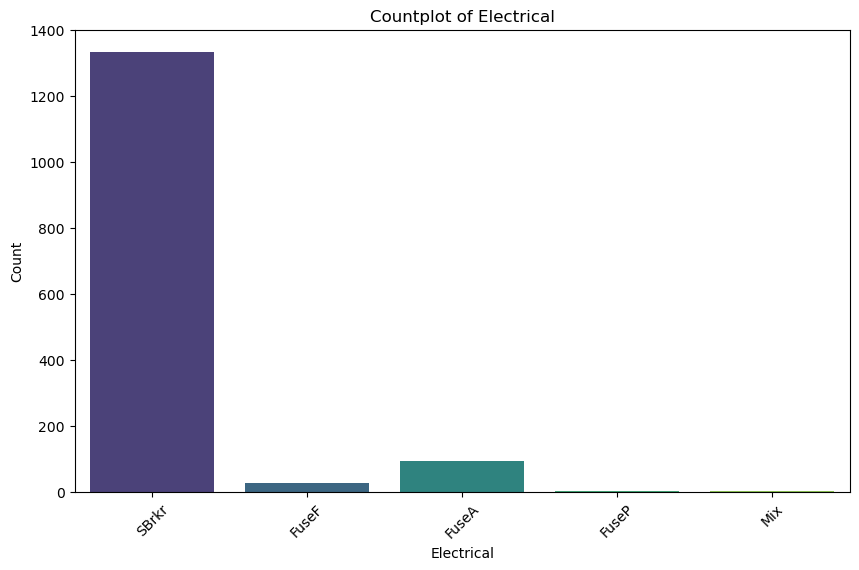

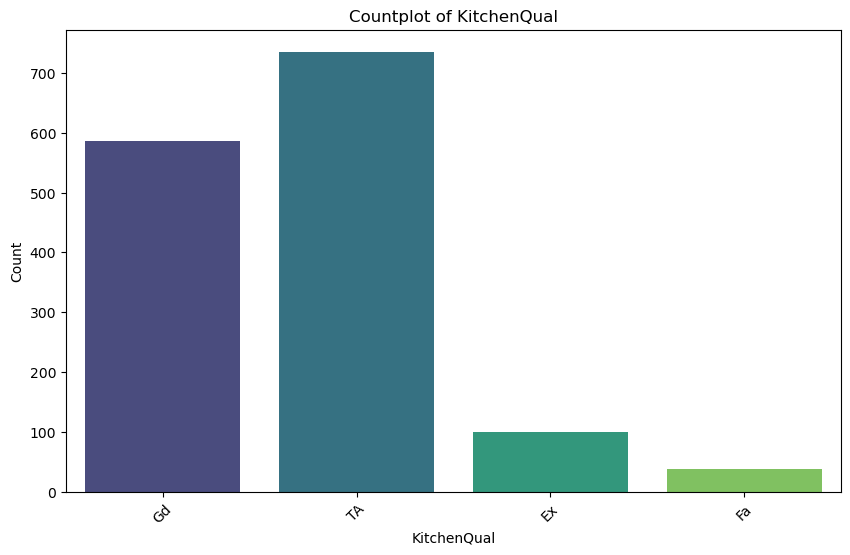

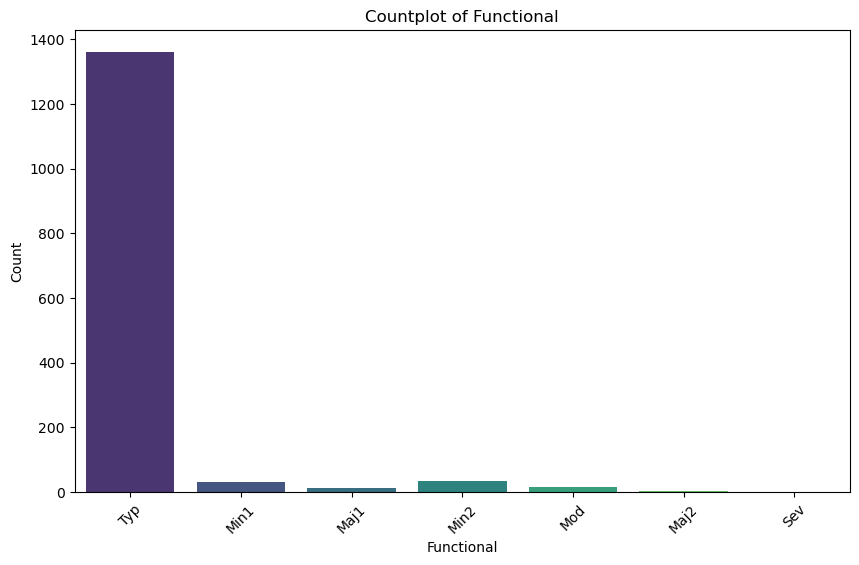

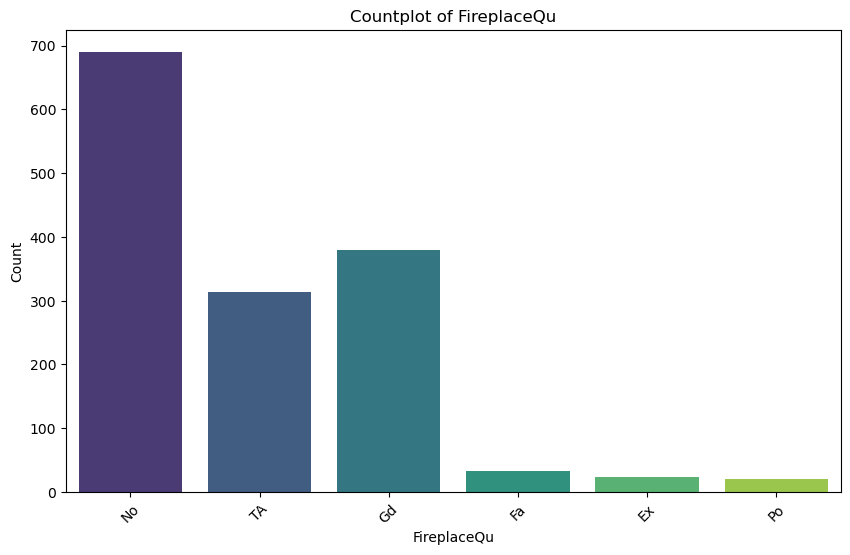

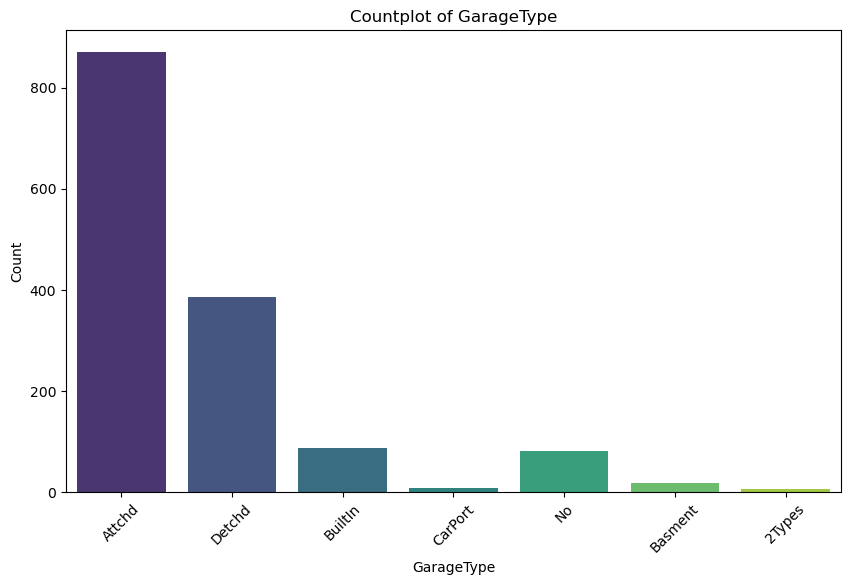

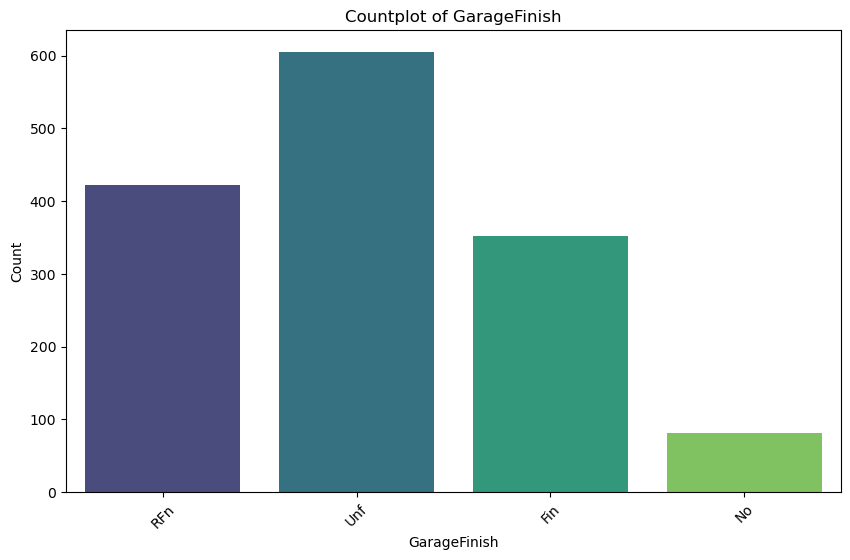

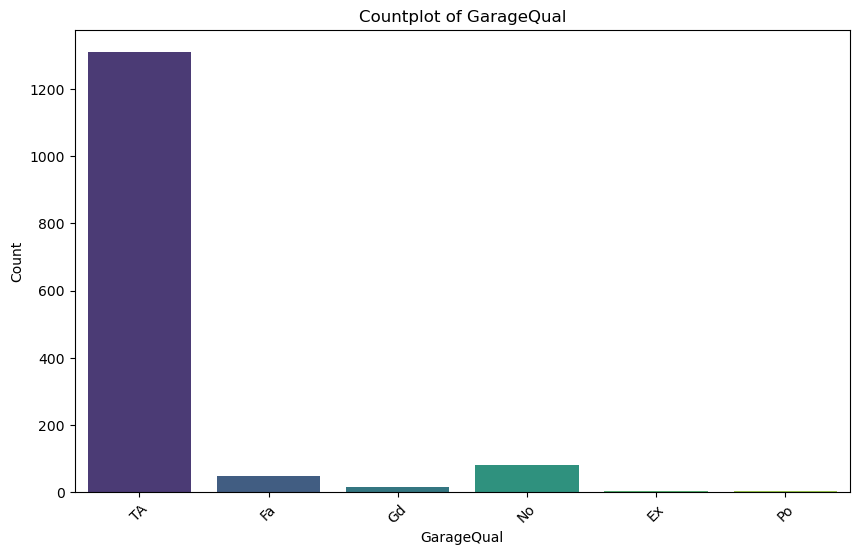

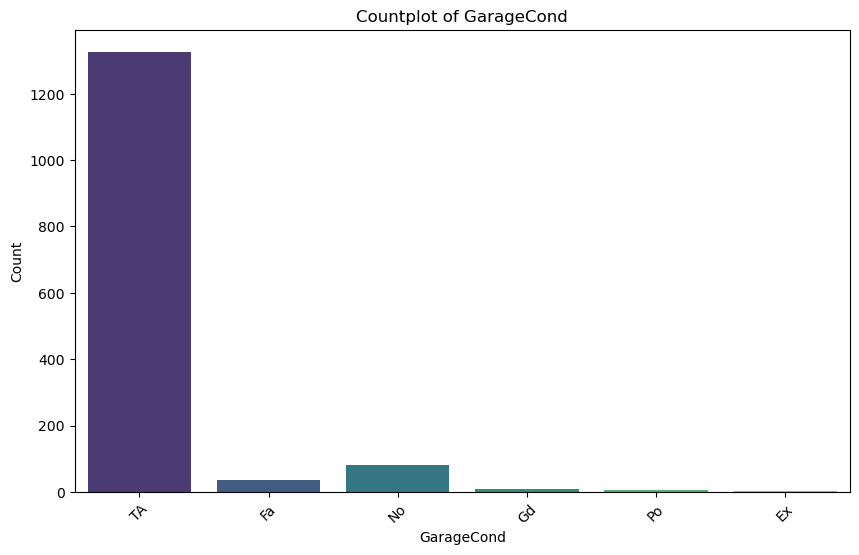

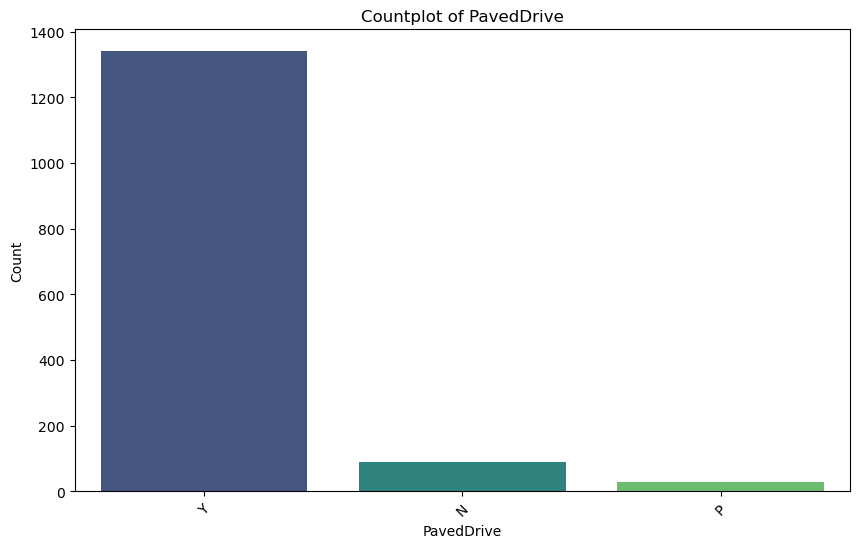

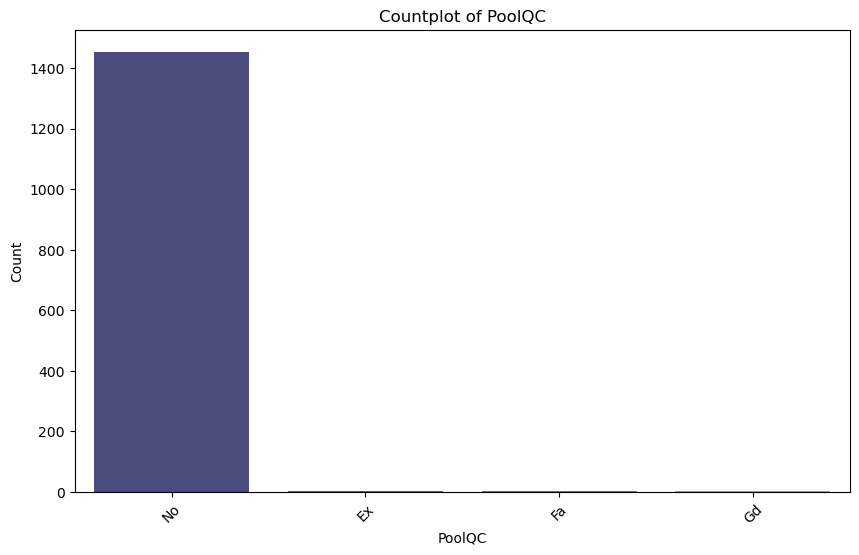

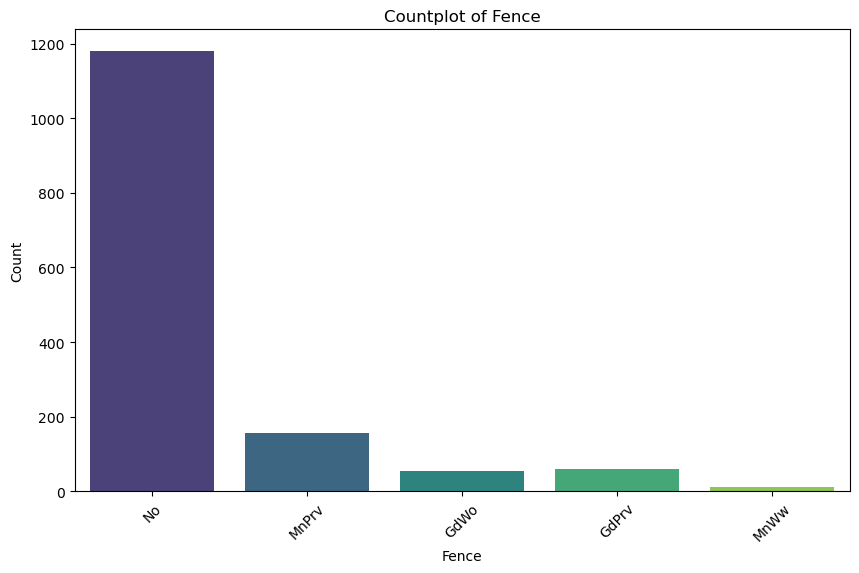

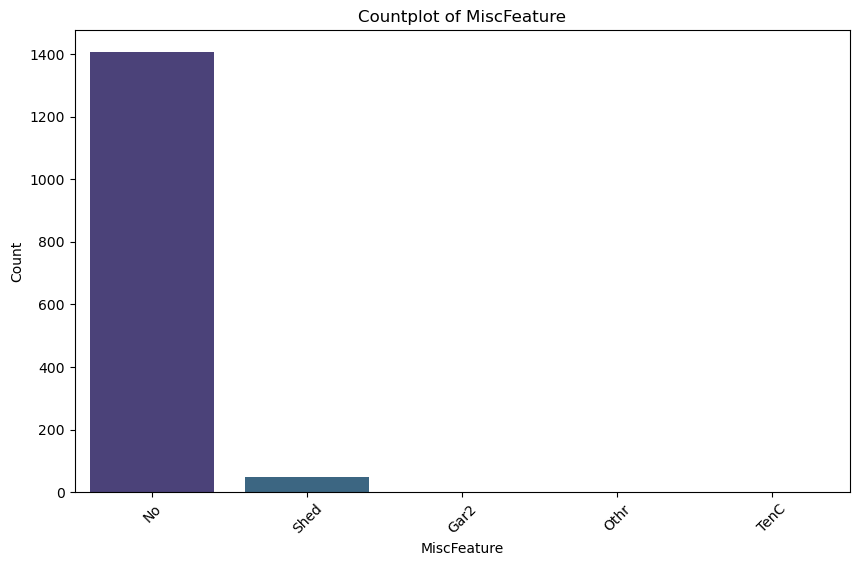

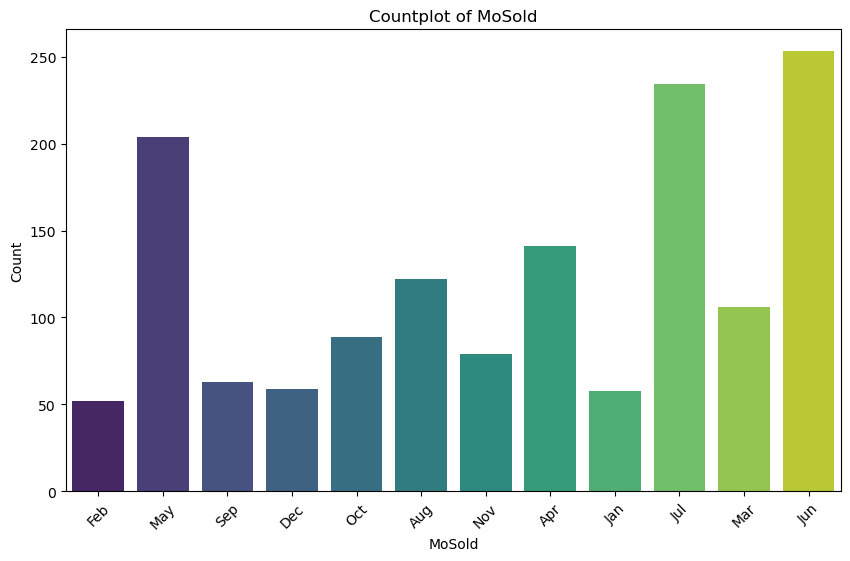

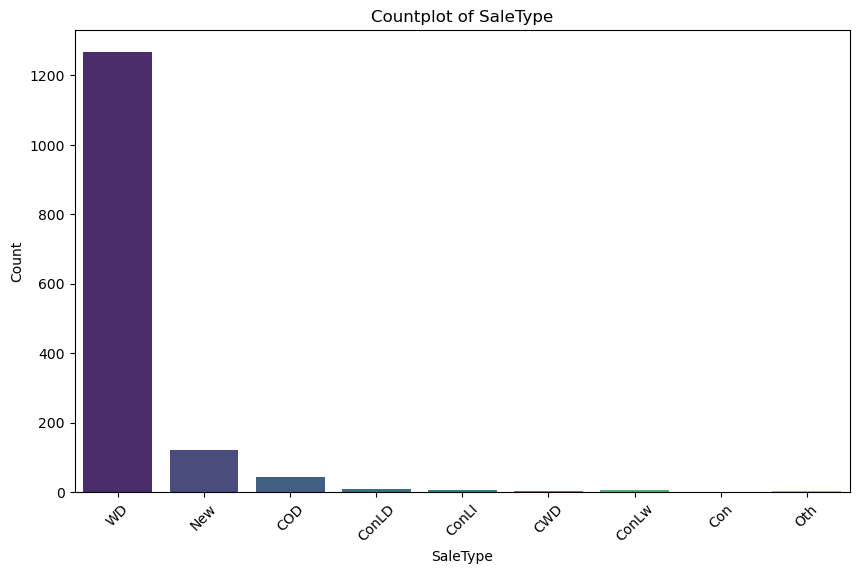

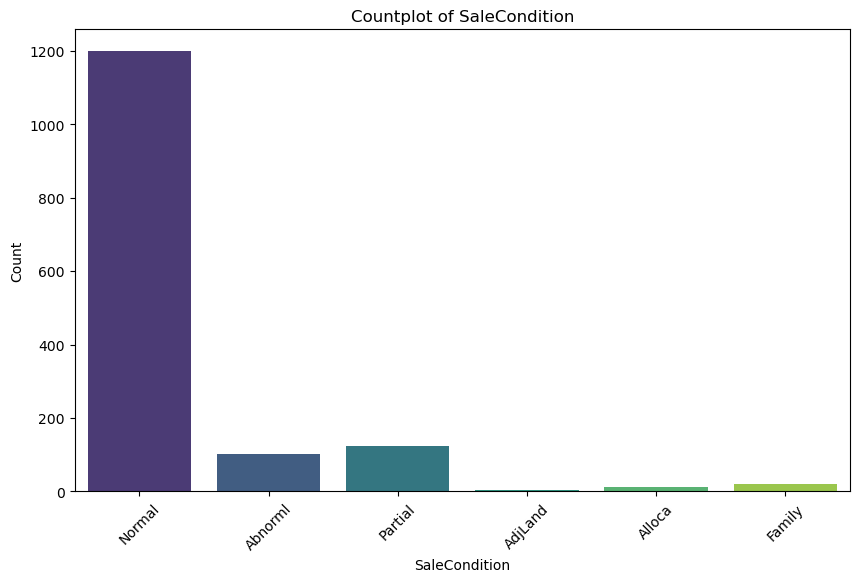

In [19]:
# Selecting only categorical columns for countplot
categorical_cols = df1.select_dtypes(include=['object']).columns

# Plotting countplot for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df1, x=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

These plots display the frequency of sale conditions in the dataset, with "Normal" being the most common (1136), followed by "Partial" (123) and "Abnorml" (87). Less common categories include "Family" (20), "Alloca" (11), and "AdjLand" (1), offering insights into diverse sale conditions and market dynamics.

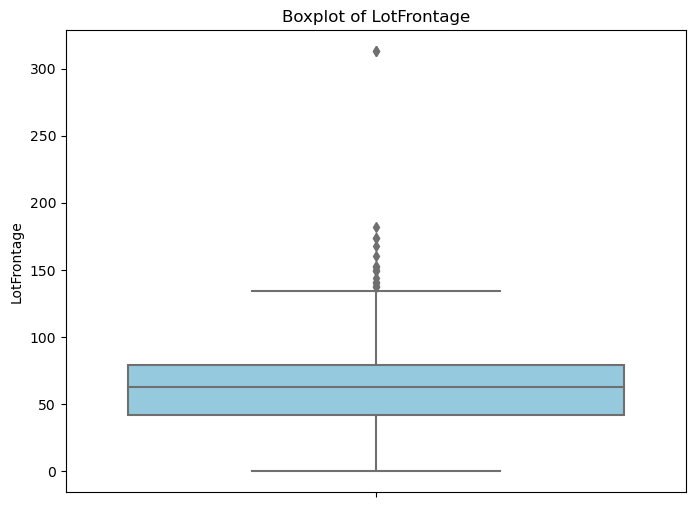

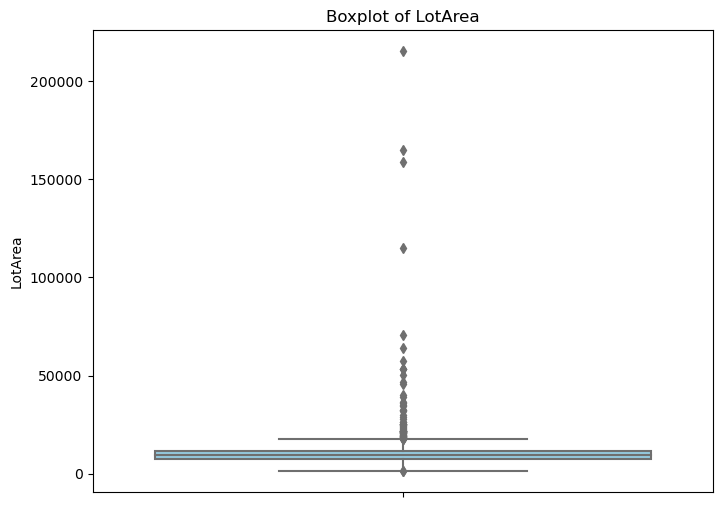

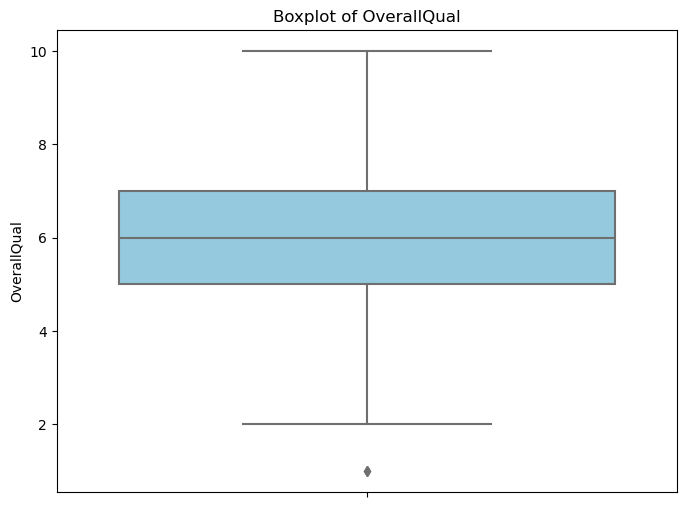

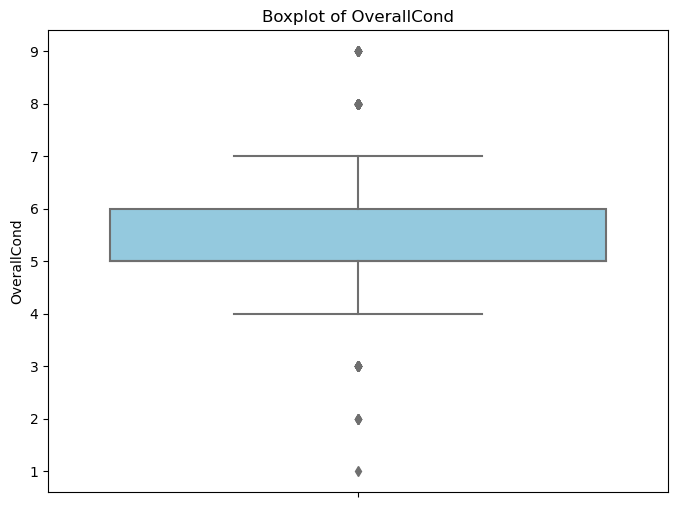

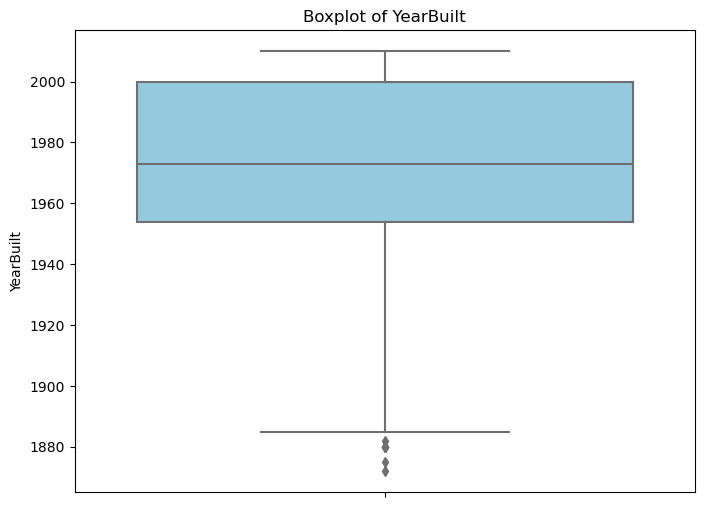

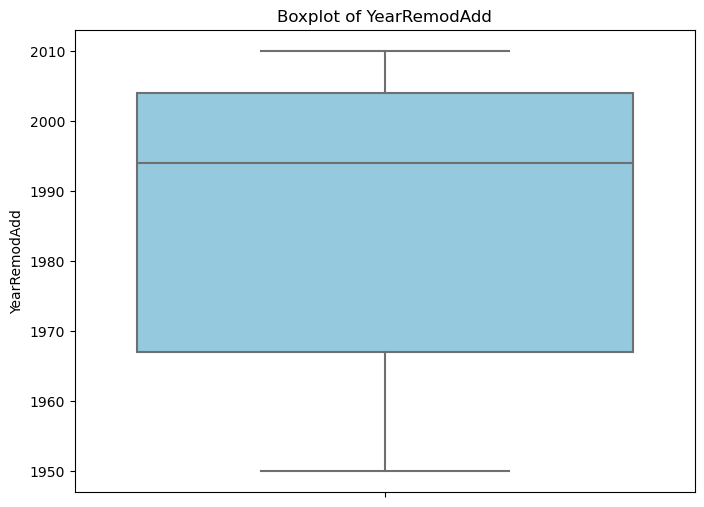

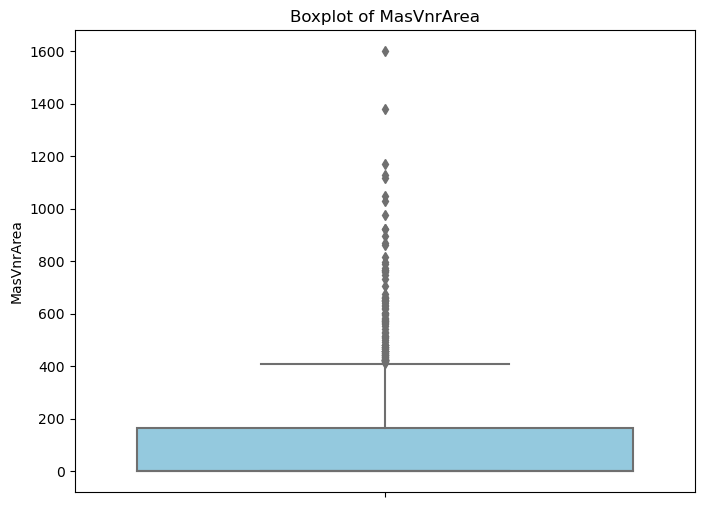

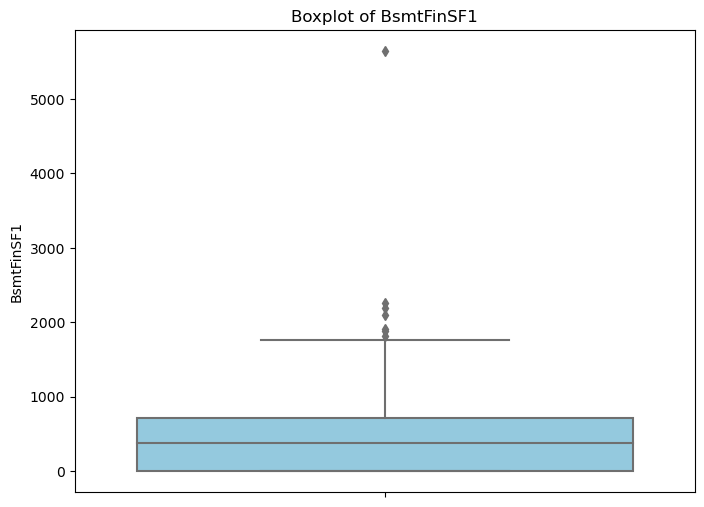

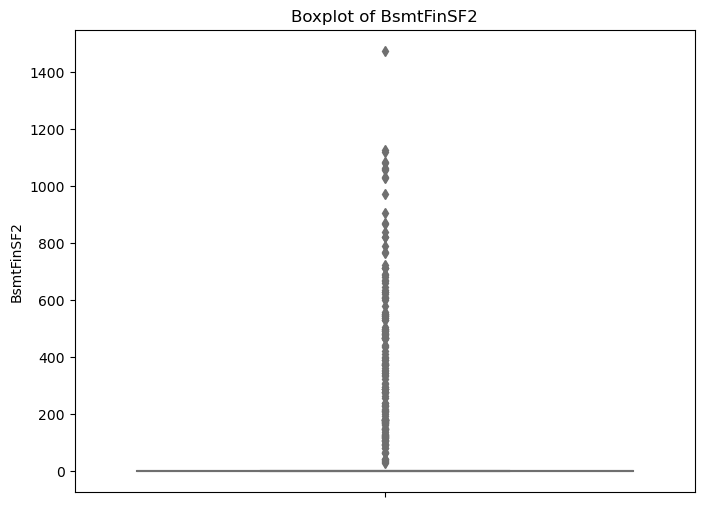

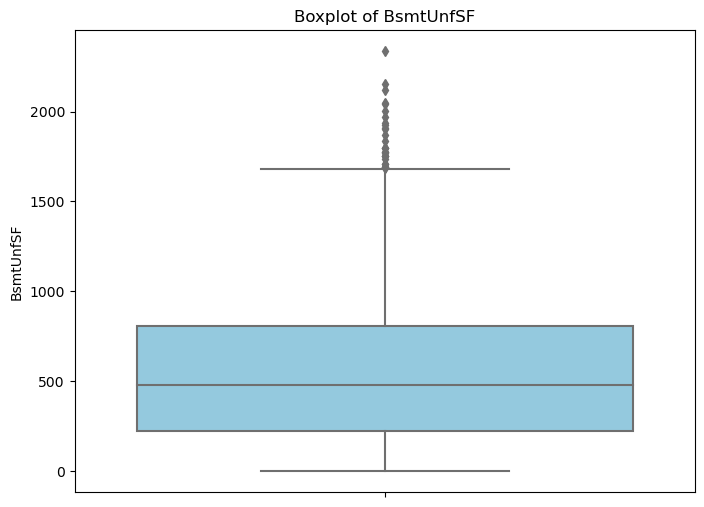

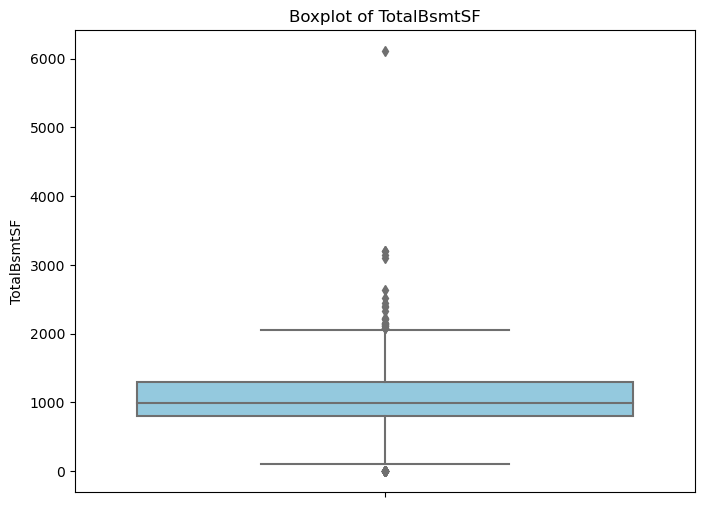

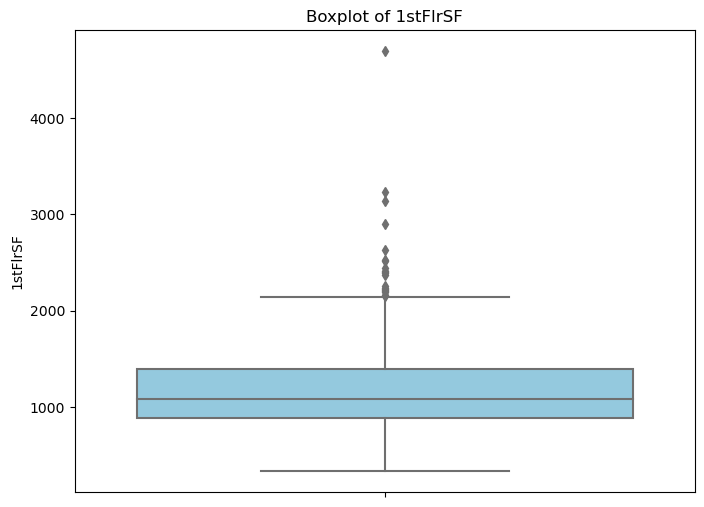

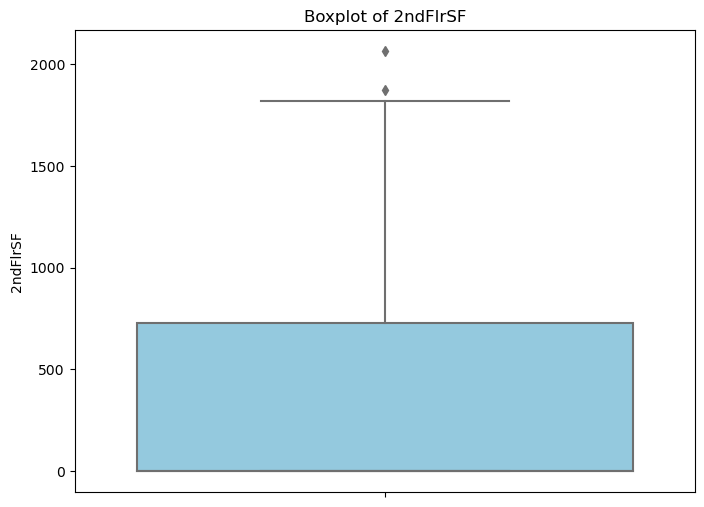

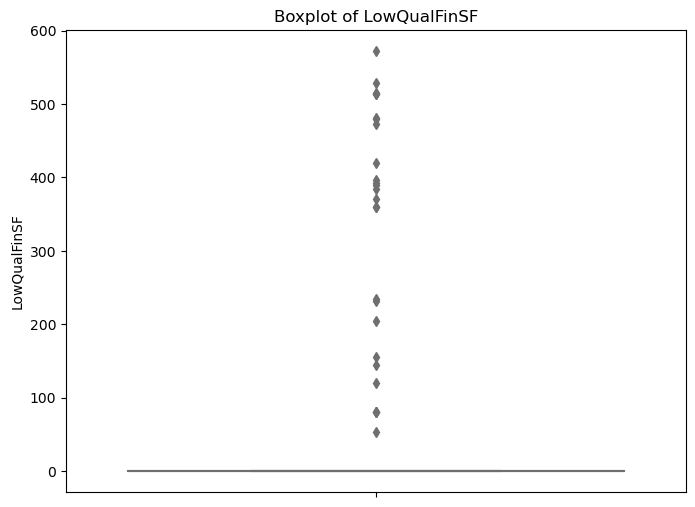

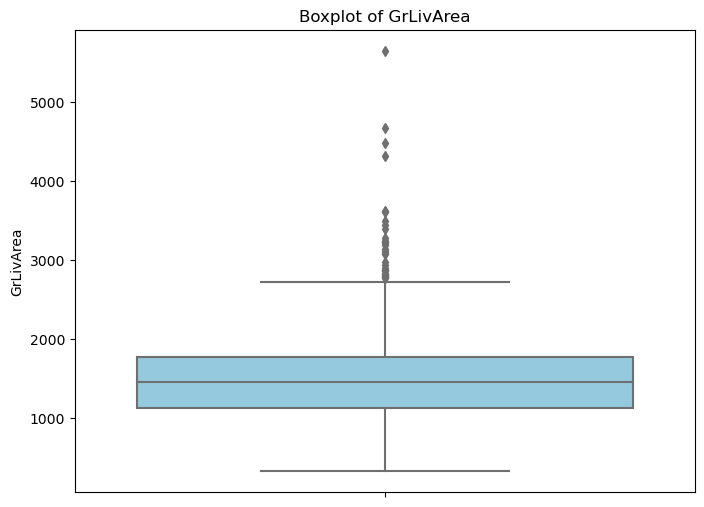

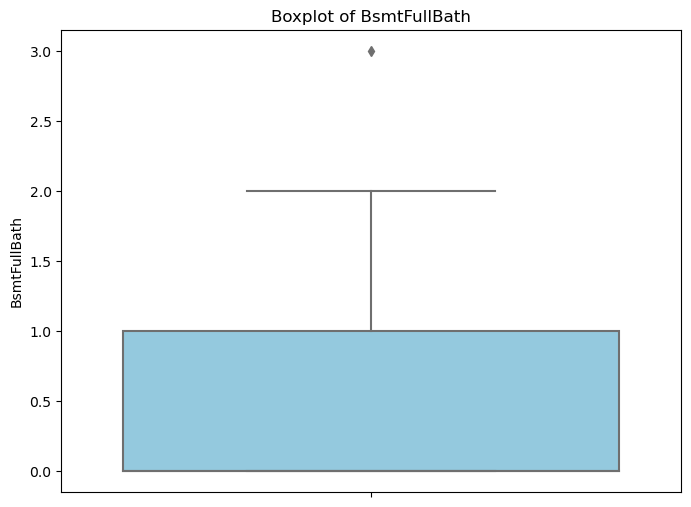

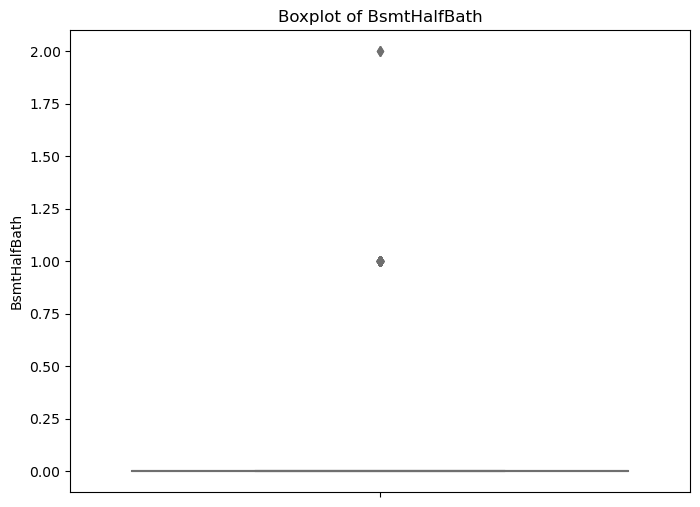

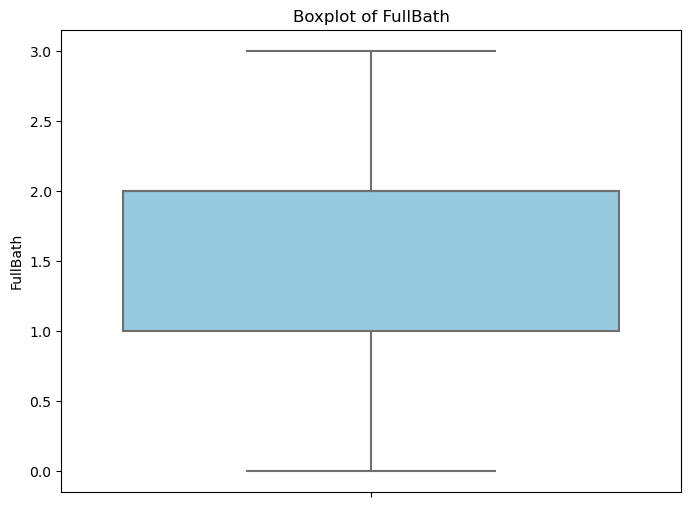

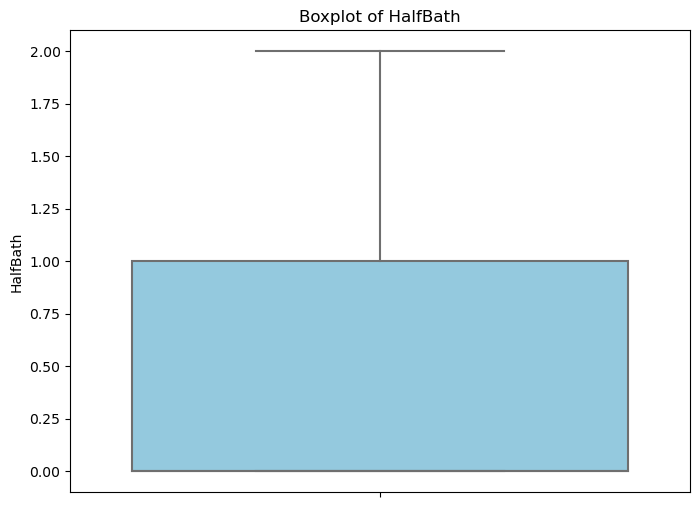

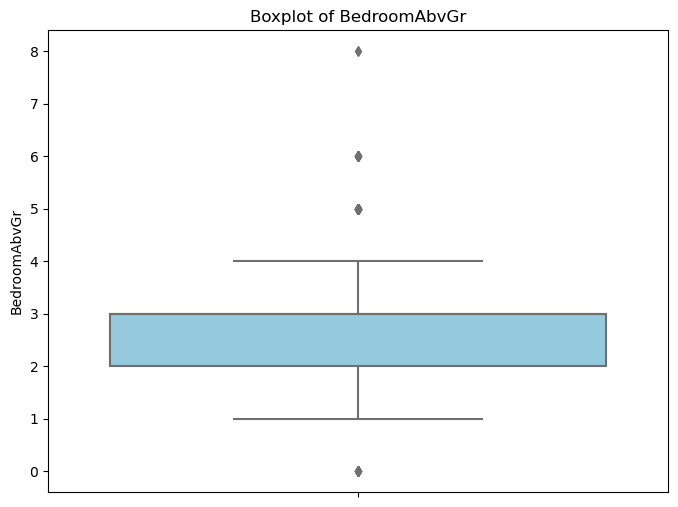

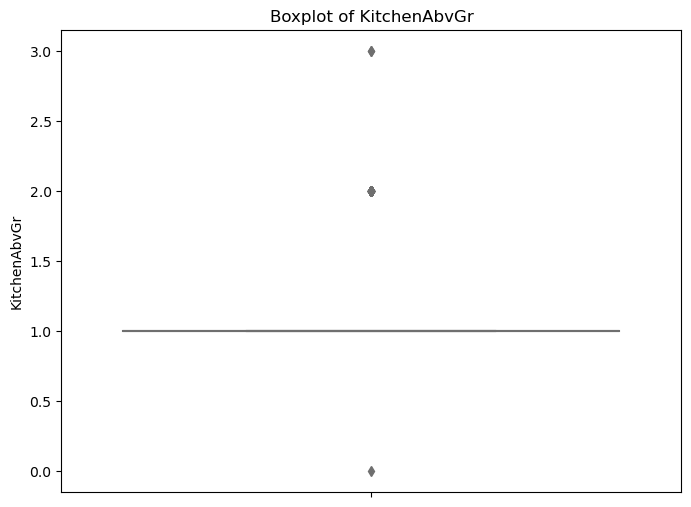

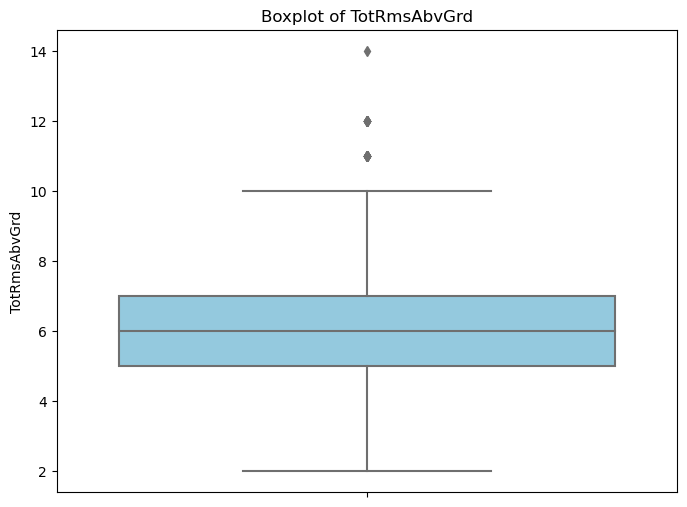

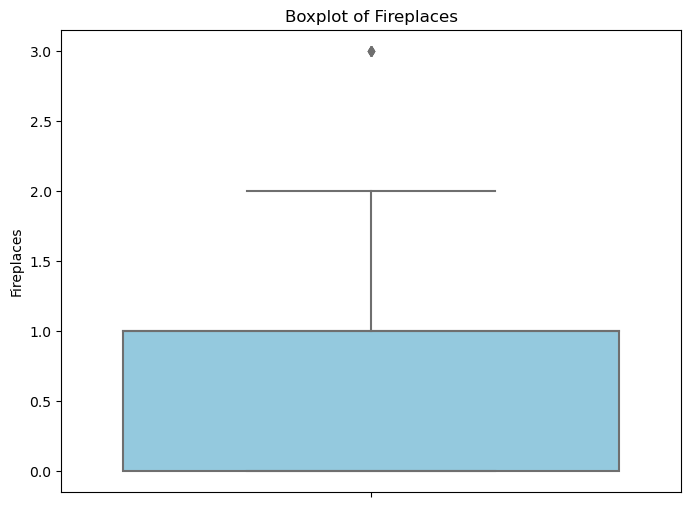

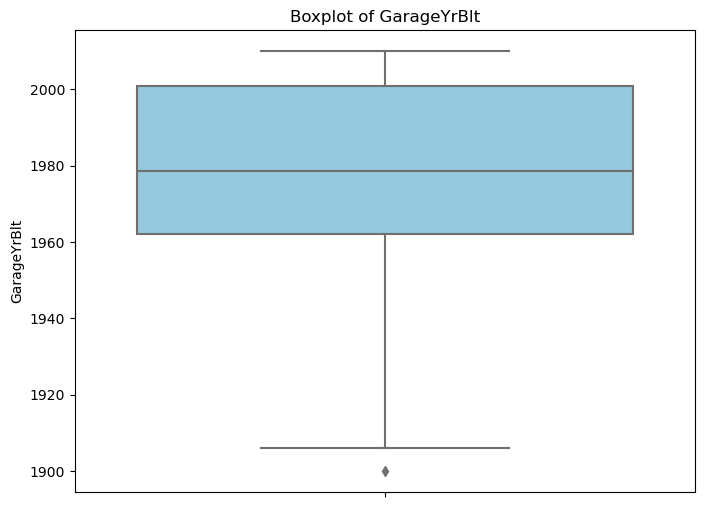

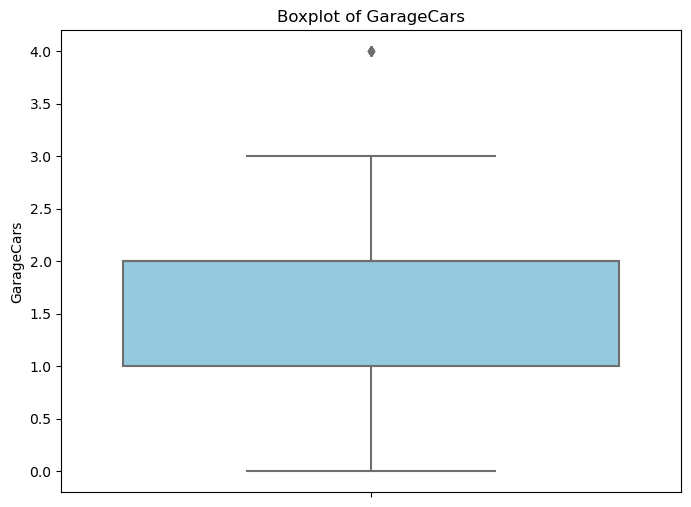

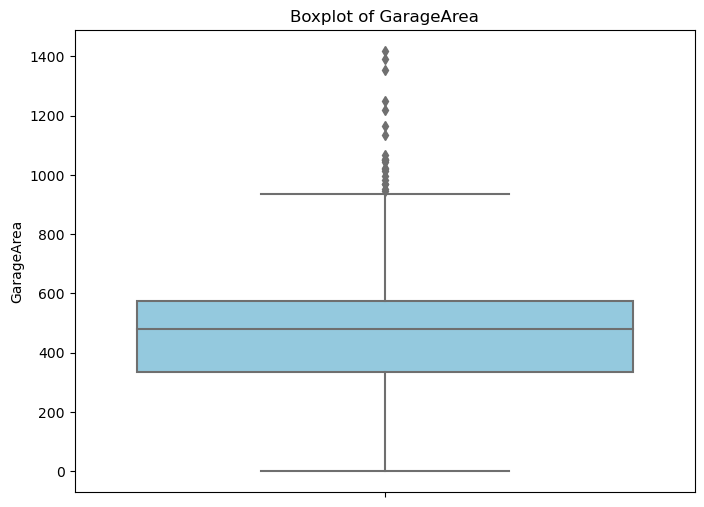

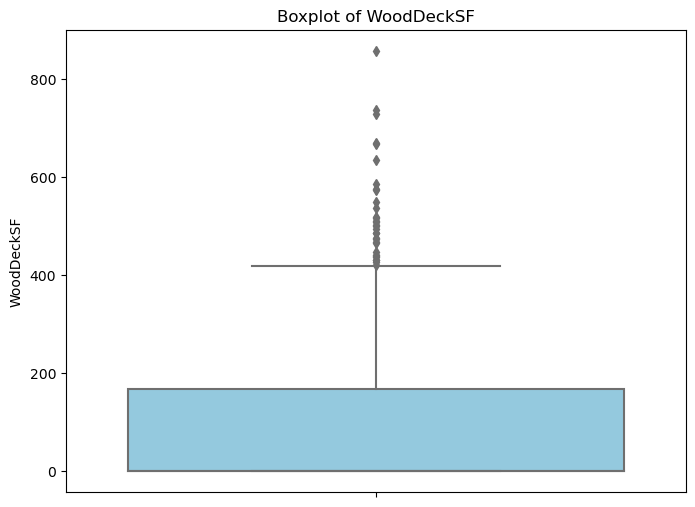

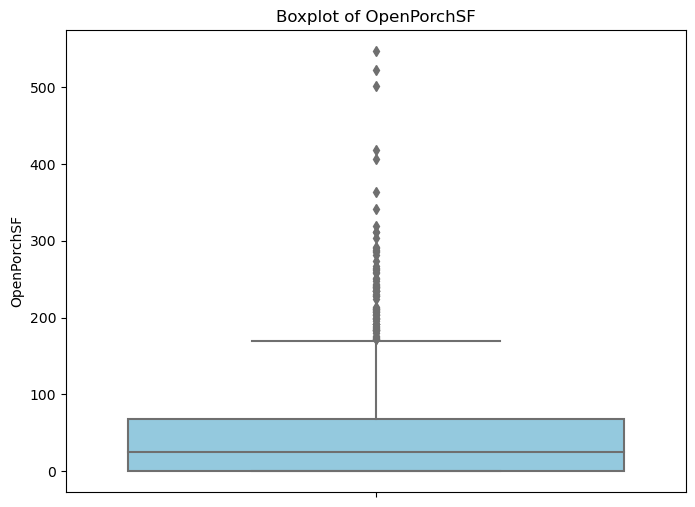

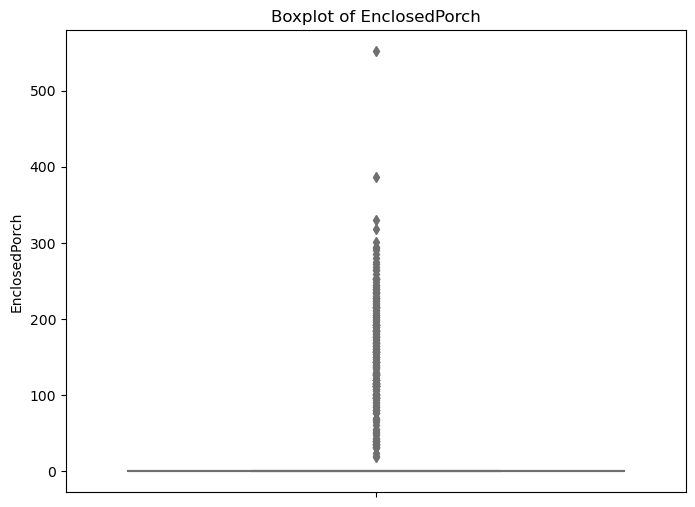

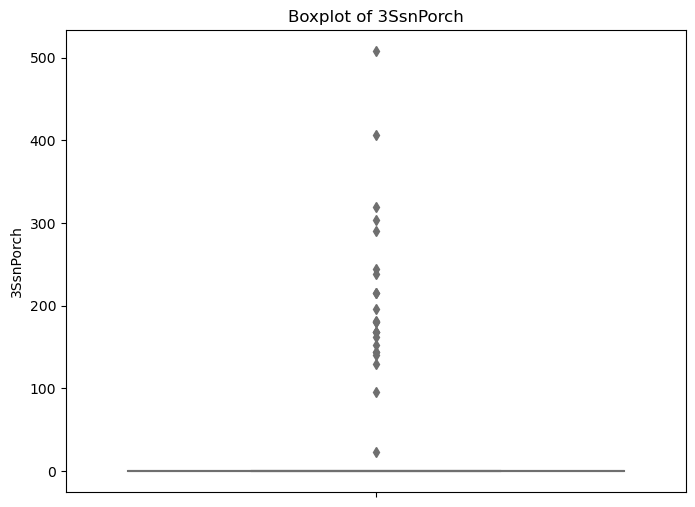

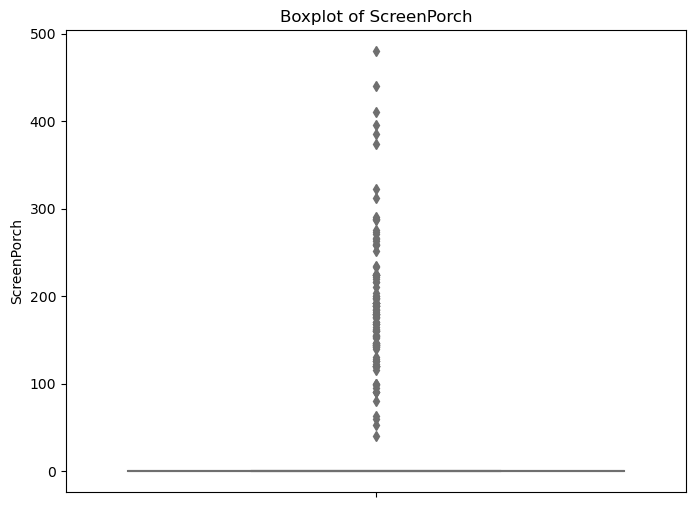

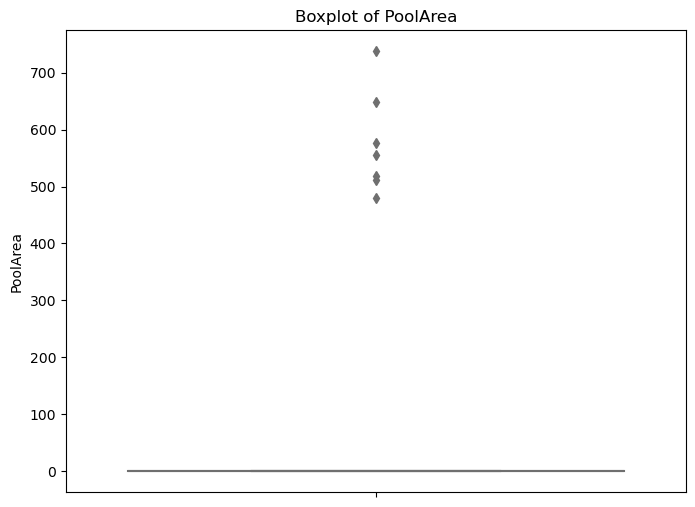

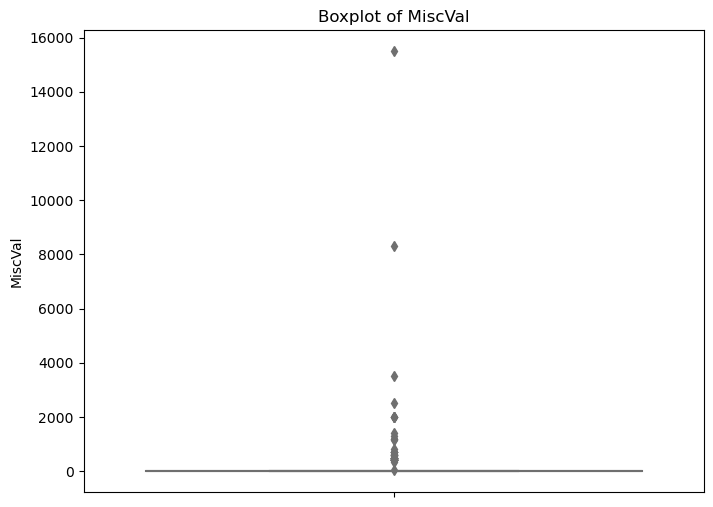

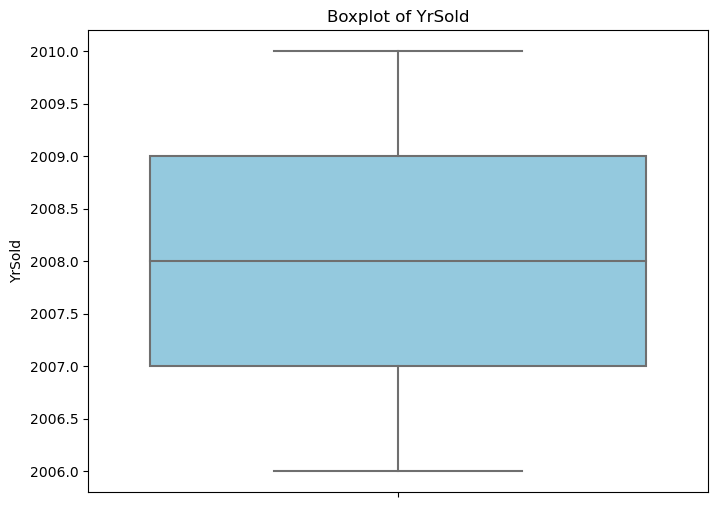

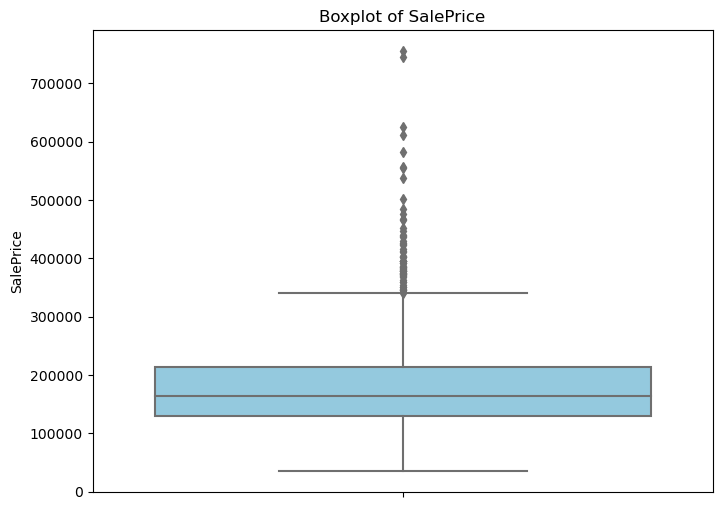

In [20]:
# Selecting only categorical columns for countplot
numerical_cols = df.select_dtypes(include=['int64','float']).columns

# Plotting boxplot for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df1, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


These boxplots help visualize the distribution and spread of each numerical variable in the dataset, facilitating the identification of outliers, variability, and overall patterns.


In [21]:
# Handling outliers using IQR
def handle_outliers(df1, outlier_threshold=0.5):
    numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        df1[col] = df1[col].apply(lambda x: x if lower_bound <= x <= upper_bound else df1[col].median())

    return df

# Apply the function to handle outliers
df1 = handle_outliers(df1)

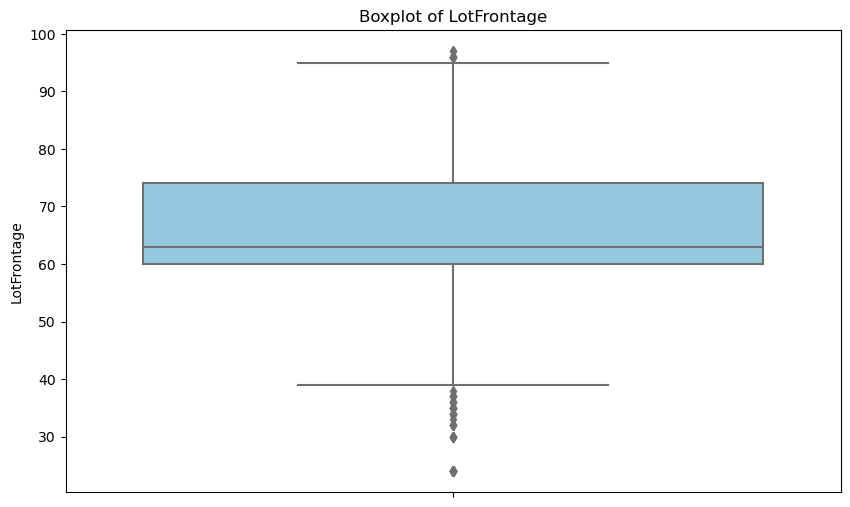

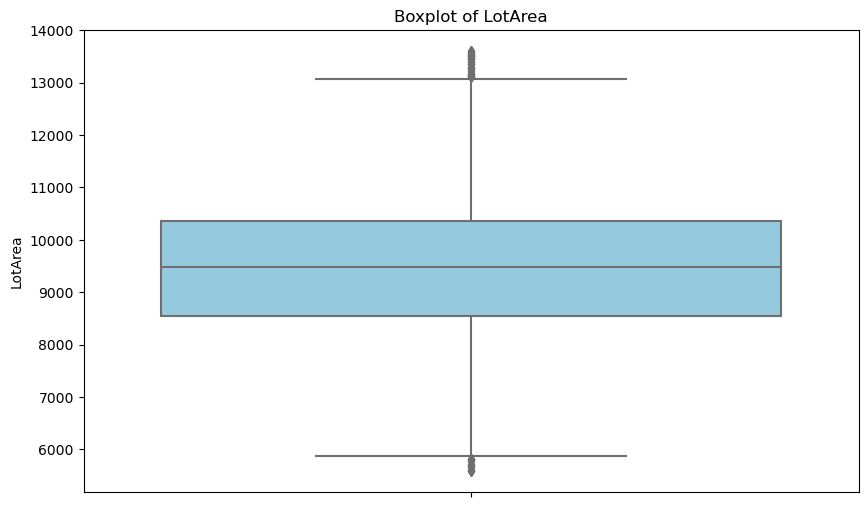

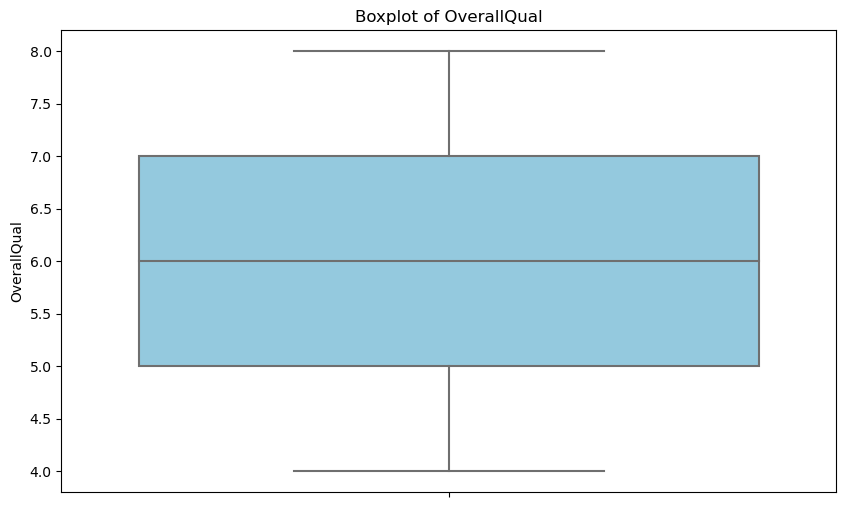

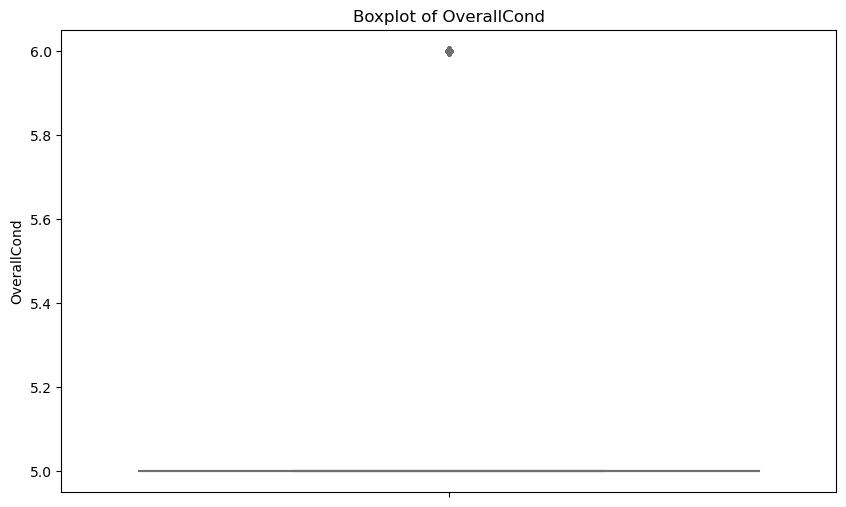

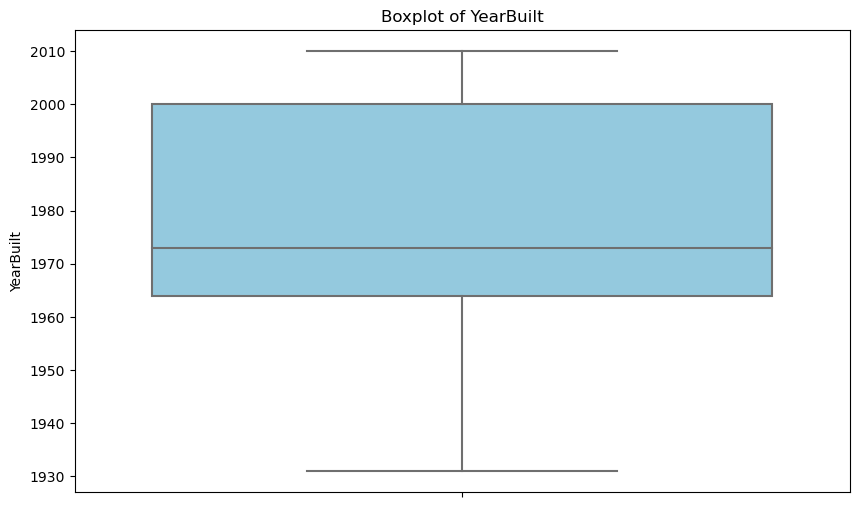

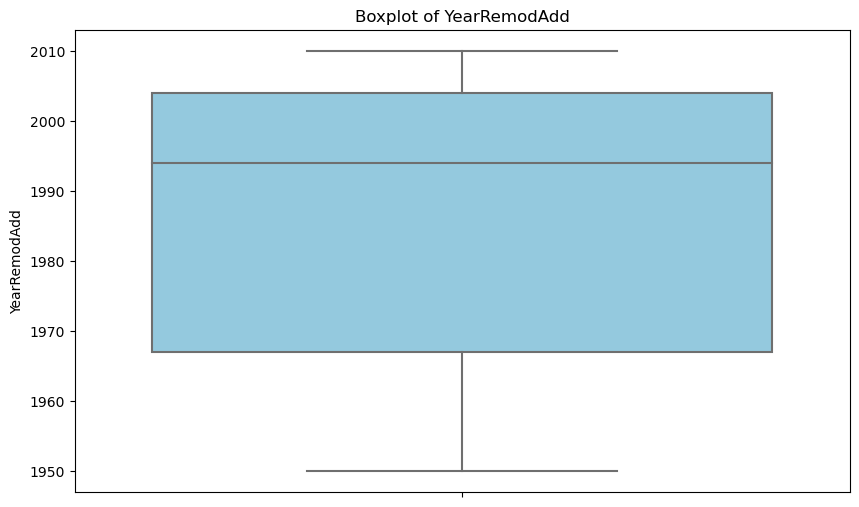

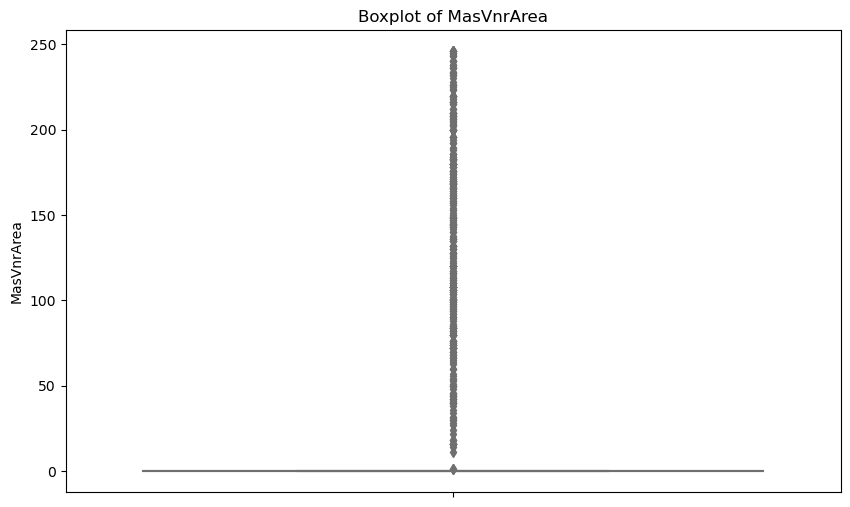

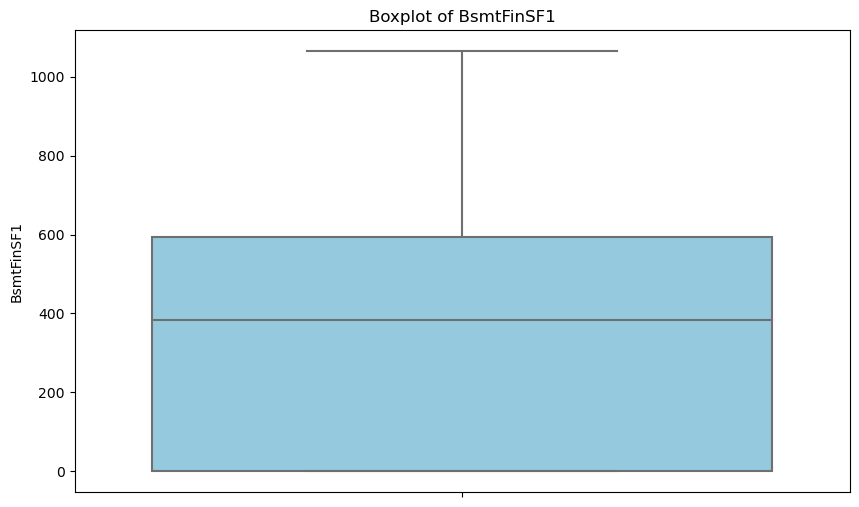

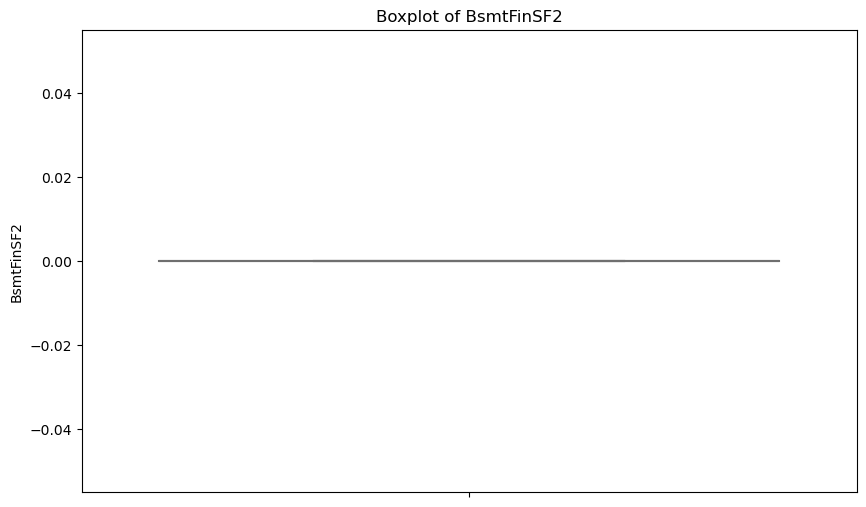

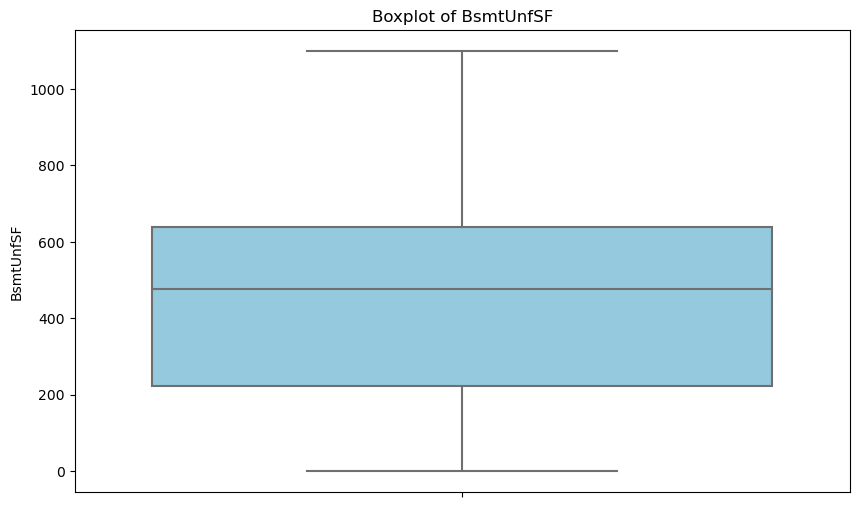

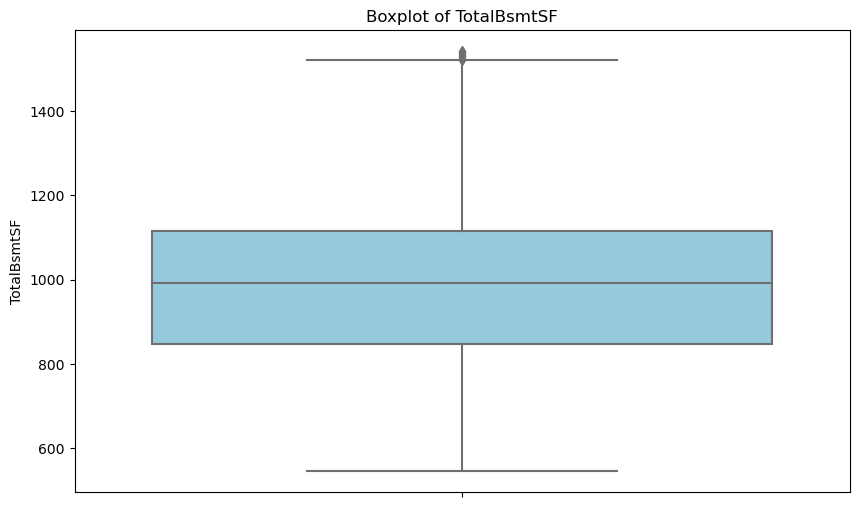

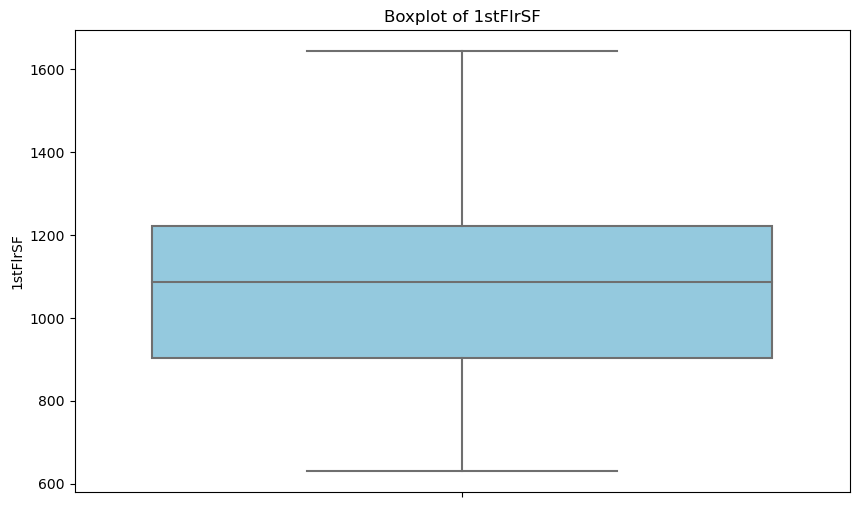

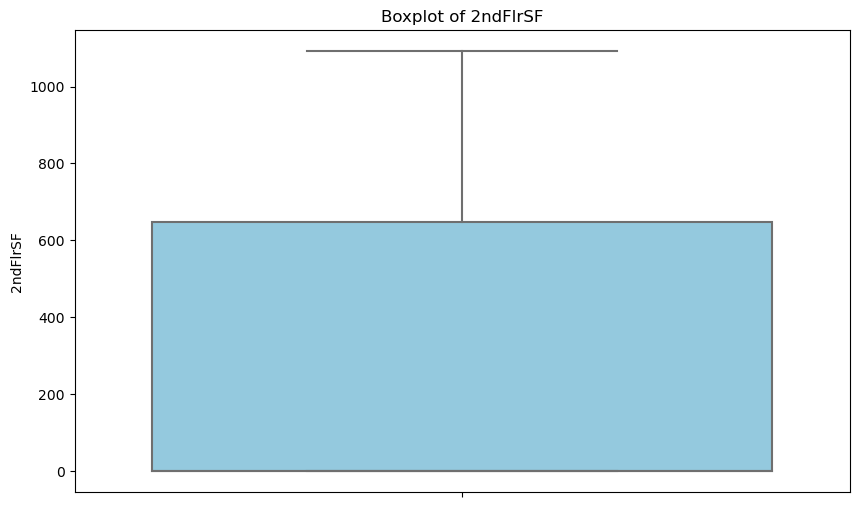

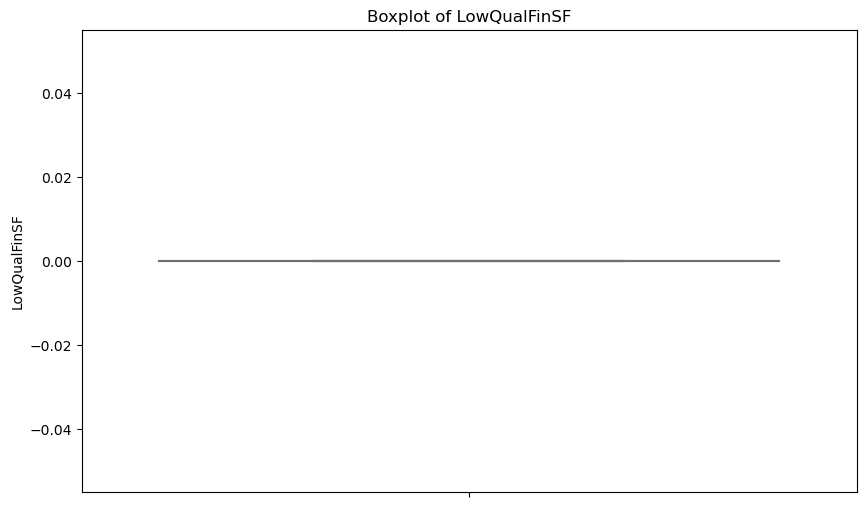

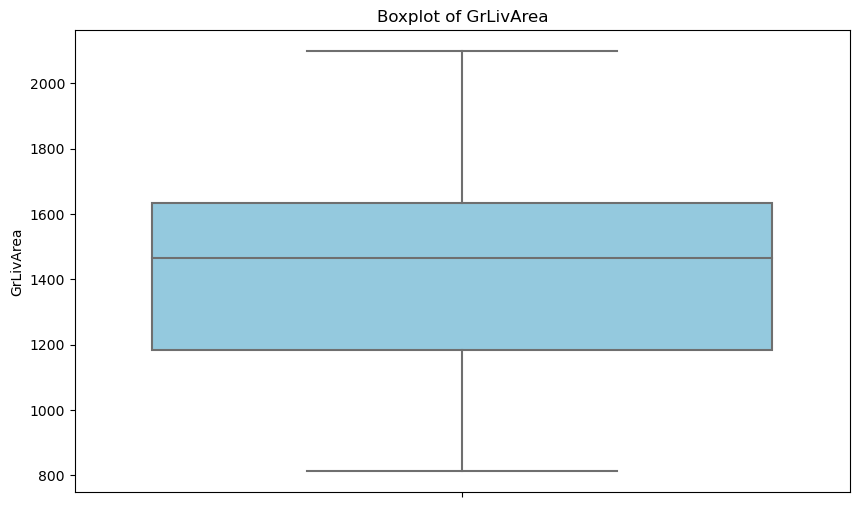

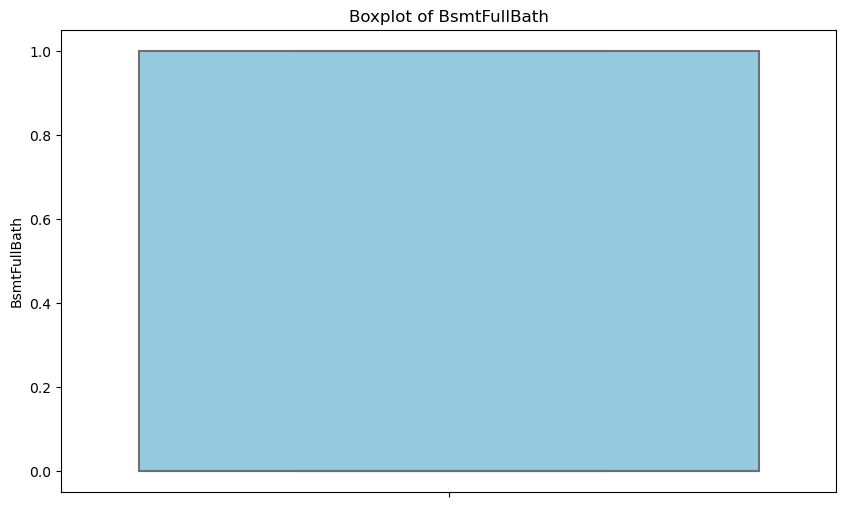

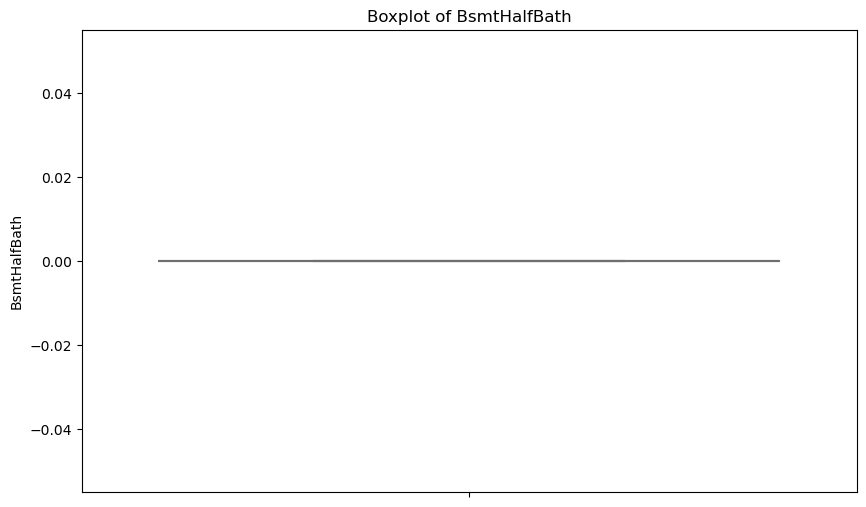

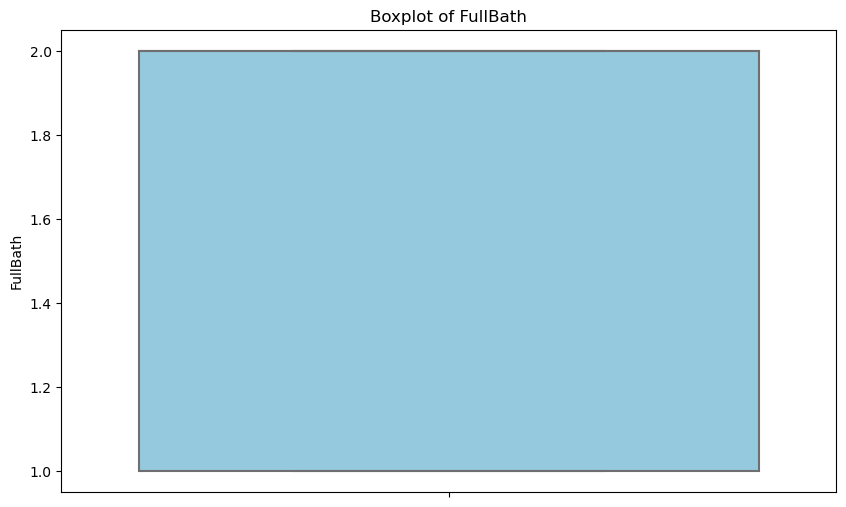

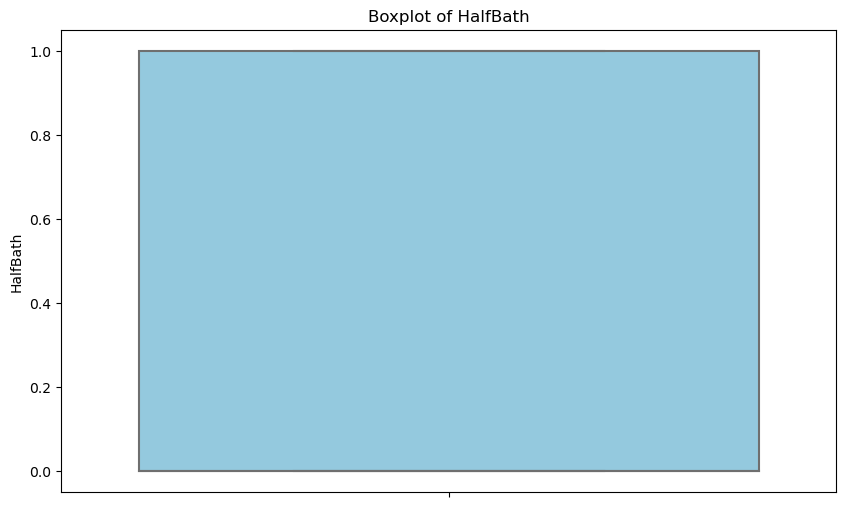

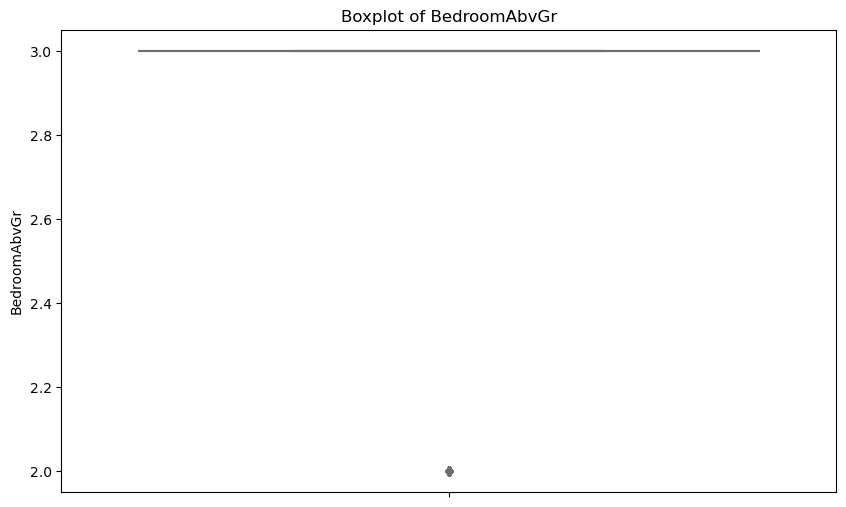

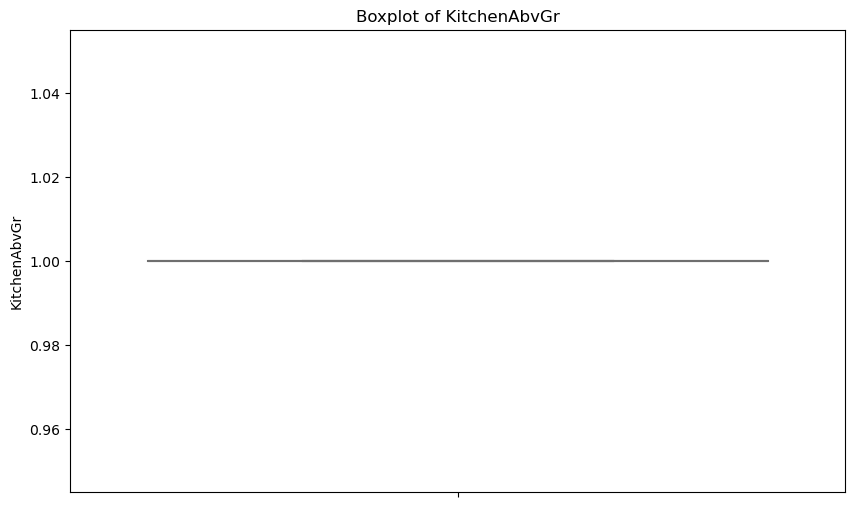

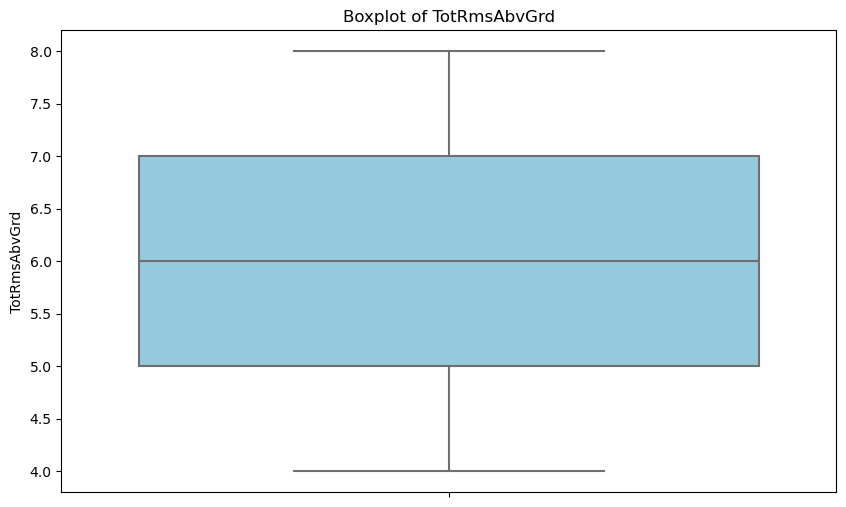

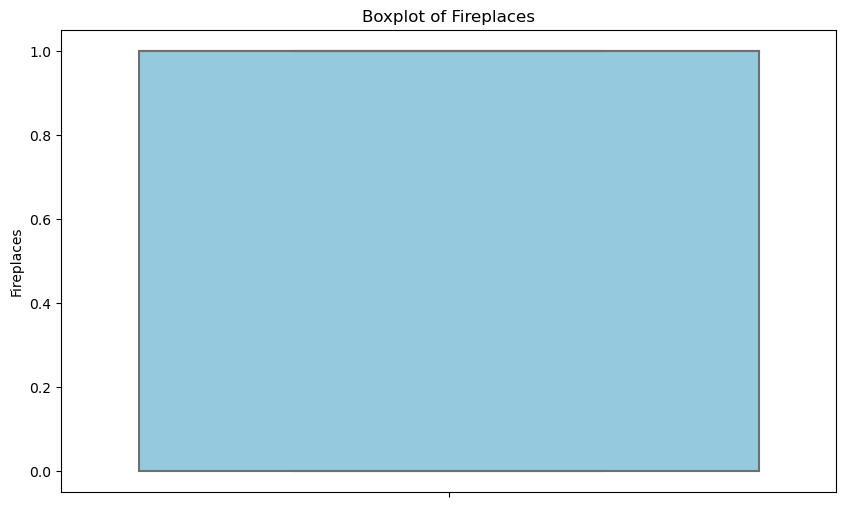

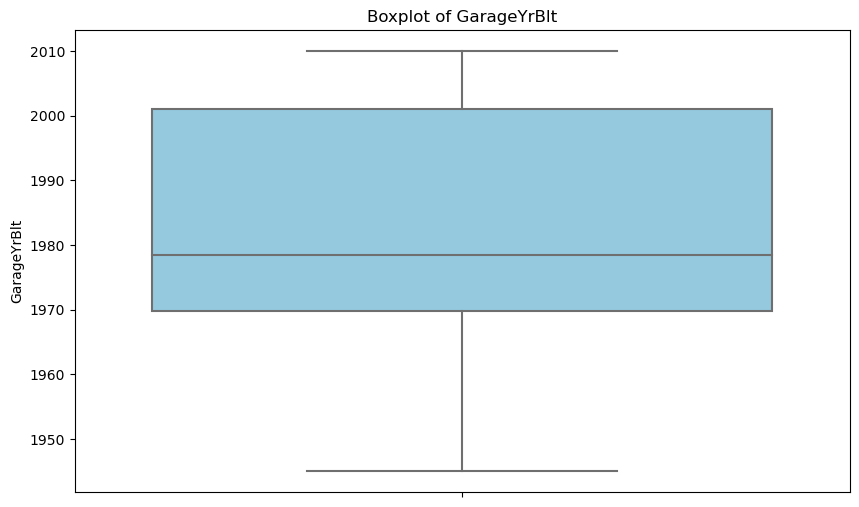

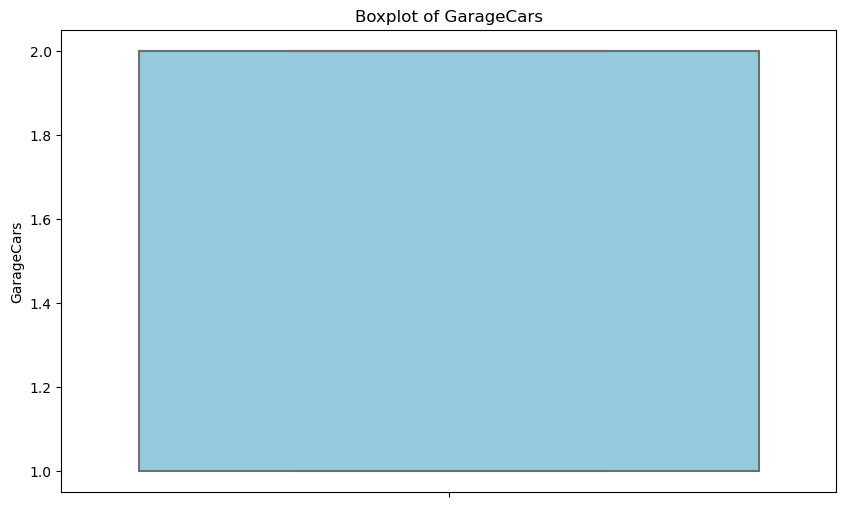

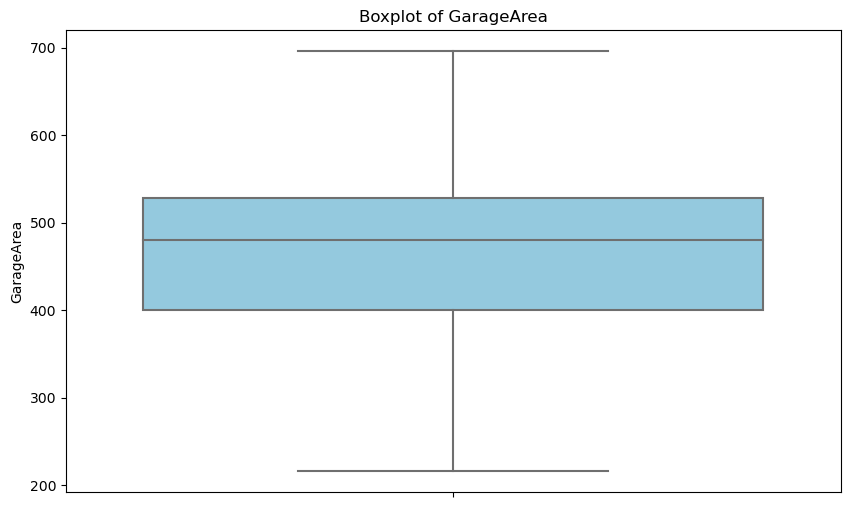

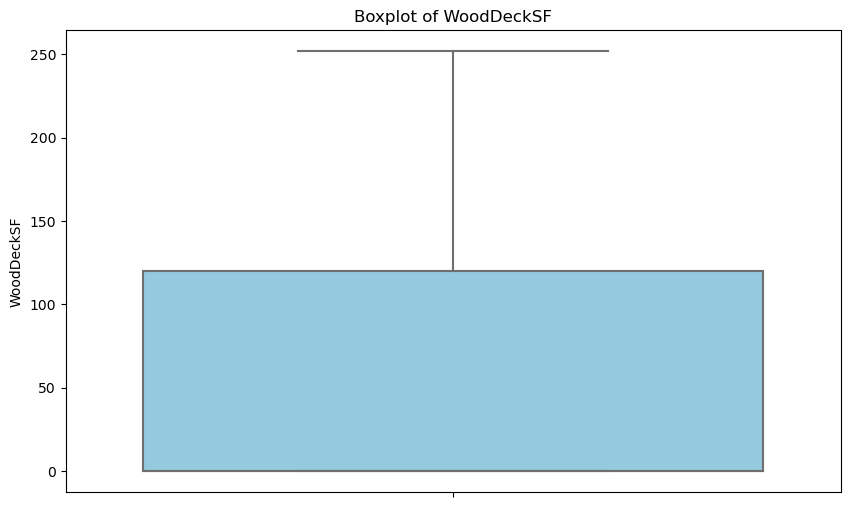

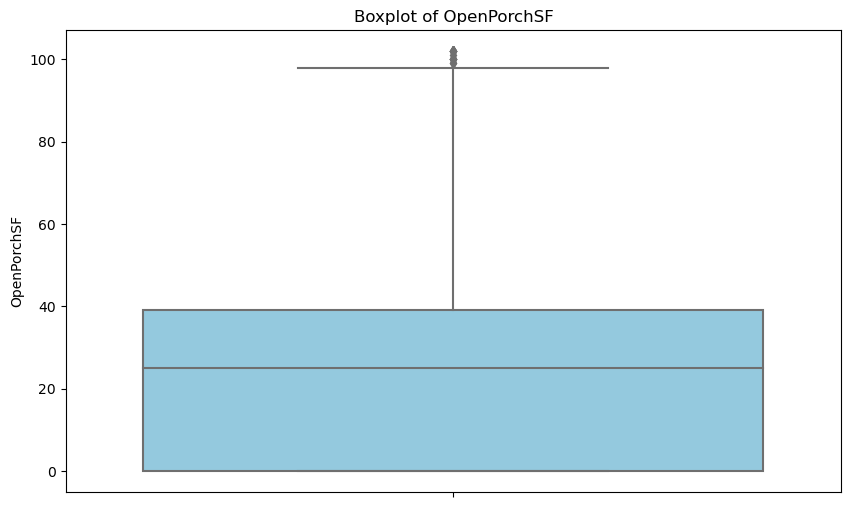

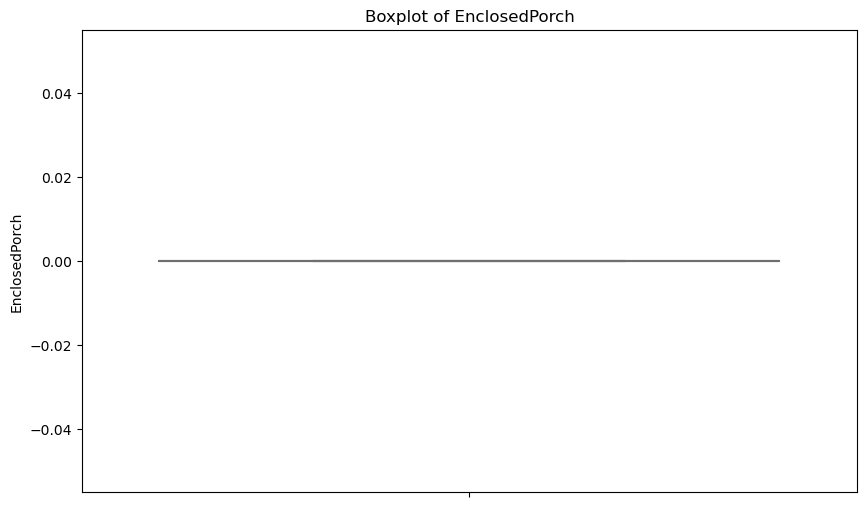

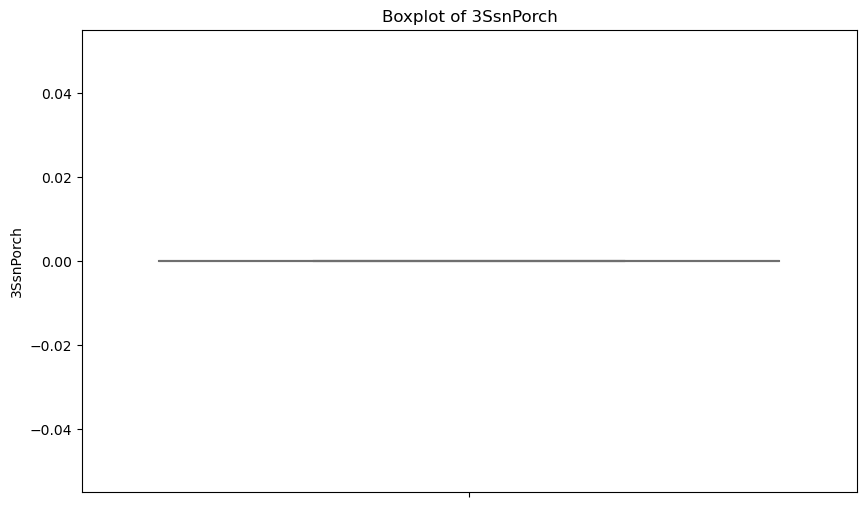

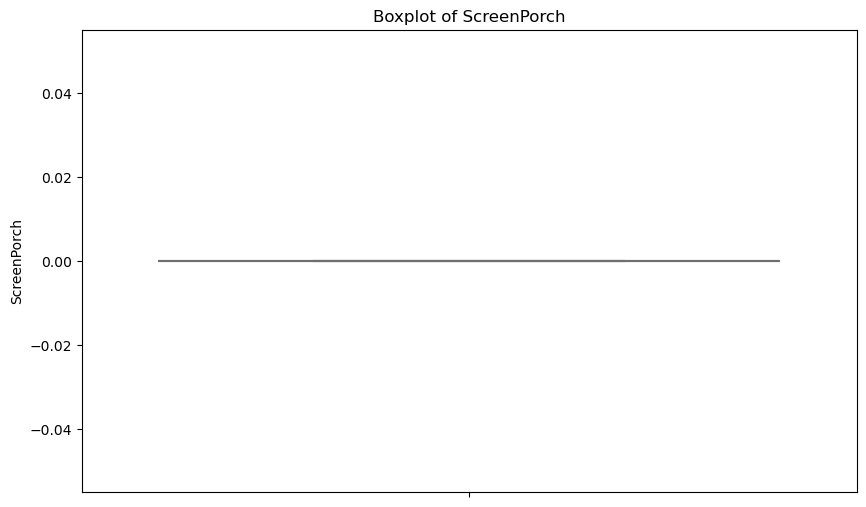

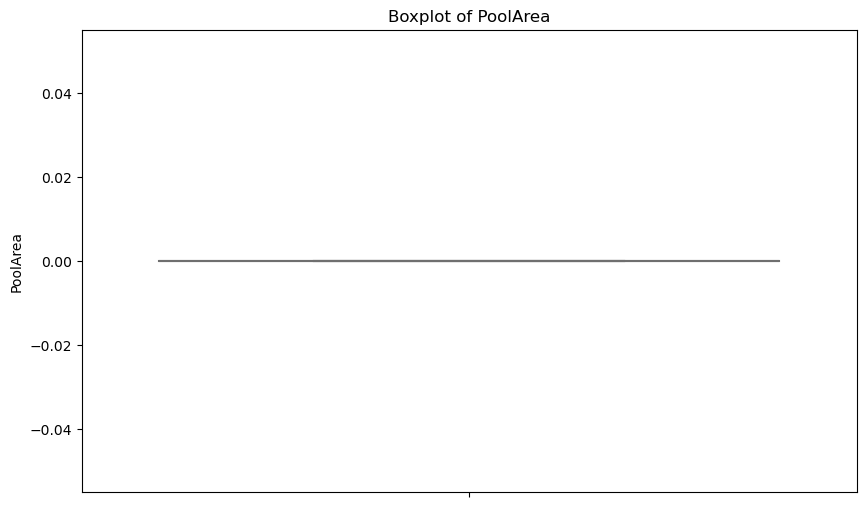

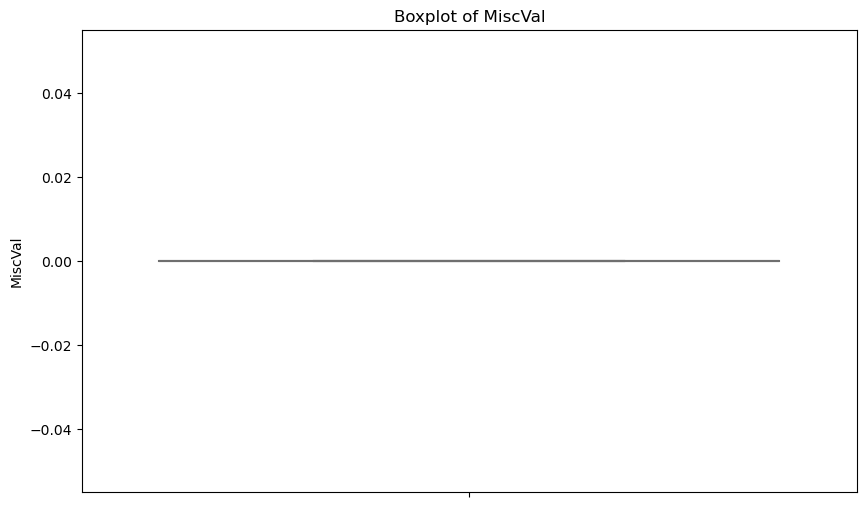

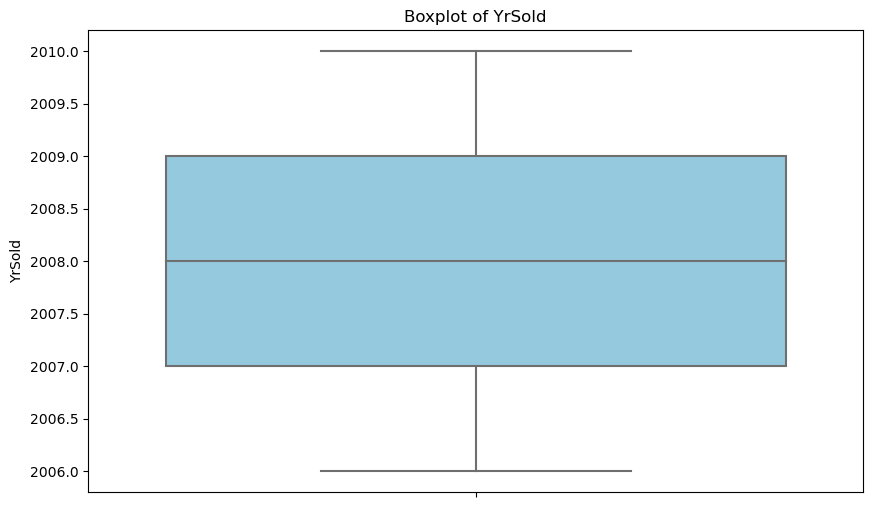

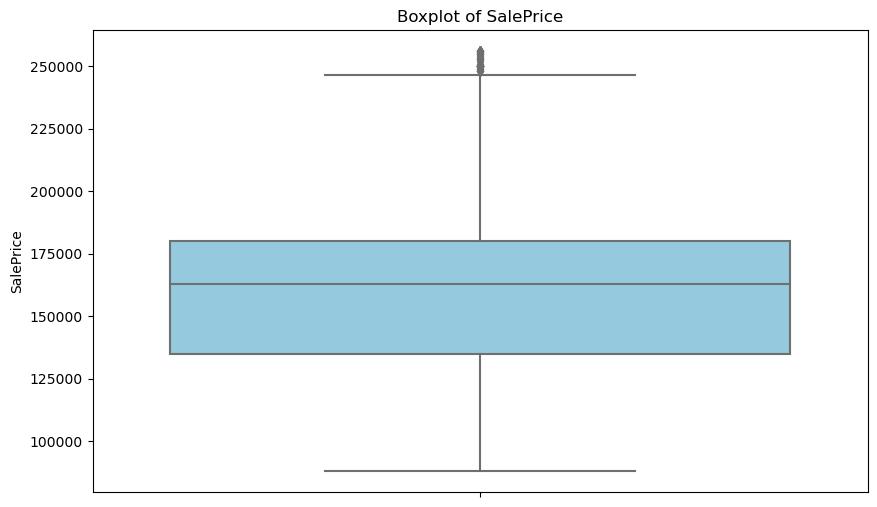

In [22]:
# Selecting only categorical columns for countplot
numerical_cols = df.select_dtypes(include=['int64','float']).columns

# Plotting boxplot for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df1, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


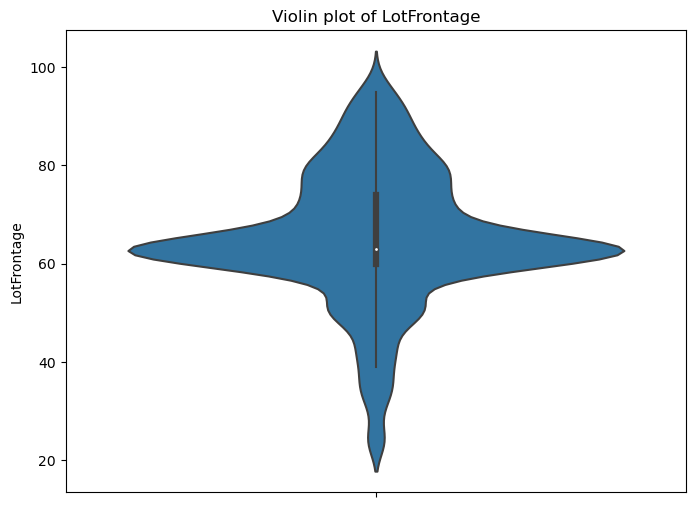

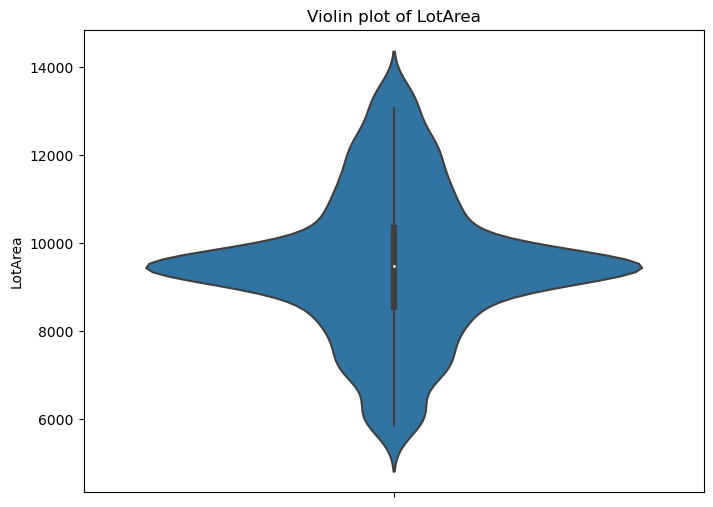

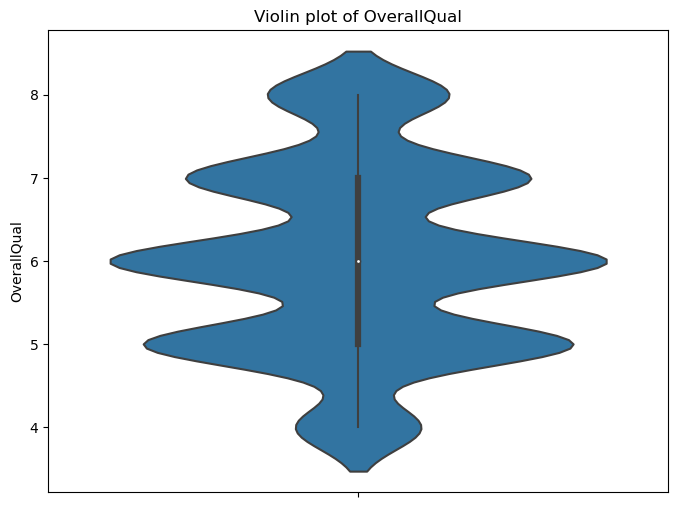

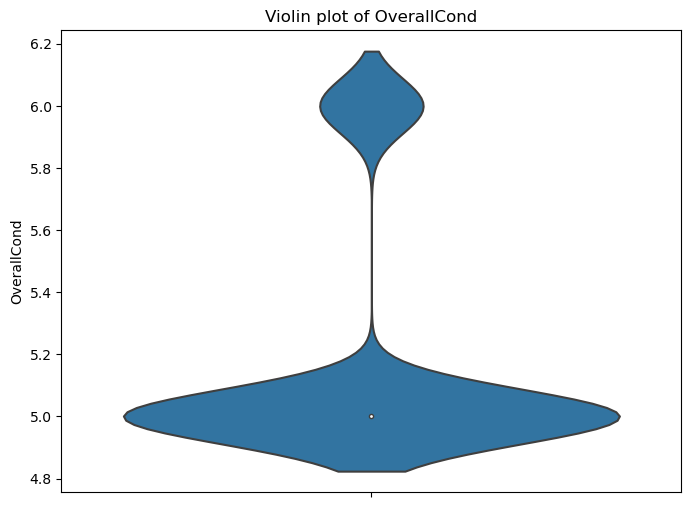

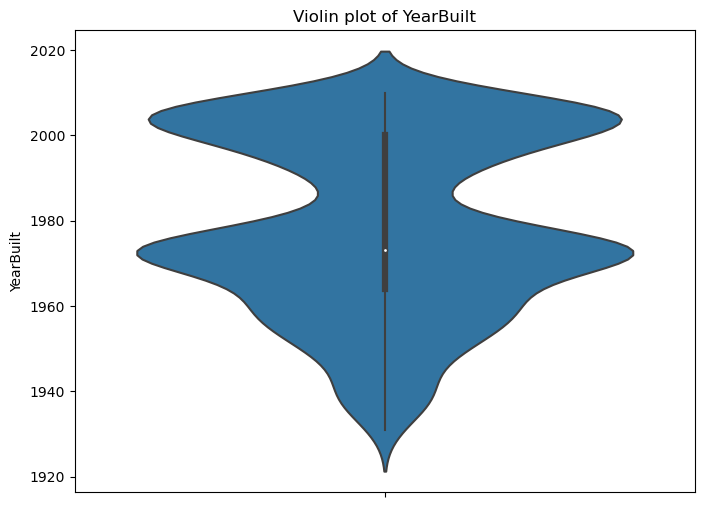

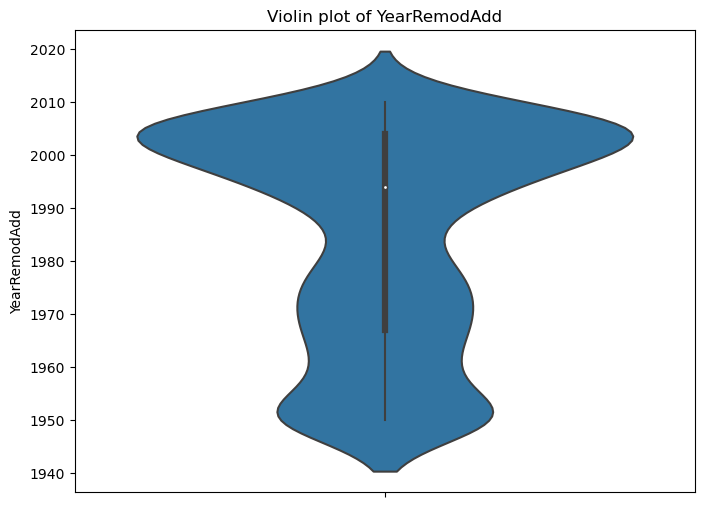

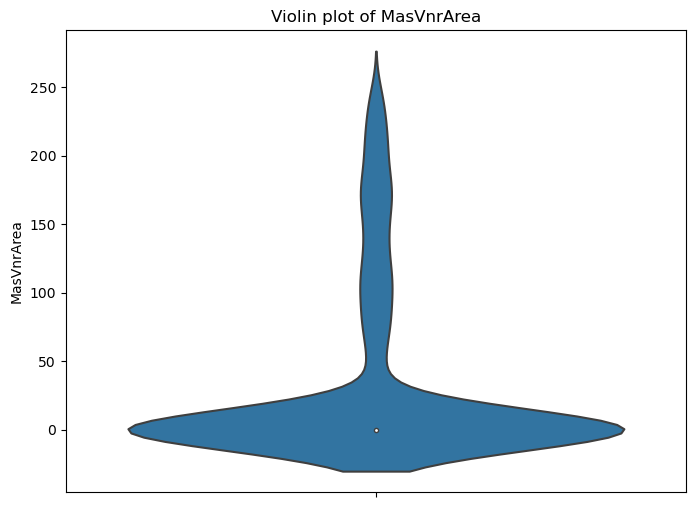

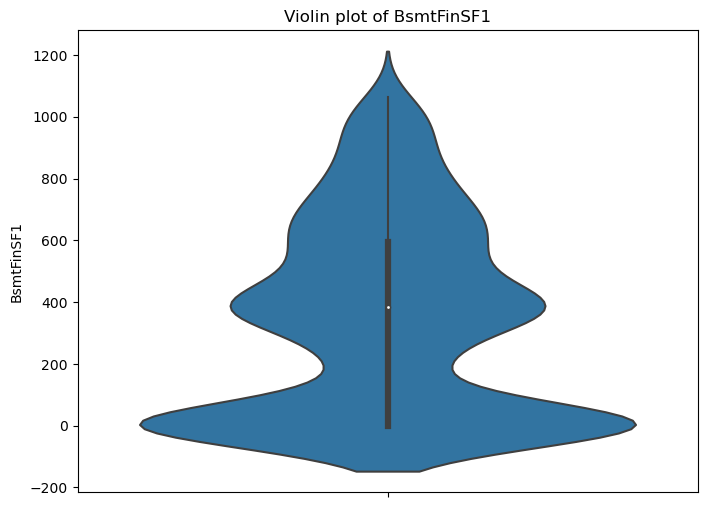

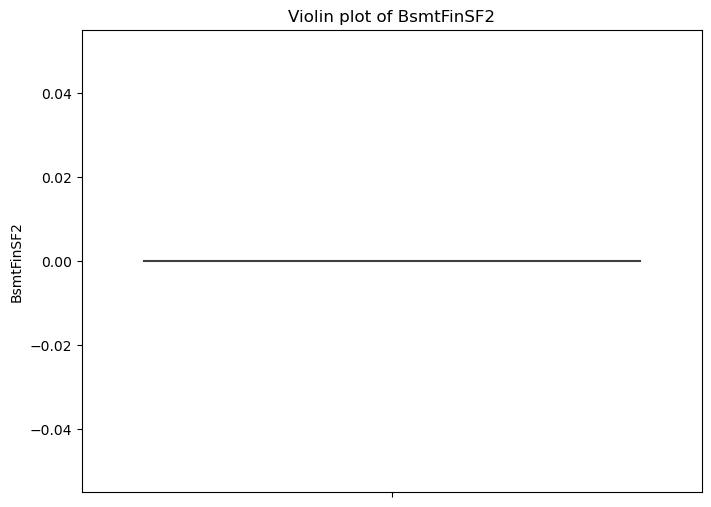

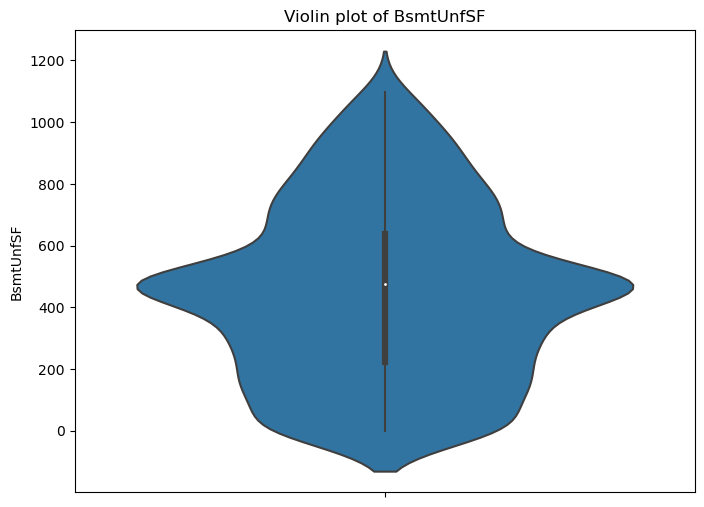

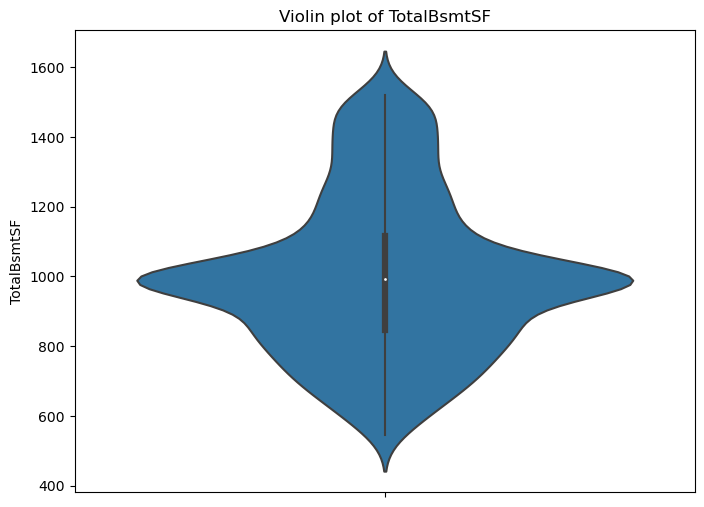

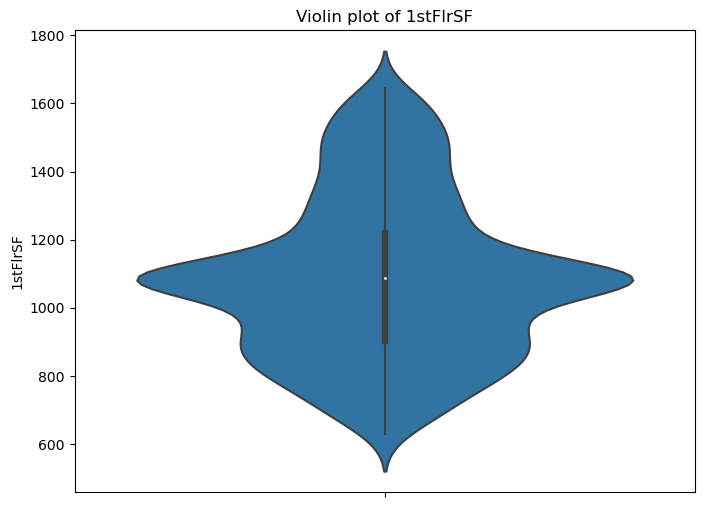

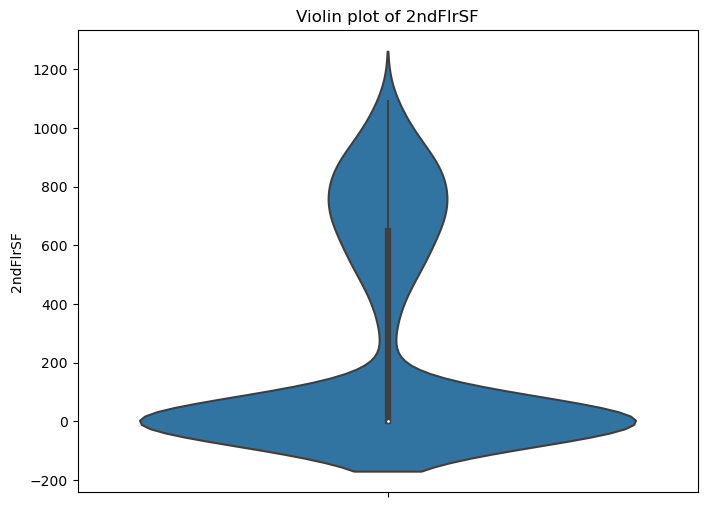

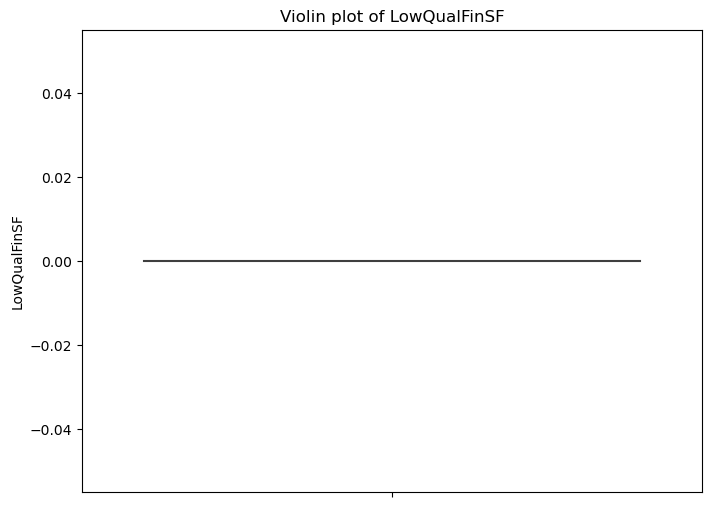

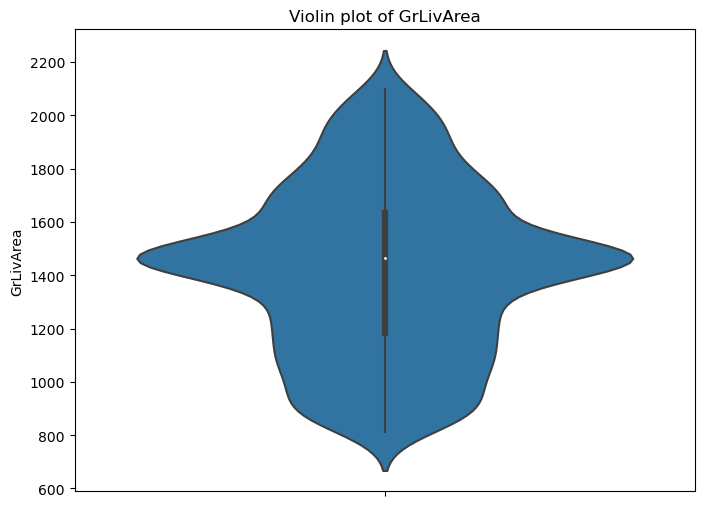

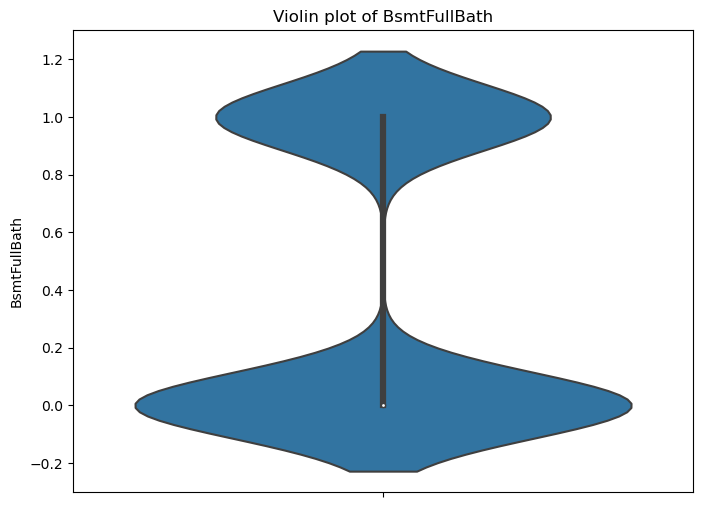

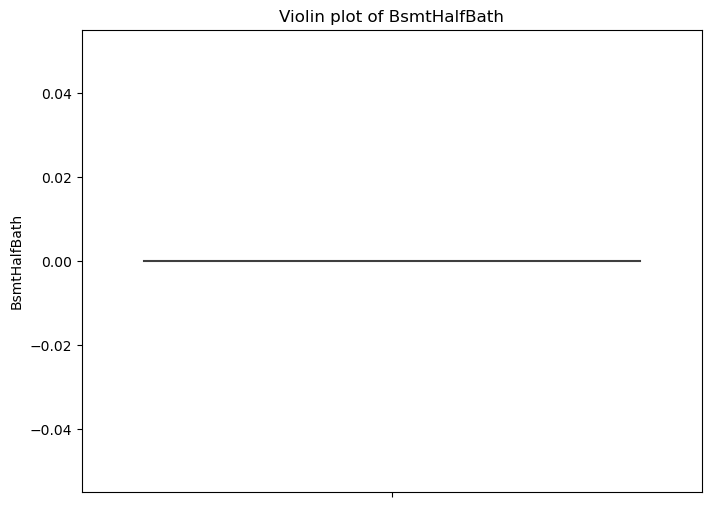

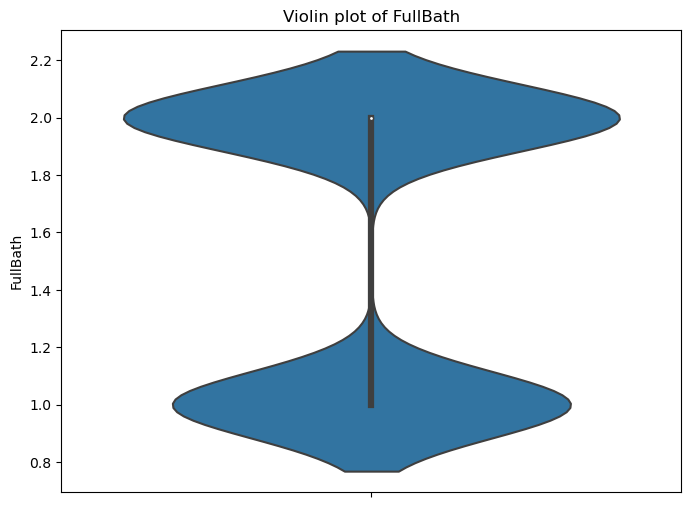

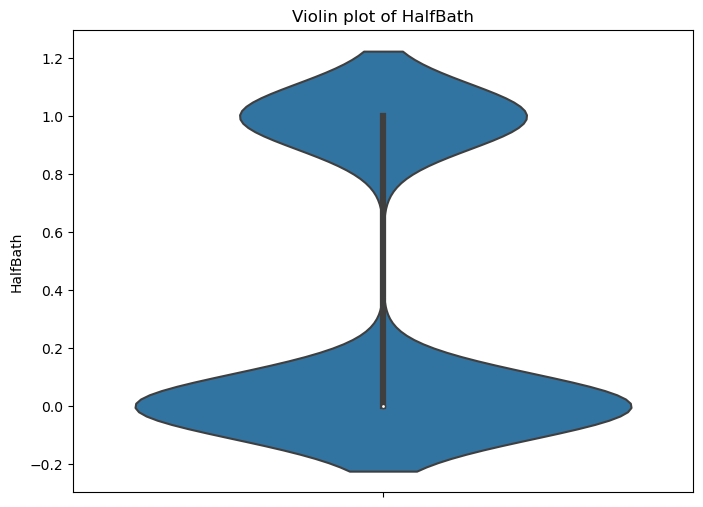

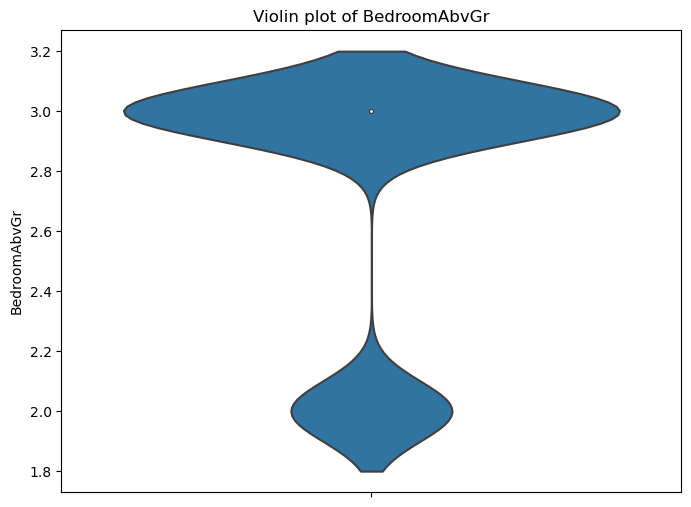

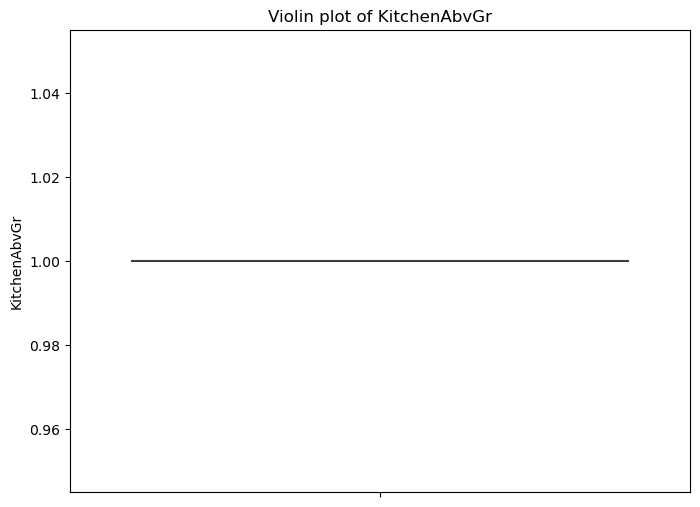

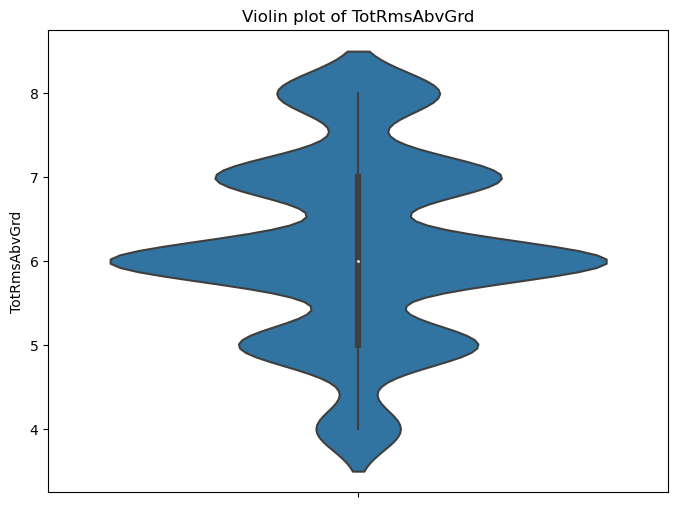

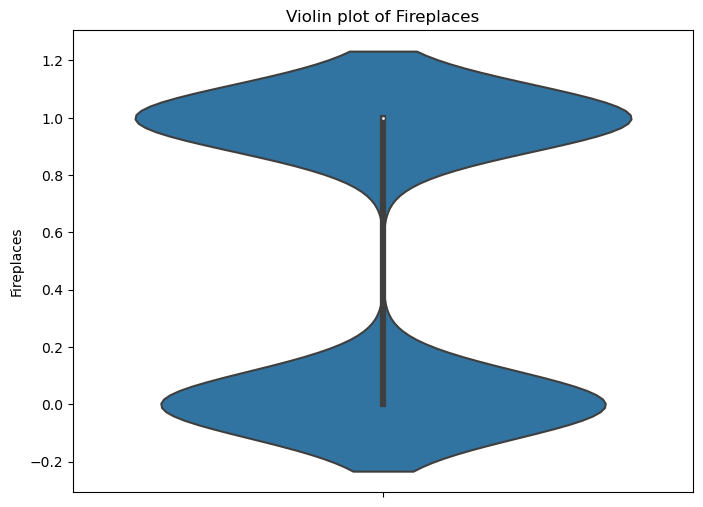

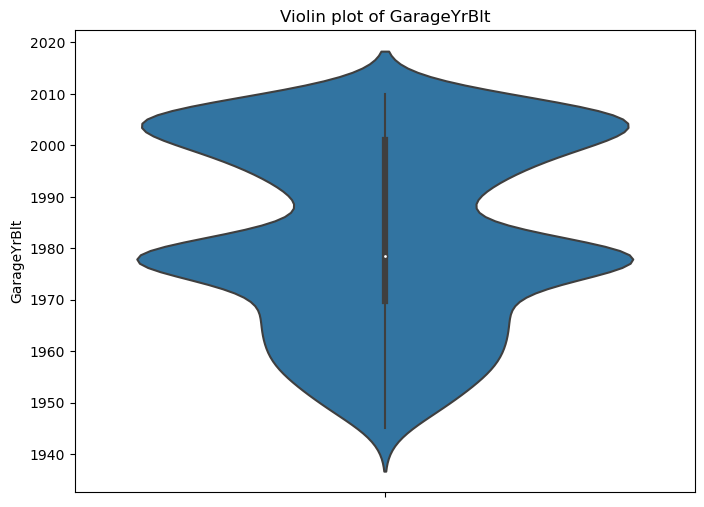

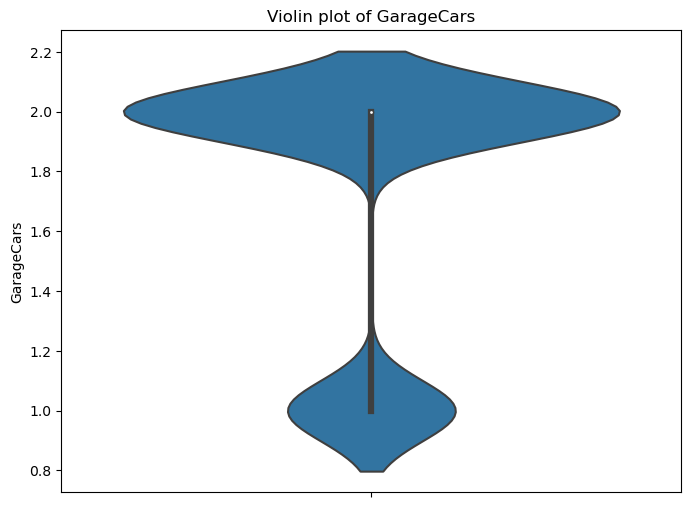

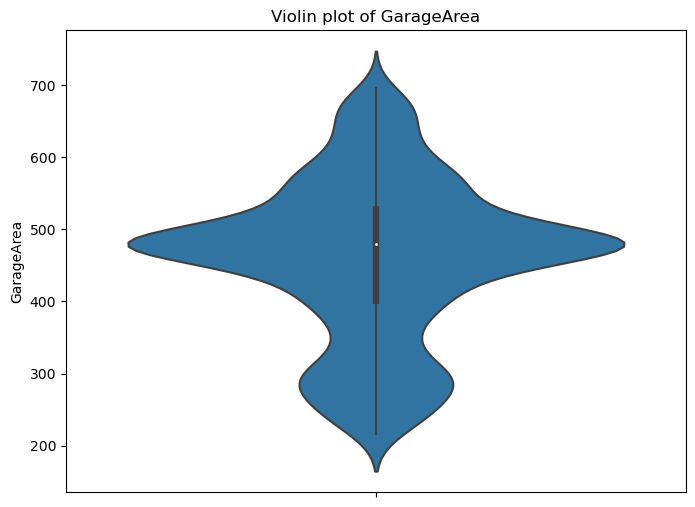

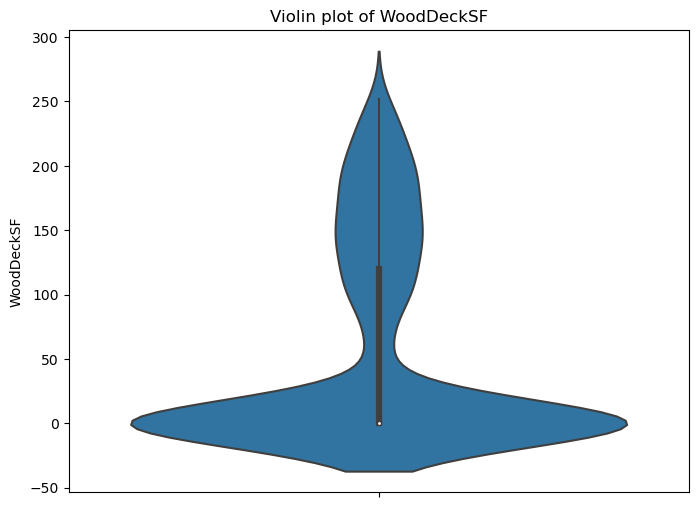

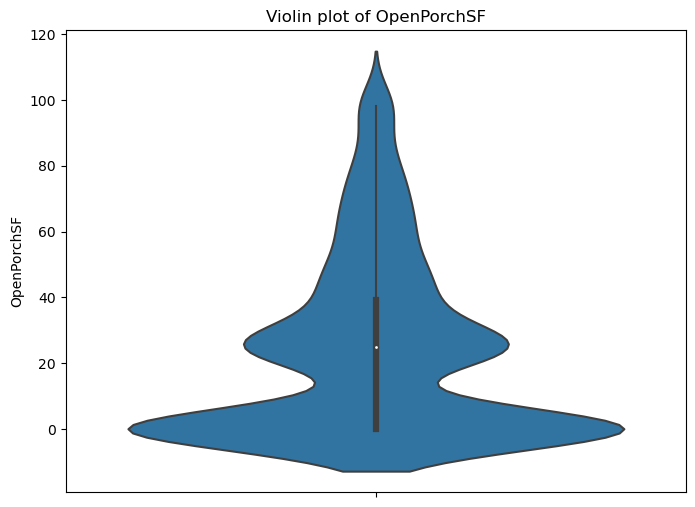

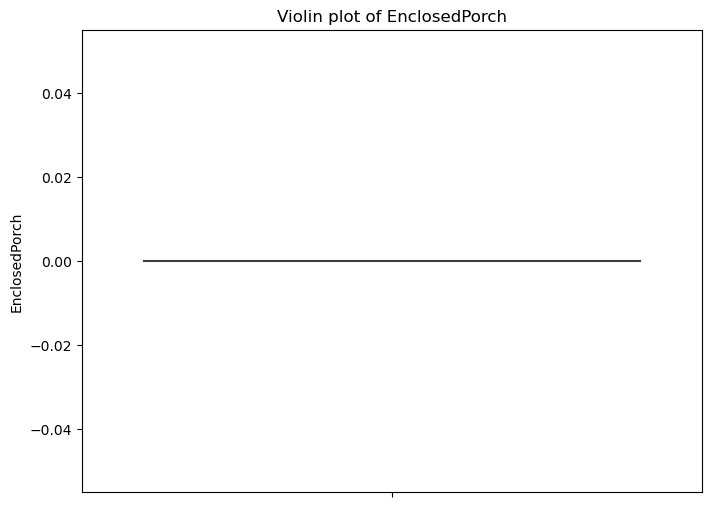

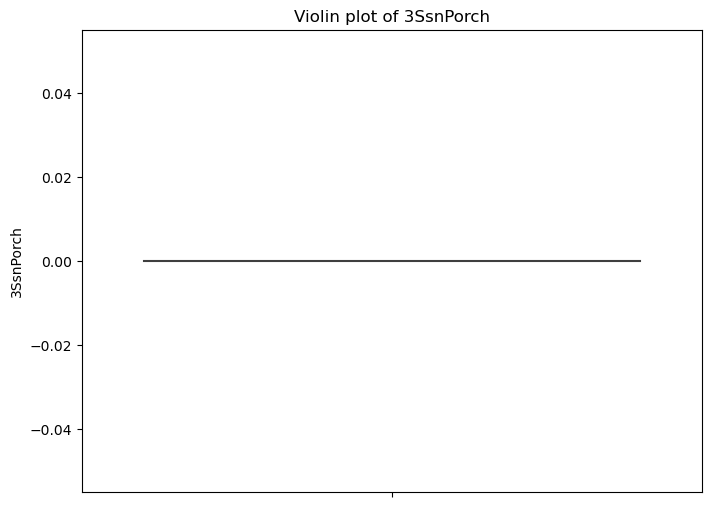

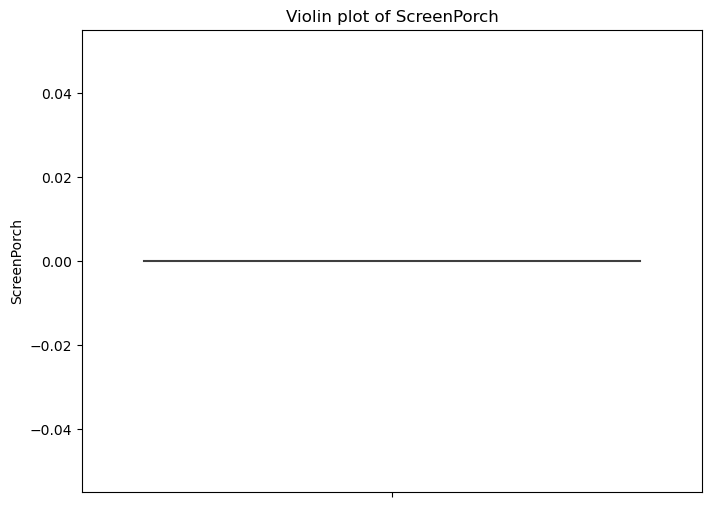

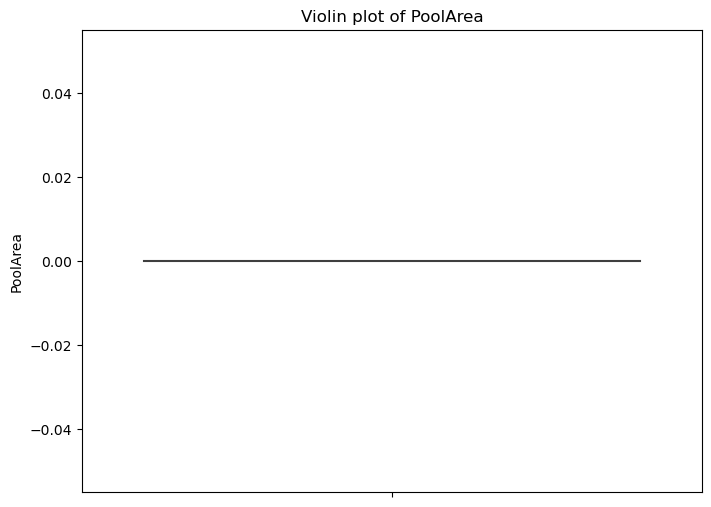

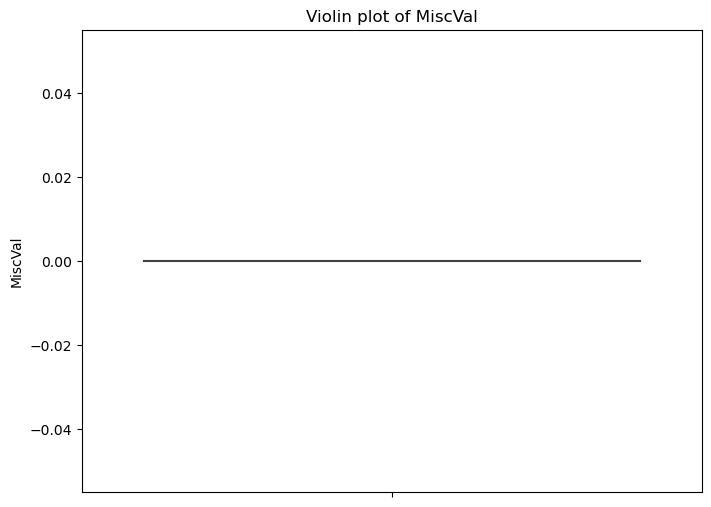

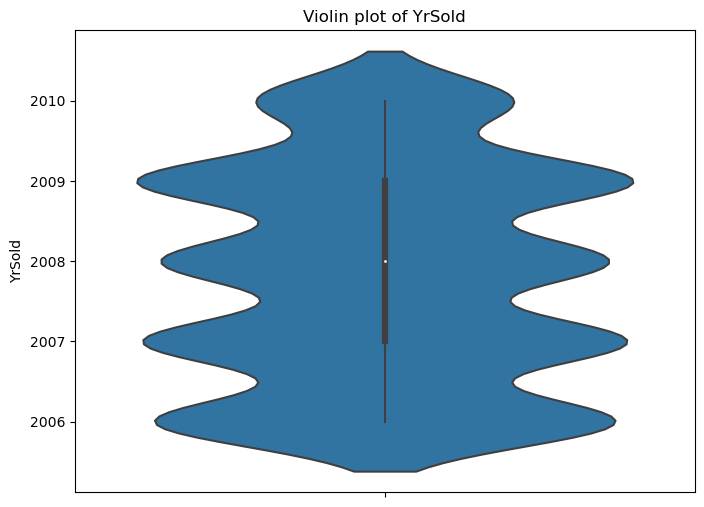

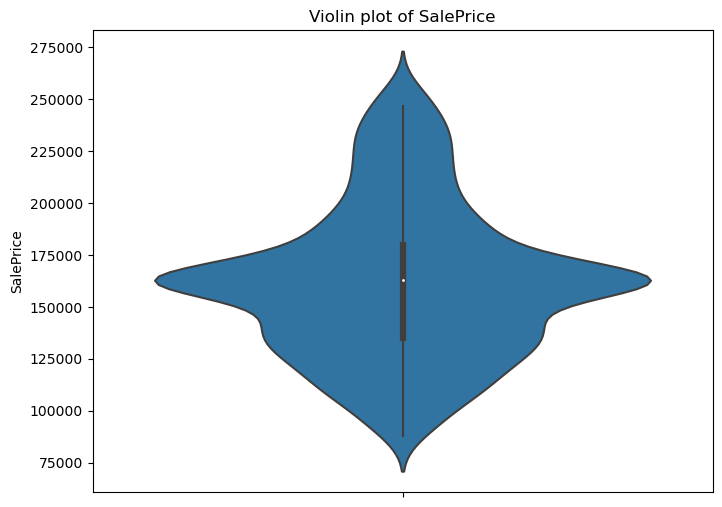

In [23]:
# Plotting violin plot for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df1, y=col)
    plt.title(f'Violin plot of {col}')
    plt.ylabel(col)
    plt.show()


There are 6 unique categories, with "Normal" being the most frequent, occurring 1136 times.

They illustrate the distribution of numerical data, showcasing the density, median, interquartile range, and outliers for each variable.

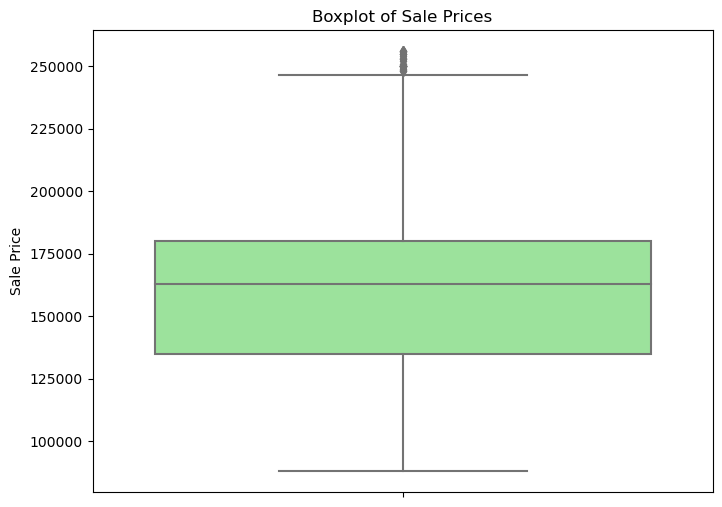

count      1460.000000
mean     161779.252740
std       36721.611669
min       88000.000000
25%      135000.000000
50%      163000.000000
75%      180000.000000
max      256000.000000
Name: SalePrice, dtype: float64


In [24]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='SalePrice', color='lightgreen')
plt.title('Boxplot of Sale Prices')
plt.ylabel('Sale Price')
plt.show()
# Summary statistics of SalePrice
print(df1['SalePrice'].describe())


The box represents the interquartile range (IQR) from $135,000.00 to $180000.00, encompassing the middle 50% of the data.
The median sale price ($163,000.00) is represented by the line inside the box.
The whiskers extend from the edges of the box to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
Any data points beyond the whiskers are considered outliers and plotted individually.

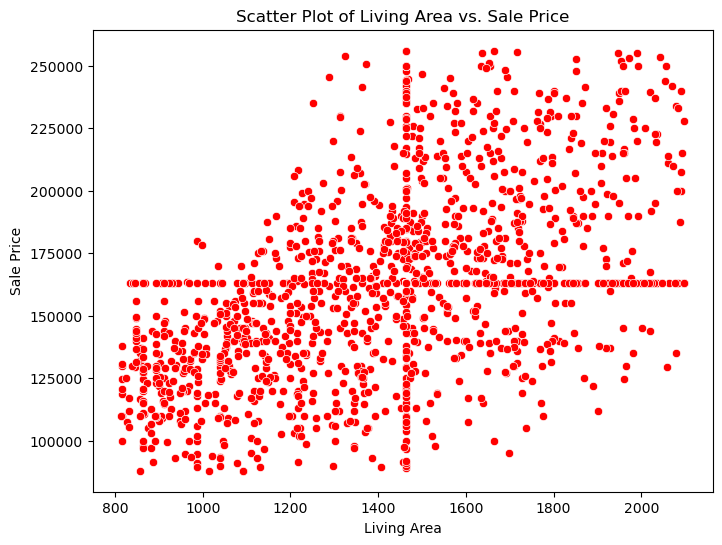

In [25]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='GrLivArea', y='SalePrice', color='red')
plt.title('Scatter Plot of Living Area vs. Sale Price')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()

Increase in living Area is increasing the Sale Price

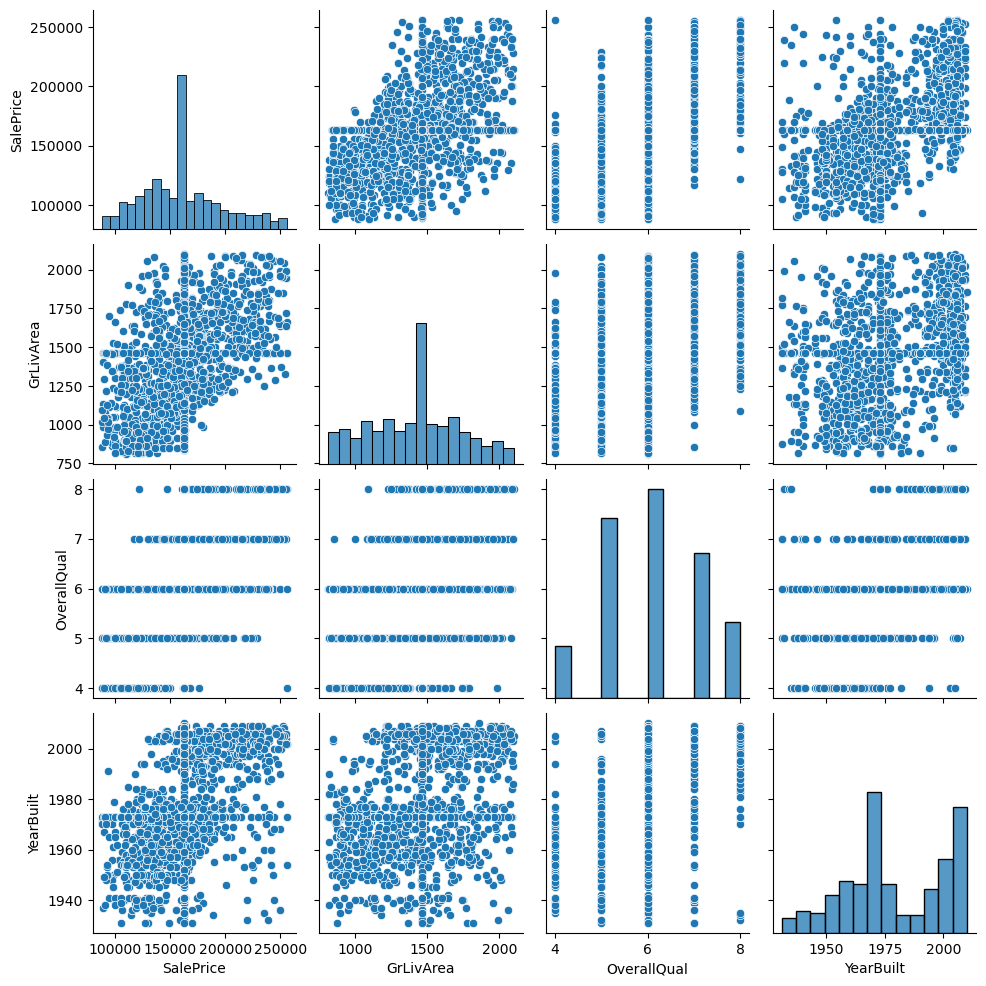

In [26]:
# Pair plot
sns.pairplot(df1[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])
plt.show()

This pair plot provides a comprehensive visual summary of the relationships between numerical variables in the dataset, aiding in exploratory data analysis and identifying potential patterns or trends.

In [27]:
df1['OverallQual'].value_counts()

OverallQual
6.0    460
5.0    397
7.0    319
8.0    168
4.0    116
Name: count, dtype: int64

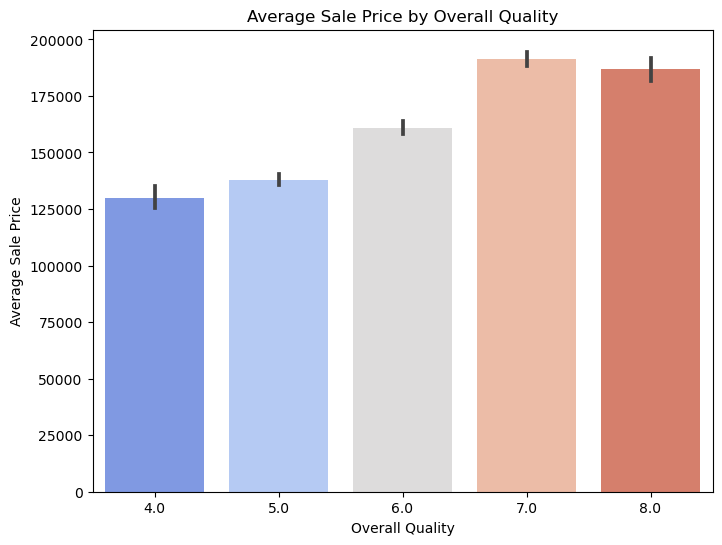

In [28]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='OverallQual', y='SalePrice', palette='coolwarm')
plt.title('Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.show()


The black lines depict 95% confidence intervals around the average sale price for each level of overall quality, illustrating the variability in the sale price estimate. Notably, quality level 8 exhibits the highest variability, with the longest black line, while level 4 has the shortest line, suggesting less variability in average sale prices. This underscores a positive correlation between property quality and sale price, with higher-quality properties generally fetching higher sale prices compared to lower-quality ones.

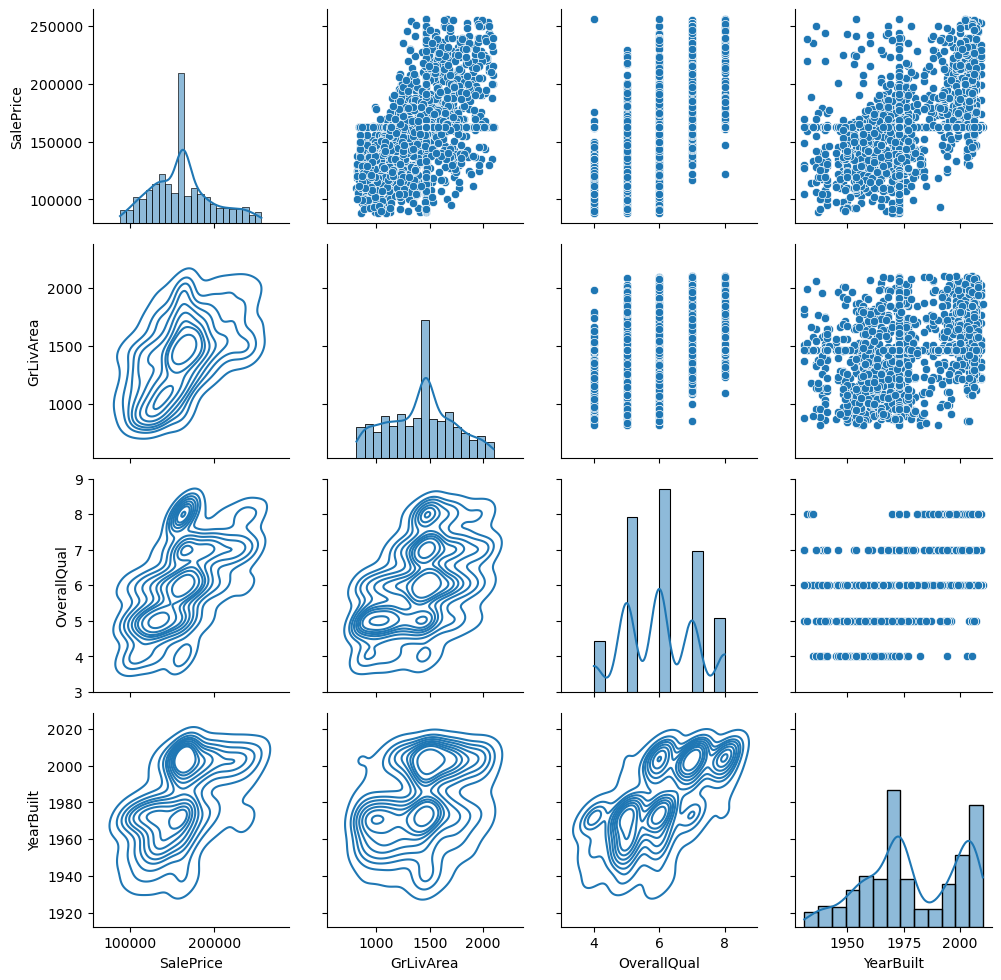

In [29]:
# PairGrid
g = sns.PairGrid(df[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
plt.show()


In [30]:
# Numerical Columns
numerical_cols = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond']



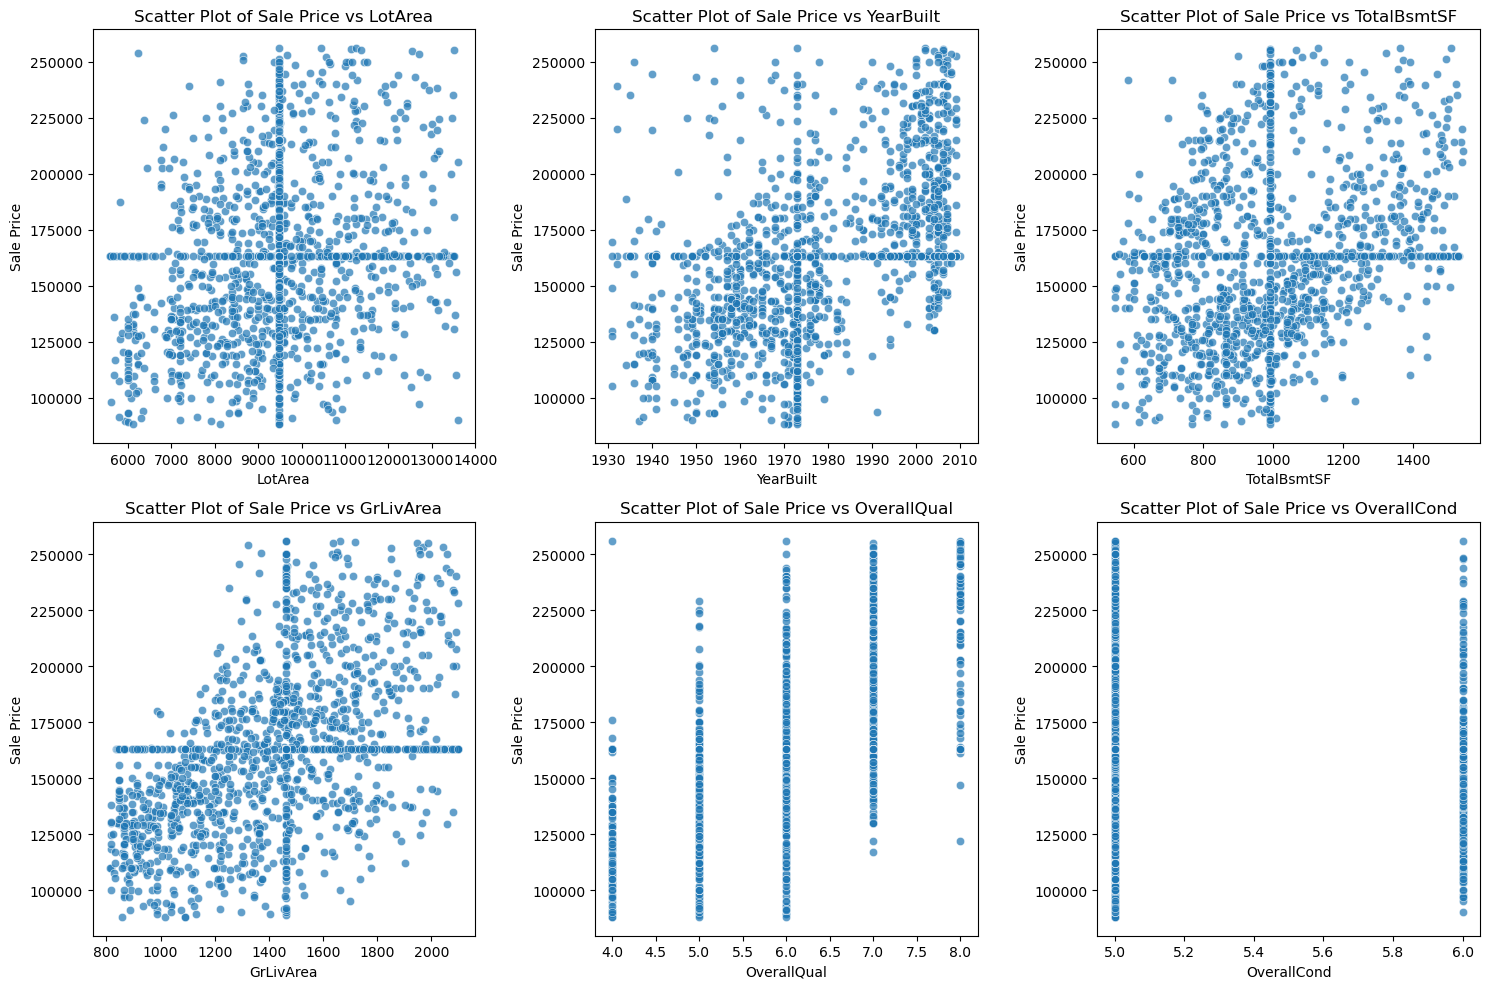

In [31]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df1, x=col, y='SalePrice', alpha=0.7)
    plt.title(f'Scatter Plot of Sale Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

In [32]:
# Categorical Columns
categorical_cols = ['Neighborhood', 'MSZoning', 'ExterQual', 'KitchenQual', 'HeatingQC', 'BldgType']


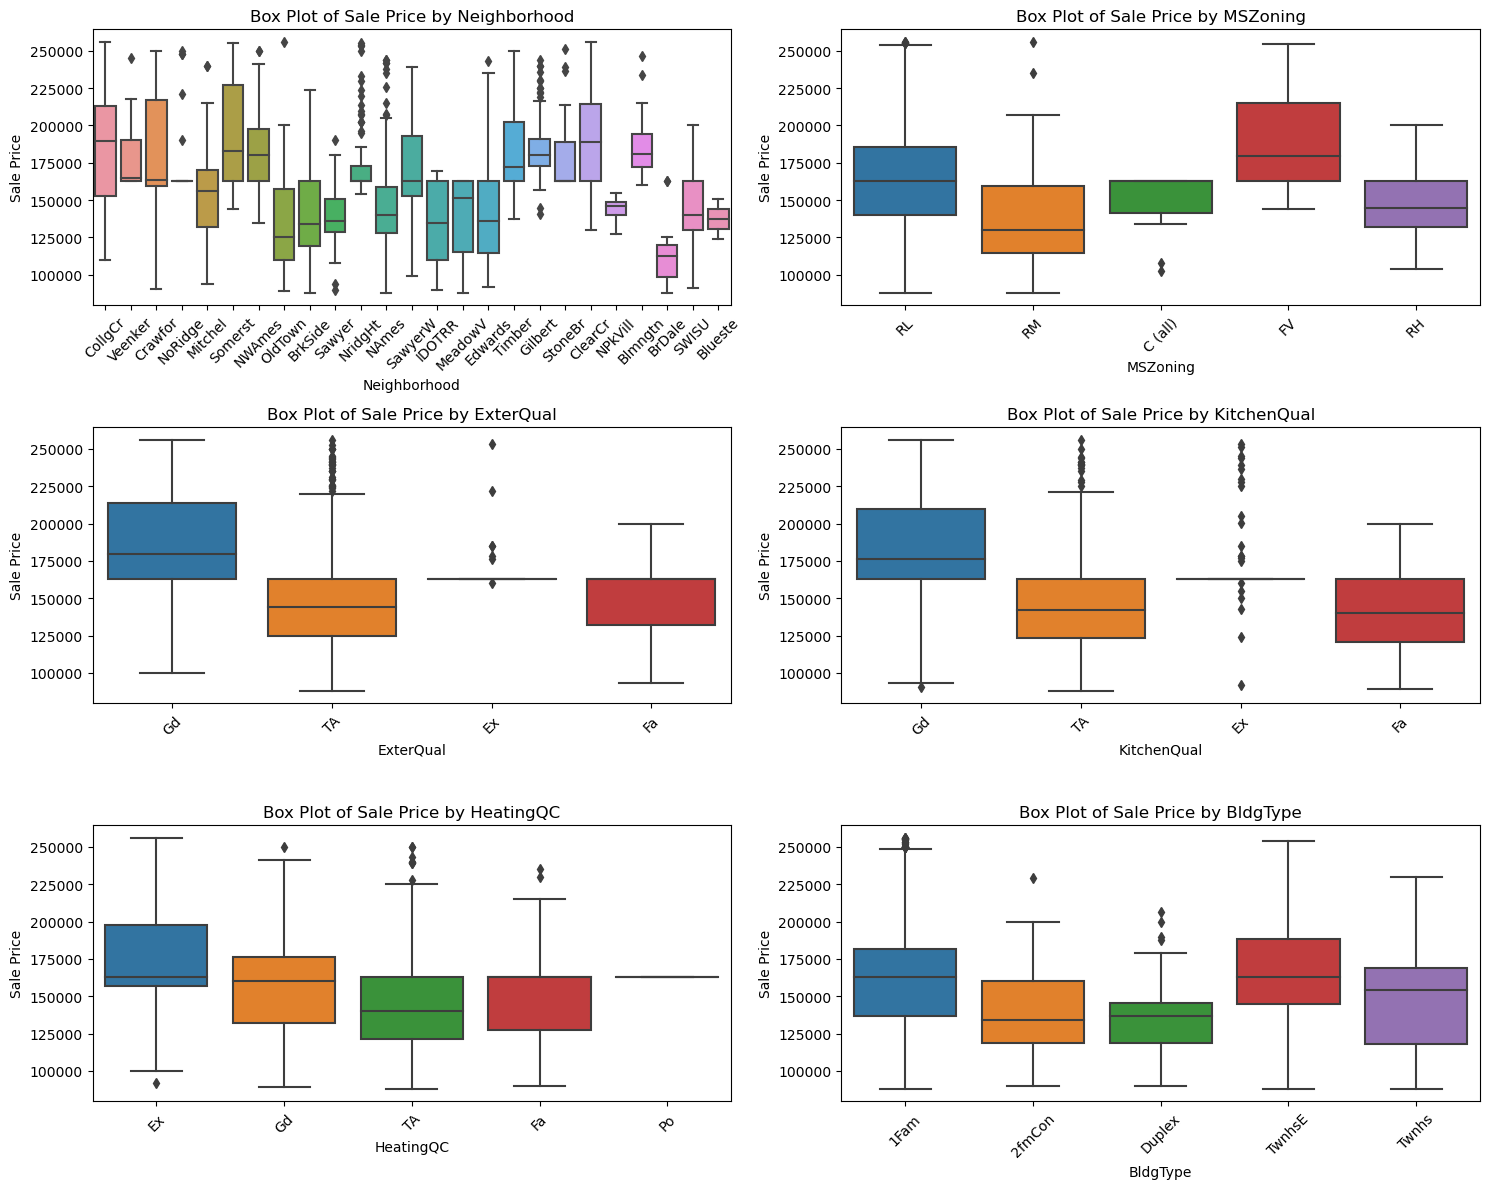

In [33]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=col, y='SalePrice')
    plt.title(f'Box Plot of Sale Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

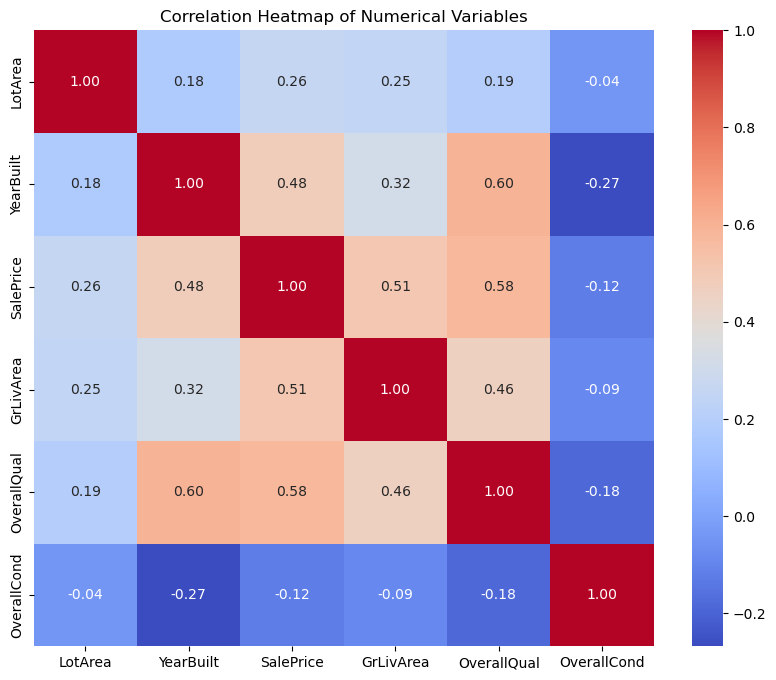

In [34]:
# Numerical Columns
numerical_cols = ['LotArea', 'YearBuilt', 'SalePrice', 'GrLivArea', 'OverallQual', 'OverallCond']

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The highest correlation in the correlation matrix is between 'SalePrice' and 'OverallQual' with a coefficient of approximately 0.58, indicating a strong positive relationship. This suggests that as the overall quality of a property increases, its sale price tends to increase as well.


# Feature Engineering

In [35]:
# Create new features
df1['PricePerSqFt'] = df1['SalePrice'] / df1['TotalBsmtSF']
df1['PropertyAge'] = df1['YrSold'] - df1['YearBuilt']
df1['PricePerSqFt'] = df1['SalePrice'] / df1['GrLivArea']

In [36]:
# Create a new feature 'TotalSF' by adding TotalBsmtSF and GrLivArea
df1['TotalSF'] = df1['TotalBsmtSF']

#  Feature Engineering and Size Impact AND Market Trends and Historical Pricing:

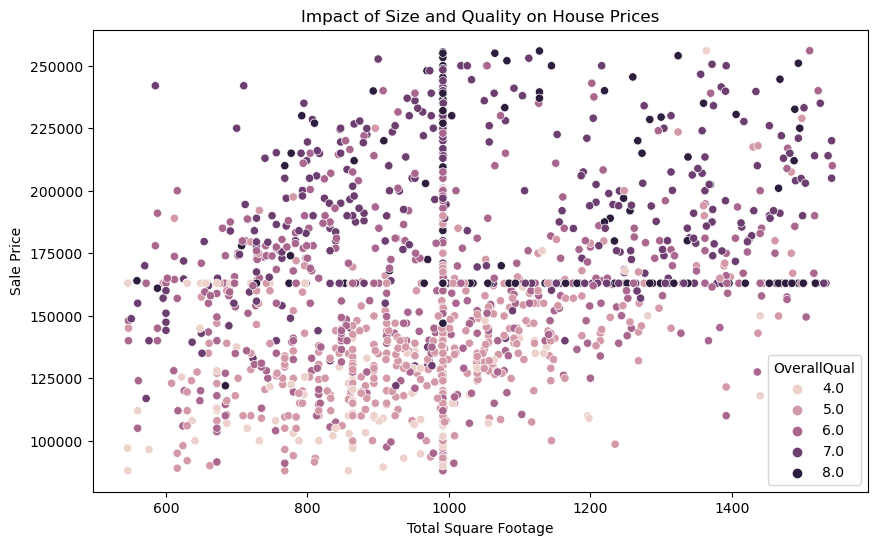

In [37]:
# Further analyze the impact of features and size on house prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='TotalSF', y='SalePrice', hue='OverallQual')
plt.title('Impact of Size and Quality on House Prices')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.show()


As the Overall Quality increases the salesPrice and the Total Square Footage also increases

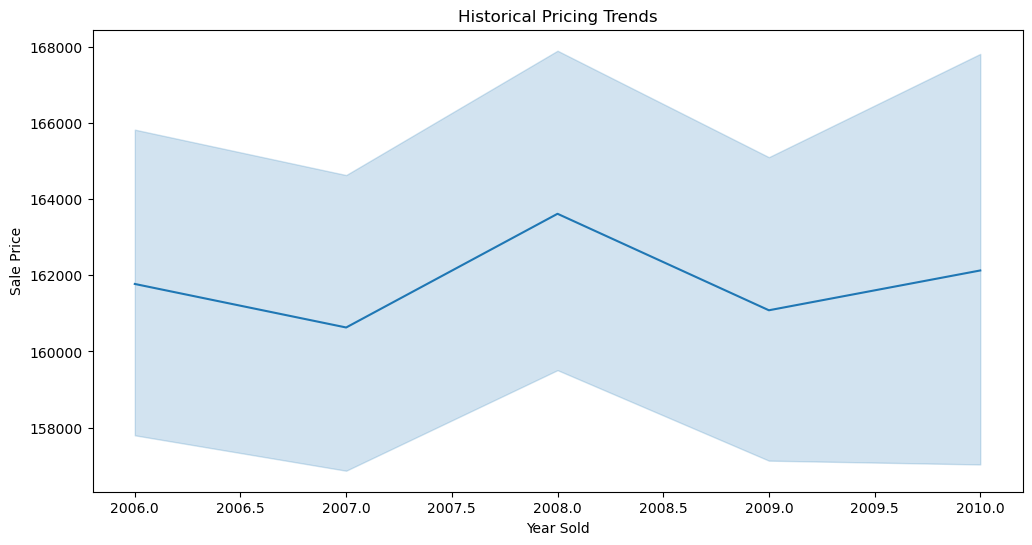

In [38]:
# Explore historical pricing trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='YrSold', y='SalePrice')
plt.title('Historical Pricing Trends')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()


we can check for any significant increases or decreases in sale prices over time, identify peak years 2008, for property sales, or detect any anomalies or outliers in the data.

# 9. Customer Preferences and Amenities:

In [39]:
df1['GarageCars'].value_counts()

GarageCars
2.0    1091
1.0     369
Name: count, dtype: int64

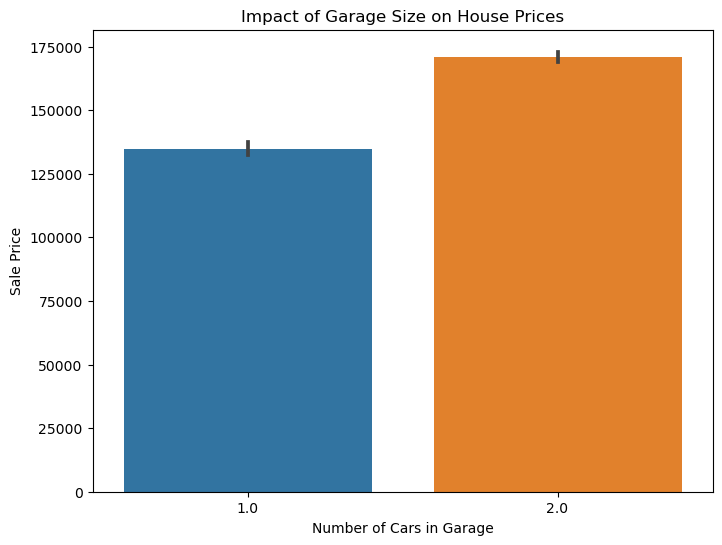

In [45]:
# Investigate how amenities impact house prices
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='GarageCars', y='SalePrice')
plt.title('Impact of Garage Size on House Prices')
plt.xlabel('Number of Cars in Garage')
plt.ylabel('Sale Price')
plt.show()


In [41]:
df1['BedroomAbvGr'].value_counts()

BedroomAbvGr
3.0    1102
2.0     358
Name: count, dtype: int64

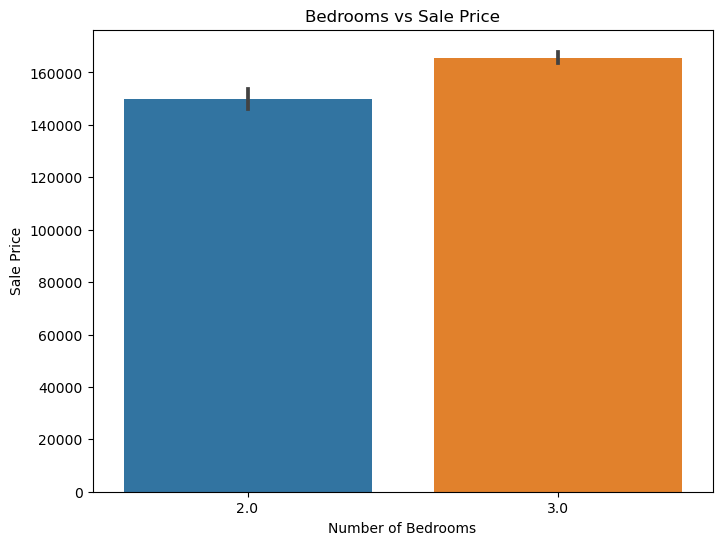

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x='BedroomAbvGr', y='SalePrice', data=df1)
plt.title('Bedrooms vs Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
# It shows demand of 3 bedroom is more in customer